In [1]:
#Importing EDA and Visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Association and apriori algorithm
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

#Ignoring warnings messages
import warnings
warnings.filterwarnings('ignore')

#Setting Figure Parameters
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [2]:
#Importing Dataset
data = pd.read_csv('my_movies.csv')
data

V1             V2             V3          V4     V5  \
0    Sixth Sense          LOTR1  Harry Potter1  Green Mile  LOTR2   
1      Gladiator        Patriot     Braveheart         NaN    NaN   
2          LOTR1          LOTR2            NaN         NaN    NaN   
3      Gladiator        Patriot    Sixth Sense         NaN    NaN   
4      Gladiator        Patriot    Sixth Sense         NaN    NaN   
5      Gladiator        Patriot    Sixth Sense         NaN    NaN   
6  Harry Potter1  Harry Potter2            NaN         NaN    NaN   
7      Gladiator        Patriot            NaN         NaN    NaN   
8      Gladiator        Patriot    Sixth Sense         NaN    NaN   
9    Sixth Sense           LOTR      Gladiator  Green Mile    NaN   

   Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

# EDA

In [3]:
data.drop(columns=['V1', 'V2', 'V3', 'V4', 'V5'], inplace=True)

In [4]:
data.describe()

Sixth Sense  Gladiator      LOTR1  Harry Potter1    Patriot      LOTR2  \
count    10.000000  10.000000  10.000000      10.000000  10.000000  10.000000   
mean      0.600000   0.700000   0.200000       0.200000   0.600000   0.200000   
std       0.516398   0.483046   0.421637       0.421637   0.516398   0.421637   
min       0.000000   0.000000   0.000000       0.000000   0.000000   0.000000   
25%       0.000000   0.250000   0.000000       0.000000   0.000000   0.000000   
50%       1.000000   1.000000   0.000000       0.000000   1.000000   0.000000   
75%       1.000000   1.000000   0.000000       0.000000   1.000000   0.000000   
max       1.000000   1.000000   1.000000       1.000000   1.000000   1.000000   

       Harry Potter2       LOTR  Braveheart  Green Mile  
count      10.000000  10.000000   10.000000   10.000000  
mean        0.100000   0.100000    0.100000    0.200000  
std         0.316228   0.316228    0.316228    0.421637  
min         0.000000   0.000000    0.000000    0.000000  
25%         0.000000   0.000000    0.000000    0.000000  
50%         0.000000   0.000000    0.000000    0.000000  
75%         0.000000   0.000000    0.000000    0.000000  
max         1.000000   1.000000    1.000000    1.000000

In [5]:
data.isna().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

There are no null values found in the dataset therfore we can move ahead with basic visualization

# Visualization

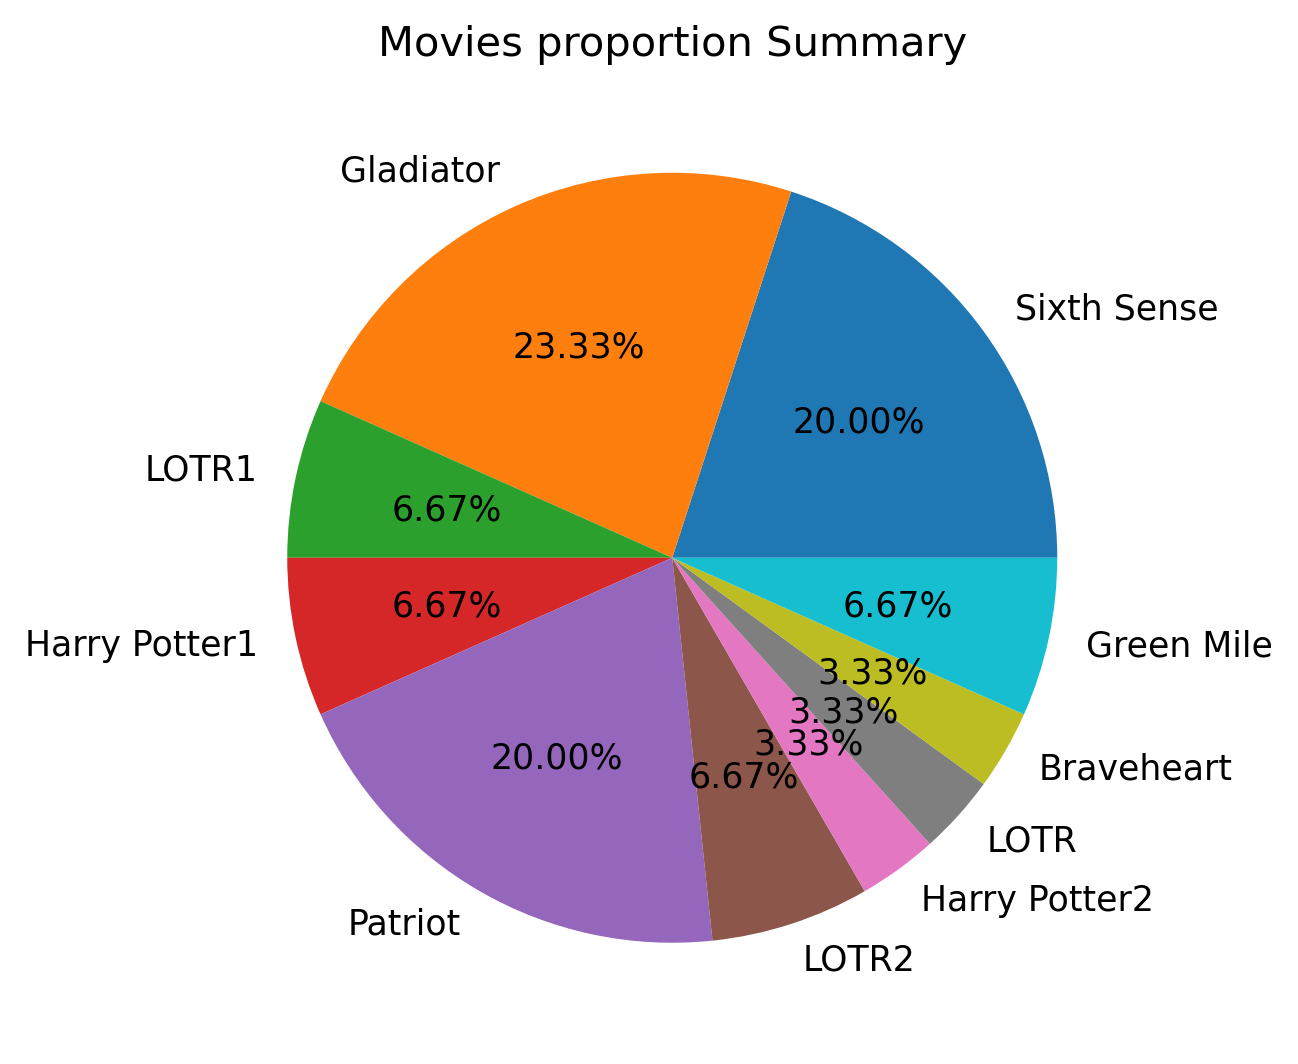

In [6]:
#Pie chart
plt.pie(data.sum(), labels=data.columns, autopct= '%.2f%%',)
#plt.legend()
plt.title("Movies proportion Summary")
plt.show()


In [7]:
#Bar Plot
count  = data.sum()
count

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

In [8]:
count.sort_values(0, ascending=False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'movies',0: 'count'})
count

movies  count
0      Gladiator      7
1    Sixth Sense      6
2        Patriot      6
3          LOTR1      2
4  Harry Potter1      2
5          LOTR2      2
6     Green Mile      2
7  Harry Potter2      1
8           LOTR      1
9     Braveheart      1

Text(0.5, 1.0, 'Movies Watched')

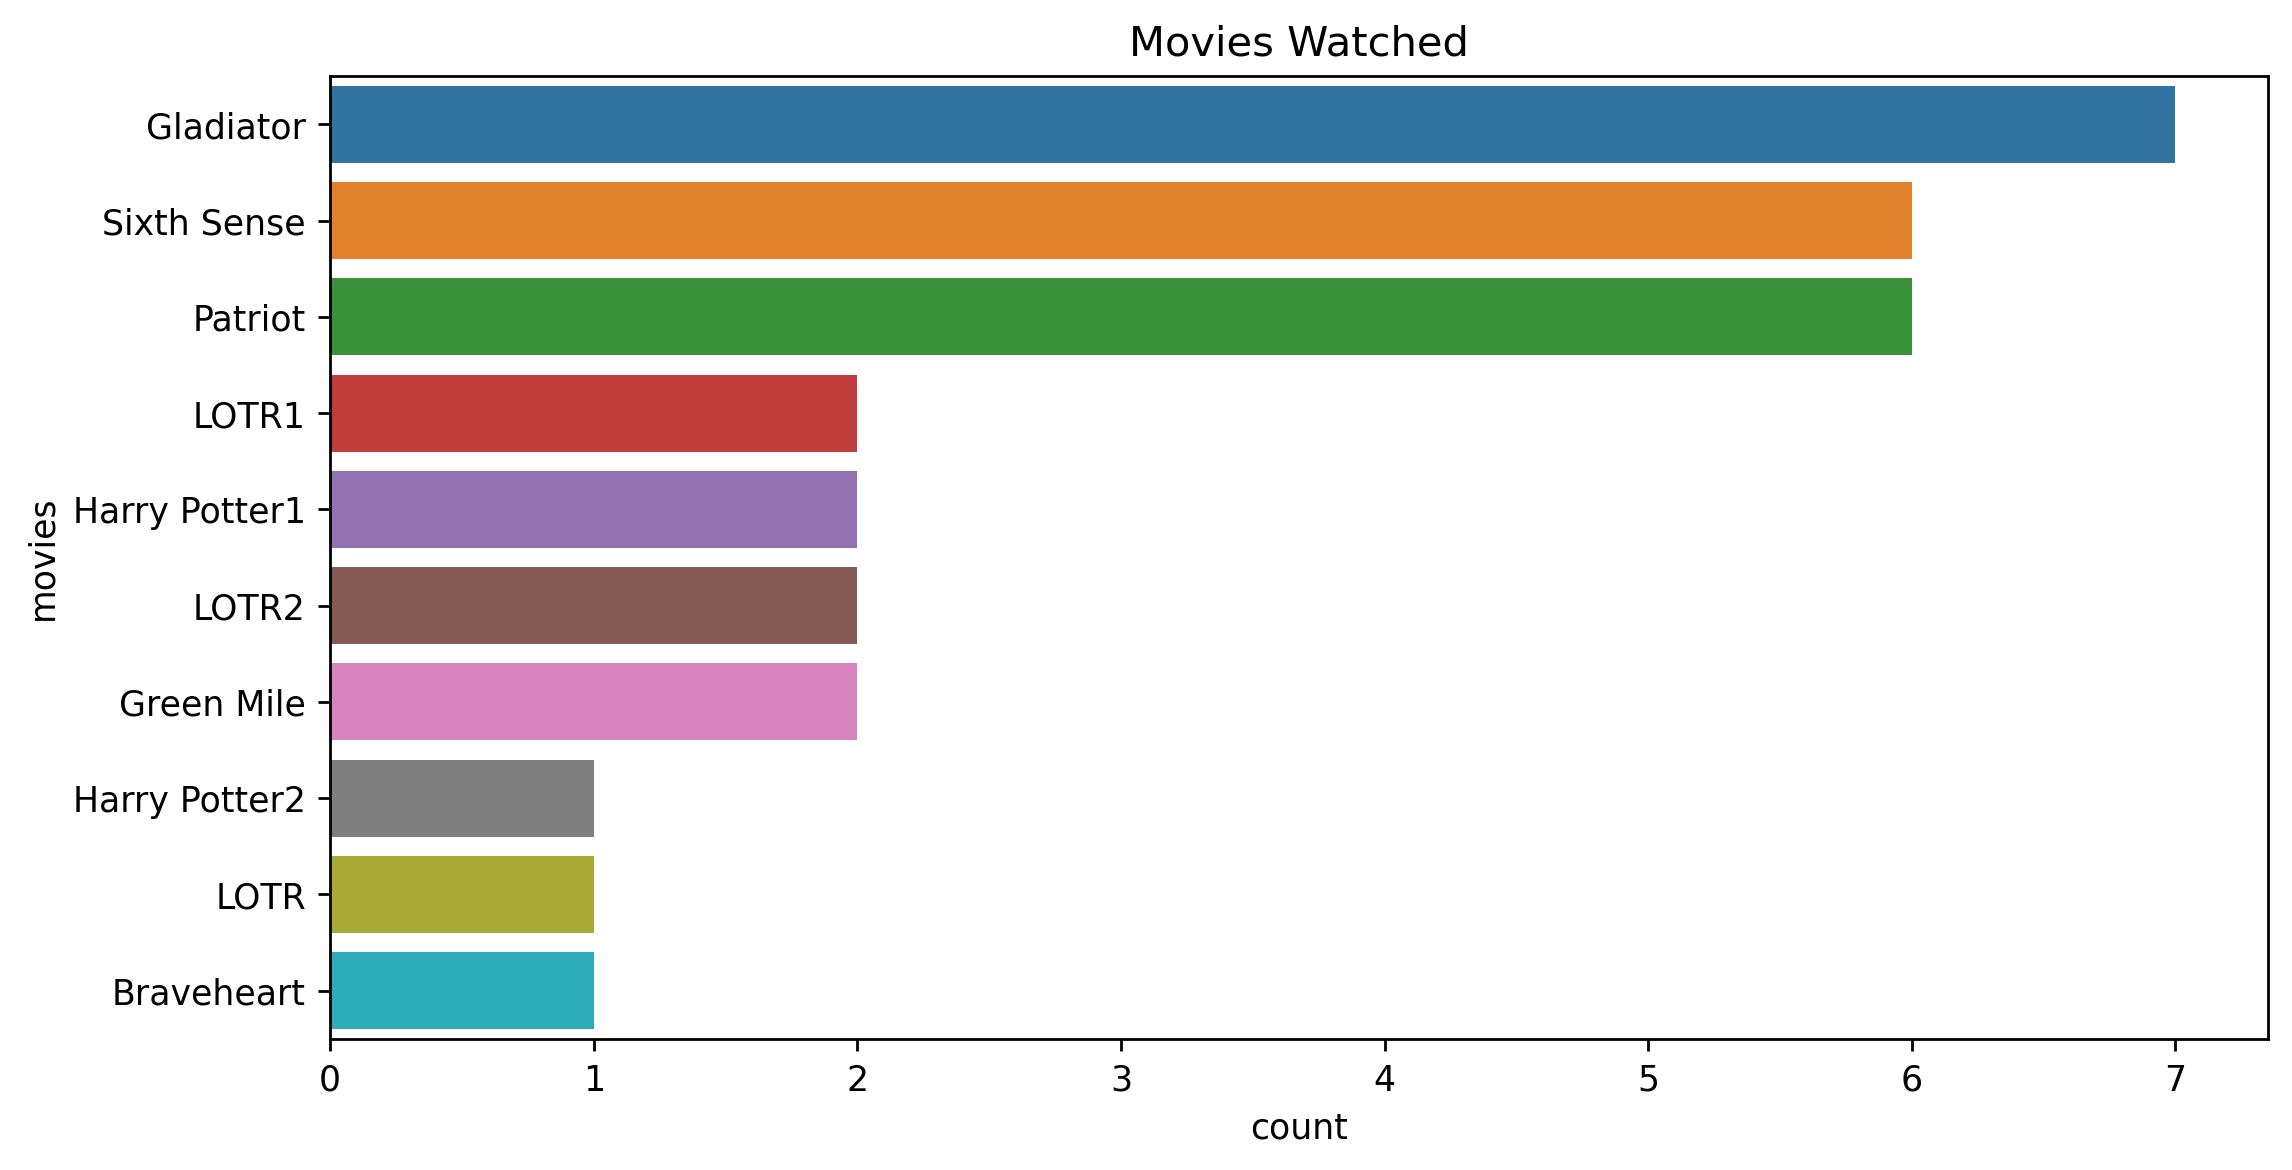

In [9]:
ax = sns.barplot(x = 'count', y = 'movies', data= count)
plt.title("Movies Watched")

# Model
kindly note: Model Visualization is done just after every Model

For support 20% confidence of 80%

In [10]:
score = apriori(data, min_support=0.2, use_colnames=True)
score

support                           itemsets
0       0.6                      (Sixth Sense)
1       0.7                        (Gladiator)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
4       0.6                          (Patriot)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
7       0.5           (Sixth Sense, Gladiator)
8       0.4             (Sixth Sense, Patriot)
9       0.2          (Sixth Sense, Green Mile)
10      0.6               (Patriot, Gladiator)
11      0.2                     (LOTR1, LOTR2)
12      0.4  (Sixth Sense, Gladiator, Patriot)

In [11]:
model = association_rules(score, metric='confidence', min_threshold=0.8)
model

antecedents    consequents  antecedent support  \
0             (Sixth Sense)    (Gladiator)                 0.6   
1              (Green Mile)  (Sixth Sense)                 0.2   
2                 (Patriot)    (Gladiator)                 0.6   
3               (Gladiator)      (Patriot)                 0.7   
4                   (LOTR1)        (LOTR2)                 0.2   
5                   (LOTR2)        (LOTR1)                 0.2   
6  (Sixth Sense, Gladiator)      (Patriot)                 0.5   
7    (Sixth Sense, Patriot)    (Gladiator)                 0.4   

   consequent support  support  confidence      lift  leverage  conviction  \
0                 0.7      0.5    0.833333  1.190476      0.08         1.8   
1                 0.6      0.2    1.000000  1.666667      0.08         inf   
2                 0.7      0.6    1.000000  1.428571      0.18         inf   
3                 0.6      0.6    0.857143  1.428571      0.18         2.8   
4                 0.2      0.2    1.000000  5.000000      0.16         inf   
5                 0.2      0.2    1.000000  5.000000      0.16         inf   
6                 0.6      0.4    0.800000  1.333333      0.10         2.0   
7                 0.7      0.4    1.000000  1.428571      0.12         inf   

   zhangs_metric  
0           0.40  
1           0.50  
2           0.75  
3           1.00  
4           1.00  
5           1.00  
6           0.50  
7           0.50

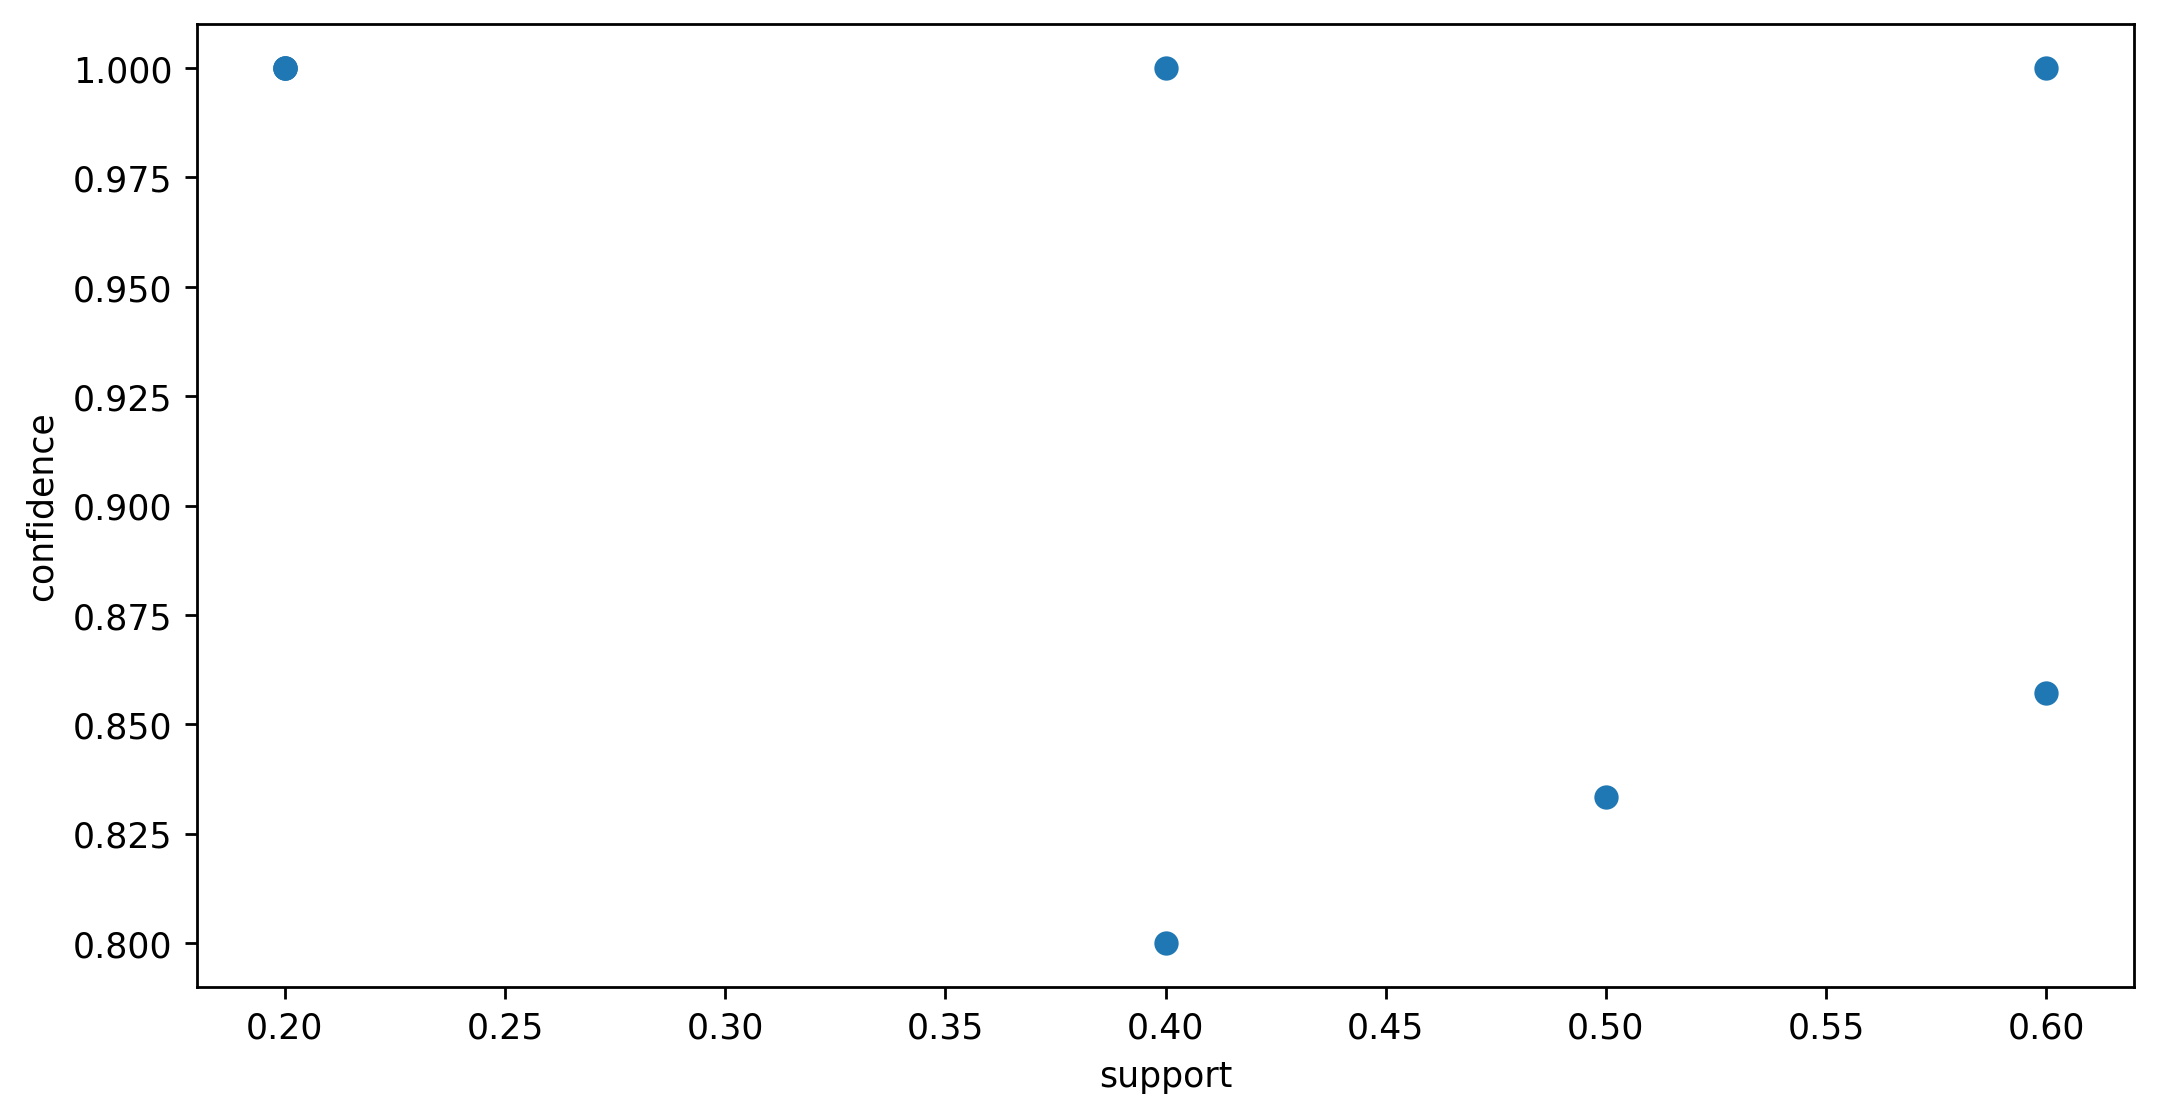

In [12]:
plt.scatter(model['support'], model['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [13]:
matrix = model.pivot('antecedents','consequents','lift')
matrix

consequents               (Gladiator)  (Sixth Sense)  (Patriot)  (LOTR2)  \
antecedents                                                                
(Sixth Sense)                1.190476            NaN        NaN      NaN   
(Green Mile)                      NaN       1.666667        NaN      NaN   
(Patriot)                    1.428571            NaN        NaN      NaN   
(Gladiator)                       NaN            NaN   1.428571      NaN   
(LOTR1)                           NaN            NaN        NaN      5.0   
(LOTR2)                           NaN            NaN        NaN      NaN   
(Sixth Sense, Gladiator)          NaN            NaN   1.333333      NaN   
(Sixth Sense, Patriot)       1.428571            NaN        NaN      NaN   

consequents               (LOTR1)  
antecedents                        
(Sixth Sense)                 NaN  
(Green Mile)                  NaN  
(Patriot)                     NaN  
(Gladiator)                   NaN  
(LOTR1)                       NaN  
(LOTR2)                       5.0  
(Sixth Sense, Gladiator)      NaN  
(Sixth Sense, Patriot)        NaN

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

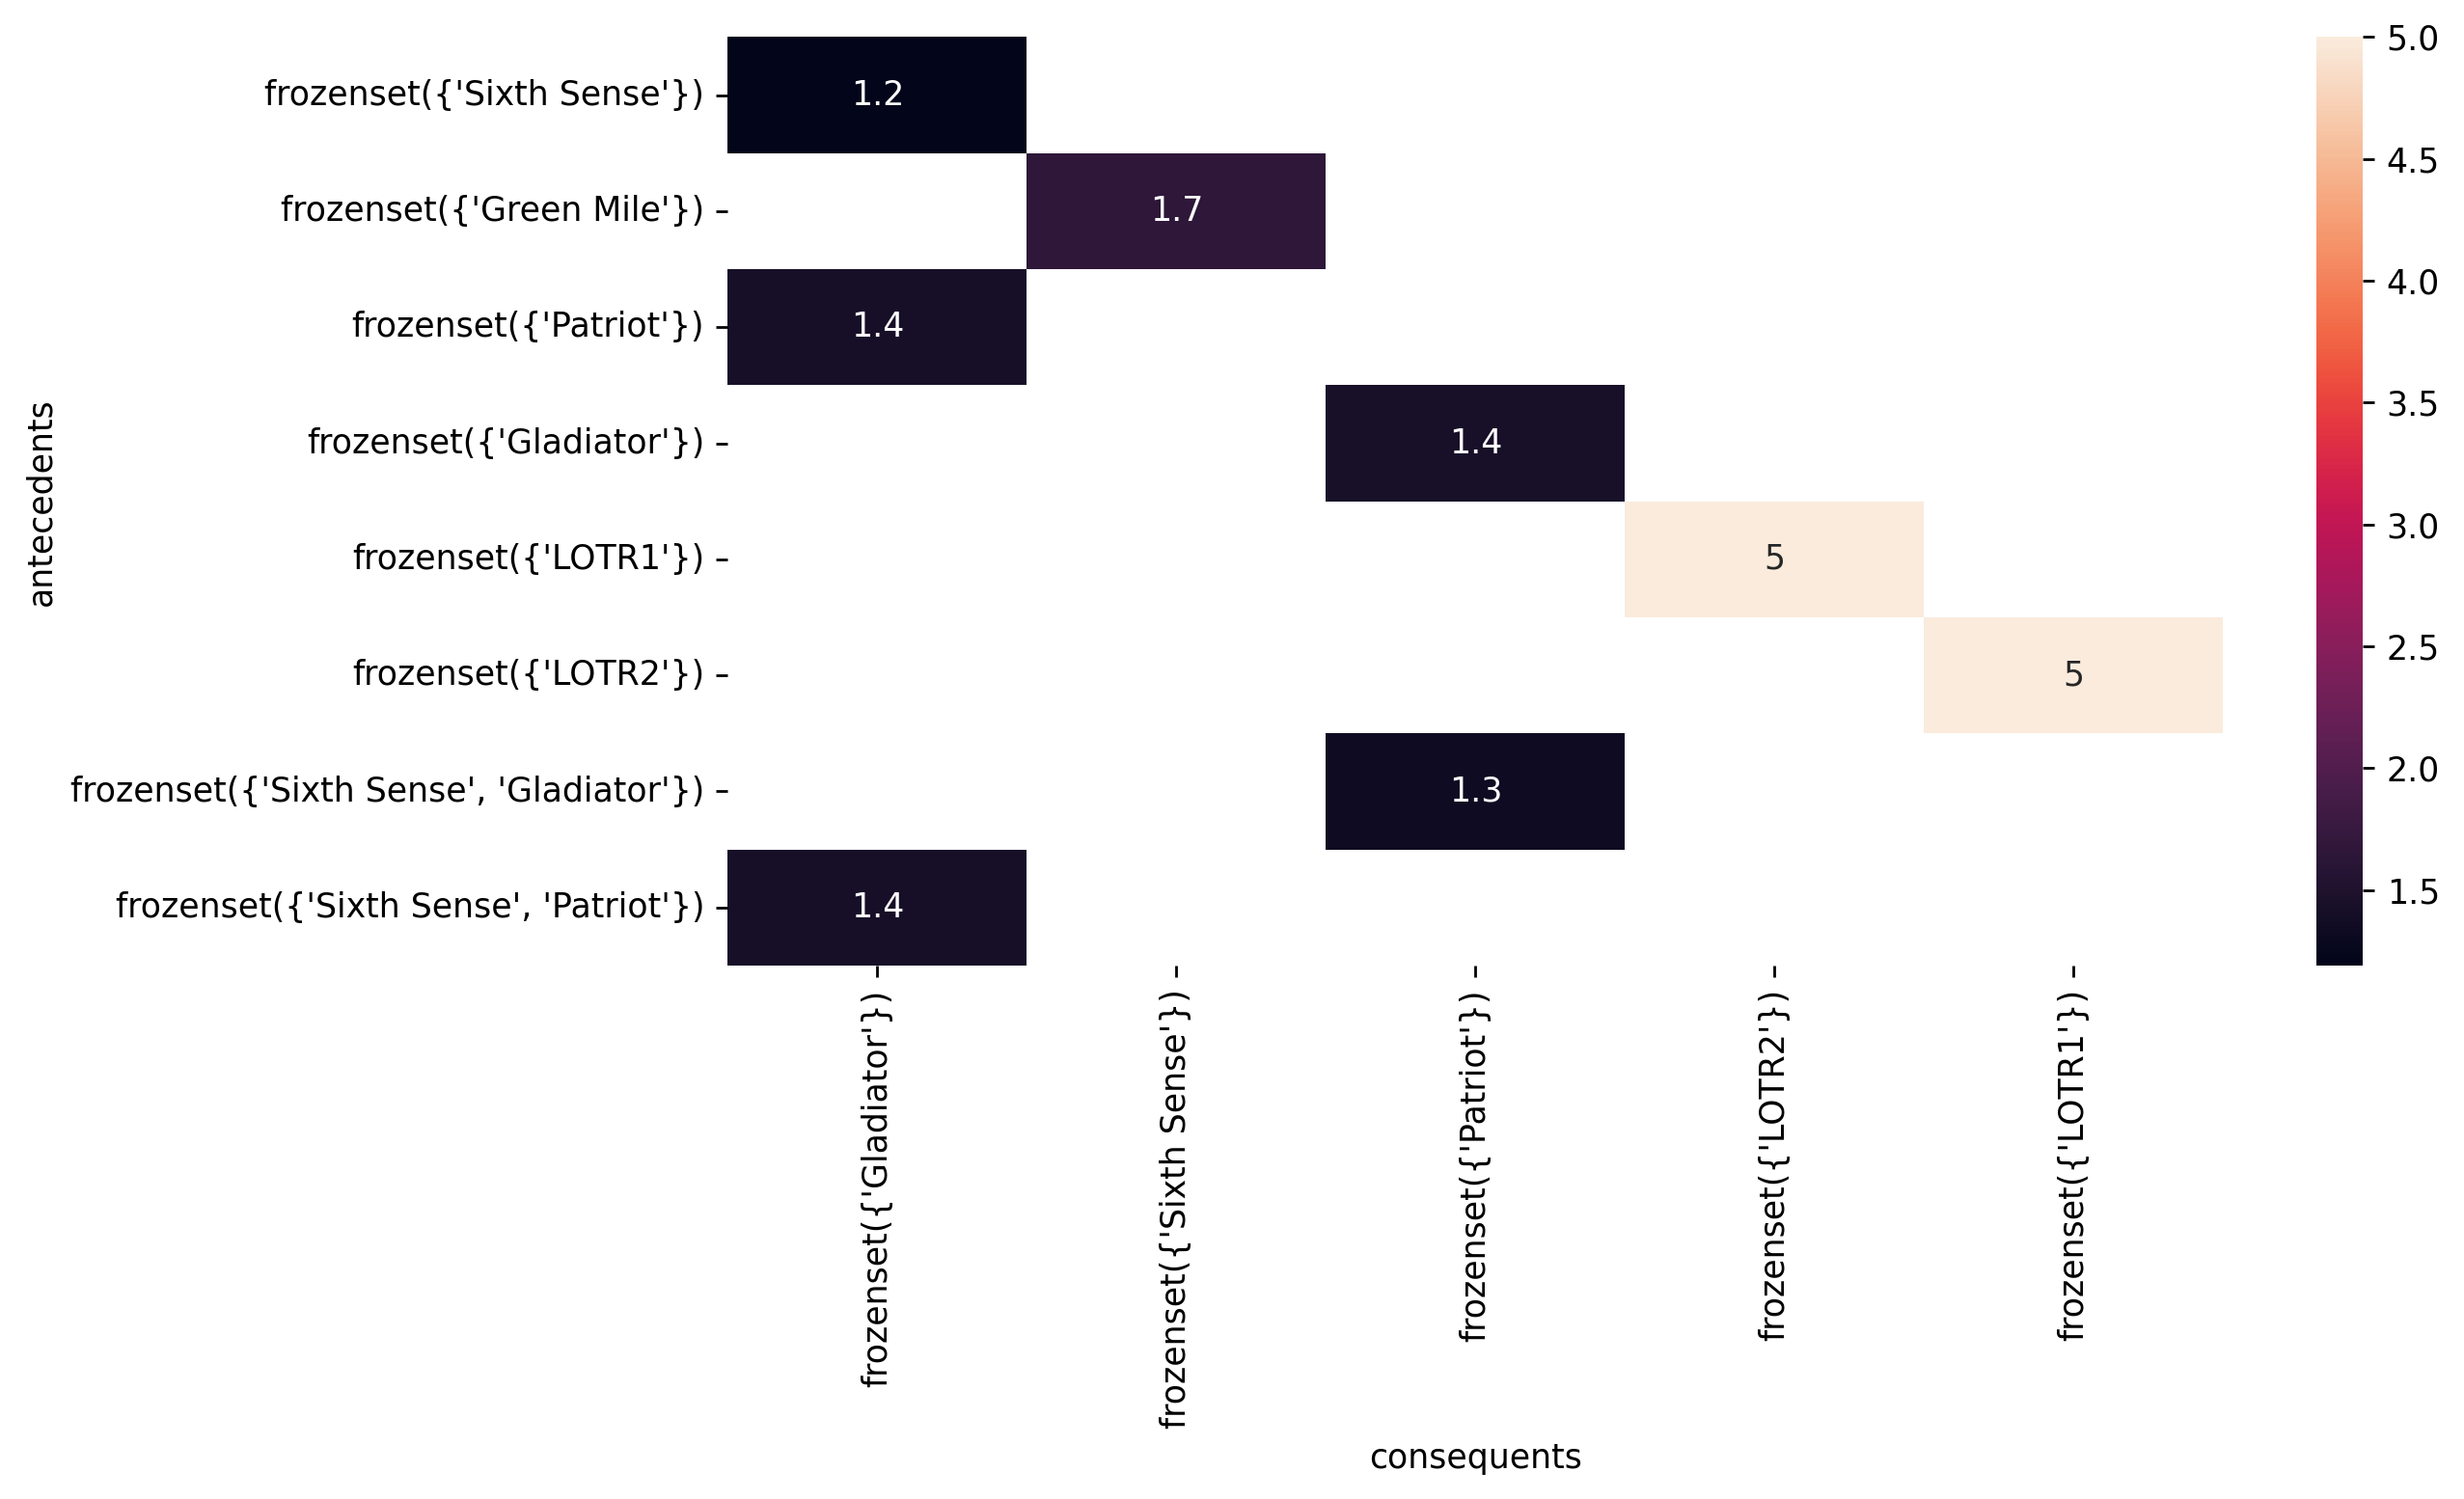

In [14]:
sns.heatmap(matrix, annot=True)

For score of 10% and confidence of 80%

In [15]:
score = apriori(data, min_support=0.1, use_colnames=True)
score

support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Sixth Sense, Gladiator)
11      0.1                               (Sixth Sense, LOTR1)
12      0.1                       (Sixth Sense, Harry Potter1)
13      0.4                             (Sixth Sense, Patriot)
14      0.1                               (Sixth Sense, LOTR2)
15      0.1                                (Sixth Sense, LOTR)
16      0.2                          (Sixth Sense, Green Mile)
17      0.6                               (Patriot, Gladiator)
18      0.1                                  (Gladiator, LOTR)
19      0.1                            (Gladiator, Braveheart)
20      0.1                            (Green Mile, Gladiator)
21      0.1                             (LOTR1, Harry Potter1)
22      0.2                                     (LOTR1, LOTR2)
23      0.1                                (Green Mile, LOTR1)
24      0.1                             (Harry Potter1, LOTR2)
25      0.1                     (Harry Potter1, Harry Potter2)
26      0.1                        (Green Mile, Harry Potter1)
27      0.1                              (Patriot, Braveheart)
28      0.1                                (Green Mile, LOTR2)
29      0.1                                 (Green Mile, LOTR)
30      0.4                  (Sixth Sense, Gladiator, Patriot)
31      0.1                     (Sixth Sense, Gladiator, LOTR)
32      0.1               (Sixth Sense, Green Mile, Gladiator)
33      0.1                (Sixth Sense, LOTR1, Harry Potter1)
34      0.1                        (Sixth Sense, LOTR1, LOTR2)
35      0.1                   (Sixth Sense, LOTR1, Green Mile)
36      0.1                (Sixth Sense, Harry Potter1, LOTR2)
37      0.1           (Sixth Sense, Harry Potter1, Green Mile)
38      0.1                   (Sixth Sense, Green Mile, LOTR2)
39      0.1                    (Sixth Sense, Green Mile, LOTR)
40      0.1                   (Patriot, Gladiator, Braveheart)
41      0.1                      (Green Mile, Gladiator, LOTR)
42      0.1                      (LOTR1, Harry Potter1, LOTR2)
43      0.1                 (Green Mile, LOTR1, Harry Potter1)
44      0.1                         (Green Mile, LOTR1, LOTR2)
45      0.1                 (Green Mile, Harry Potter1, LOTR2)
46      0.1         (Sixth Sense, Green Mile, Gladiator, LOTR)
47      0.1         (Sixth Sense, LOTR1, Harry Potter1, LOTR2)
48      0.1    (Sixth Sense, LOTR1, Harry Potter1, Green Mile)
49      0.1            (Sixth Sense, LOTR1, Green Mile, LOTR2)
50      0.1    (Sixth Sense, Harry Potter1, Green Mile, LOTR2)
51      0.1          (Green Mile, LOTR1, Harry Potter1, LOTR2)
52      0.1  (LOTR1, Harry Potter1, Green Mile, LOTR2, Sixt...

In [16]:
model = association_rules(score, metric='confidence', min_threshold=0.8)
model

antecedents                          consequents  \
0                   (Sixth Sense)                          (Gladiator)   
1                          (LOTR)                        (Sixth Sense)   
2                    (Green Mile)                        (Sixth Sense)   
3                       (Patriot)                          (Gladiator)   
4                     (Gladiator)                            (Patriot)   
..                            ...                                  ...   
123   (Green Mile, Harry Potter1)          (LOTR1, LOTR2, Sixth Sense)   
124        (Harry Potter1, LOTR2)     (LOTR1, Green Mile, Sixth Sense)   
125  (Sixth Sense, Harry Potter1)           (LOTR1, Green Mile, LOTR2)   
126           (Green Mile, LOTR2)  (LOTR1, Harry Potter1, Sixth Sense)   
127          (Sixth Sense, LOTR2)   (LOTR1, Harry Potter1, Green Mile)   

     antecedent support  consequent support  support  confidence       lift  \
0                   0.6                 0.7      0.5    0.833333   1.190476   
1                   0.1                 0.6      0.1    1.000000   1.666667   
2                   0.2                 0.6      0.2    1.000000   1.666667   
3                   0.6                 0.7      0.6    1.000000   1.428571   
4                   0.7                 0.6      0.6    0.857143   1.428571   
..                  ...                 ...      ...         ...        ...   
123                 0.1                 0.1      0.1    1.000000  10.000000   
124                 0.1                 0.1      0.1    1.000000  10.000000   
125                 0.1                 0.1      0.1    1.000000  10.000000   
126                 0.1                 0.1      0.1    1.000000  10.000000   
127                 0.1                 0.1      0.1    1.000000  10.000000   

     leverage  conviction  zhangs_metric  
0        0.08         1.8       0.400000  
1        0.04         inf       0.444444  
2        0.08         inf       0.500000  
3        0.18         inf       0.750000  
4        0.18         2.8       1.000000  
..        ...         ...            ...  
123      0.09         inf       1.000000  
124      0.09         inf       1.000000  
125      0.09         inf       1.000000  
126      0.09         inf       1.000000  
127      0.09         inf       1.000000  

[128 rows x 10 columns]

In [17]:
model.sort_values('confidence', ascending=False)

antecedents                  consequents  \
64  (LOTR1, Harry Potter1, LOTR2)                (Sixth Sense)   
1                          (LOTR)                (Sixth Sense)   
94         (Harry Potter1, LOTR2)    (Sixth Sense, Green Mile)   
93    (Green Mile, Harry Potter1)         (Sixth Sense, LOTR2)   
92           (Sixth Sense, LOTR2)  (Green Mile, Harry Potter1)   
..                            ...                          ...   
36        (Gladiator, Braveheart)                    (Patriot)   
35          (Patriot, Braveheart)                  (Gladiator)   
4                     (Gladiator)                    (Patriot)   
0                   (Sixth Sense)                  (Gladiator)   
12       (Sixth Sense, Gladiator)                    (Patriot)   

    antecedent support  consequent support  support  confidence       lift  \
64                 0.1                 0.6      0.1    1.000000   1.666667   
1                  0.1                 0.6      0.1    1.000000   1.666667   
94                 0.1                 0.2      0.1    1.000000   5.000000   
93                 0.1                 0.1      0.1    1.000000  10.000000   
92                 0.1                 0.1      0.1    1.000000  10.000000   
..                 ...                 ...      ...         ...        ...   
36                 0.1                 0.6      0.1    1.000000   1.666667   
35                 0.1                 0.7      0.1    1.000000   1.428571   
4                  0.7                 0.6      0.6    0.857143   1.428571   
0                  0.6                 0.7      0.5    0.833333   1.190476   
12                 0.5                 0.6      0.4    0.800000   1.333333   

    leverage  conviction  zhangs_metric  
64      0.04         inf       0.444444  
1       0.04         inf       0.444444  
94      0.08         inf       0.888889  
93      0.09         inf       1.000000  
92      0.09         inf       1.000000  
..       ...         ...            ...  
36      0.04         inf       0.444444  
35      0.03         inf       0.333333  
4       0.18         2.8       1.000000  
0       0.08         1.8       0.400000  
12      0.10         2.0       0.500000  

[128 rows x 10 columns]

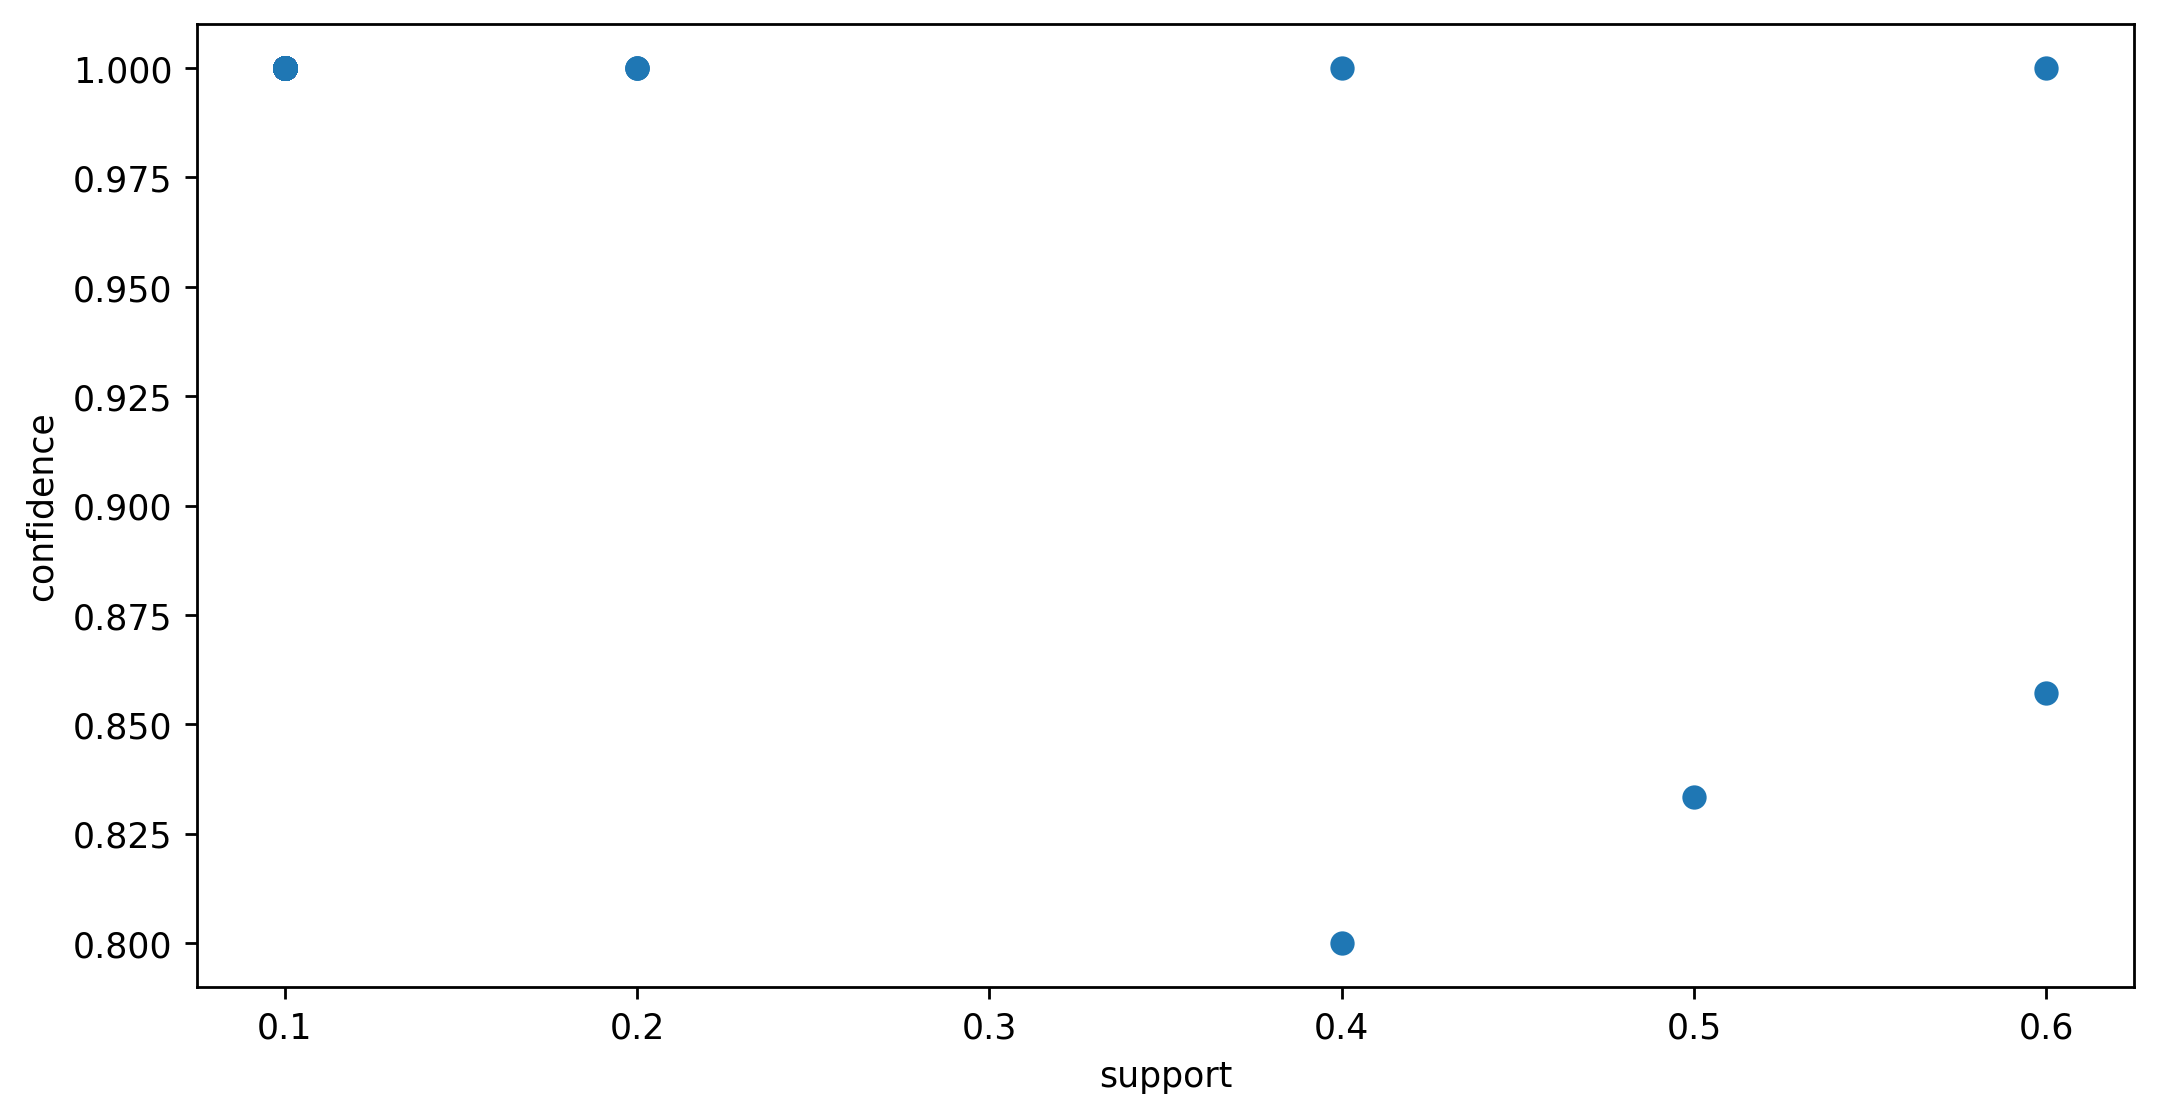

In [18]:
plt.scatter(model['support'], model['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [19]:
matrix = model.pivot('antecedents','consequents','lift')
matrix

consequents                                      (Gladiator)  \
antecedents                                                    
(Sixth Sense)                                       1.190476   
(Patriot, Braveheart)                               1.428571   
(Gladiator, Braveheart)                                  NaN   
(Sixth Sense, Green Mile, Gladiator)                     NaN   
(Sixth Sense, Green Mile, LOTR)                     1.428571   
(Sixth Sense, Gladiator, LOTR)                           NaN   
(Green Mile, Gladiator, LOTR)                            NaN   
(LOTR2)                                                  NaN   
(Sixth Sense, LOTR1, Harry Potter1)                      NaN   
(Sixth Sense, LOTR1, LOTR2)                              NaN   
(Sixth Sense, Harry Potter1, LOTR2)                      NaN   
(LOTR1, Harry Potter1, LOTR2)                            NaN   
(Green Mile)                                             NaN   
(Sixth Sense, LOTR1, Green Mile)                         NaN   
(Sixth Sense, Harry Potter1, Green Mile)                 NaN   
(LOTR1, Harry Potter1, Green Mile)                       NaN   
(LOTR1, Harry Potter1, Green Mile, Sixth Sense)          NaN   
(LOTR1, Harry Potter1, LOTR2, Sixth Sense)               NaN   
(Green Mile, LOTR)                                  1.428571   
(Green Mile, Harry Potter1)                              NaN   
(Green Mile, LOTR2)                                      NaN   
(LOTR1, Sixth Sense, Green Mile, LOTR2)                  NaN   
(LOTR)                                              1.428571   
(Patriot)                                           1.428571   
(Green Mile, Harry Potter1, LOTR2)                       NaN   
(LOTR1, Green Mile, LOTR2)                               NaN   
(LOTR1, Harry Potter1, Green Mile, LOTR2)                NaN   
(Sixth Sense, Green Mile, LOTR2)                         NaN   
(Gladiator)                                              NaN   
(Braveheart)                                        1.428571   
(LOTR1)                                                  NaN   
(Harry Potter1, LOTR2)                                   NaN   
(Harry Potter2)                                          NaN   
(Sixth Sense, Patriot)                              1.428571   
(Sixth Sense, LOTR)                                 1.428571   
(Gladiator, LOTR)                                        NaN   
(Green Mile, Gladiator)                                  NaN   
(Sixth Sense, LOTR1)                                     NaN   
(Sixth Sense, Harry Potter1)                             NaN   
(LOTR1, Harry Potter1)                                   NaN   
(Sixth Sense, LOTR2)                                     NaN   
(LOTR1, Green Mile)                                      NaN   
(Sixth Sense, Gladiator)                                 NaN   
(Green Mile, Harry Potter1, LOTR2, Sixth Sense)          NaN   

consequents                                      (LOTR1, Green Mile, Sixth Sense)  \
antecedents                                                                         
(Sixth Sense)                                                                 NaN   
(Patriot, Braveheart)                                                         NaN   
(Gladiator, Braveheart)                                                       NaN   
(Sixth Sense, Green Mile, Gladiator)                                          NaN   
(Sixth Sense, Green Mile, LOTR)                                               NaN   
(Sixth Sense, Gladiator, LOTR)                                                NaN   
(Green Mile, Gladiator, LOTR)                                                 NaN   
(LOTR2)                                                                       NaN   
(Sixth Sense, LOTR1, Harry Potter1)                                           NaN   
(Sixth Sense, LOTR1, LOTR2)                                                   NaN   
(Sixth Sense, Harry Potter1, LOTR2)

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

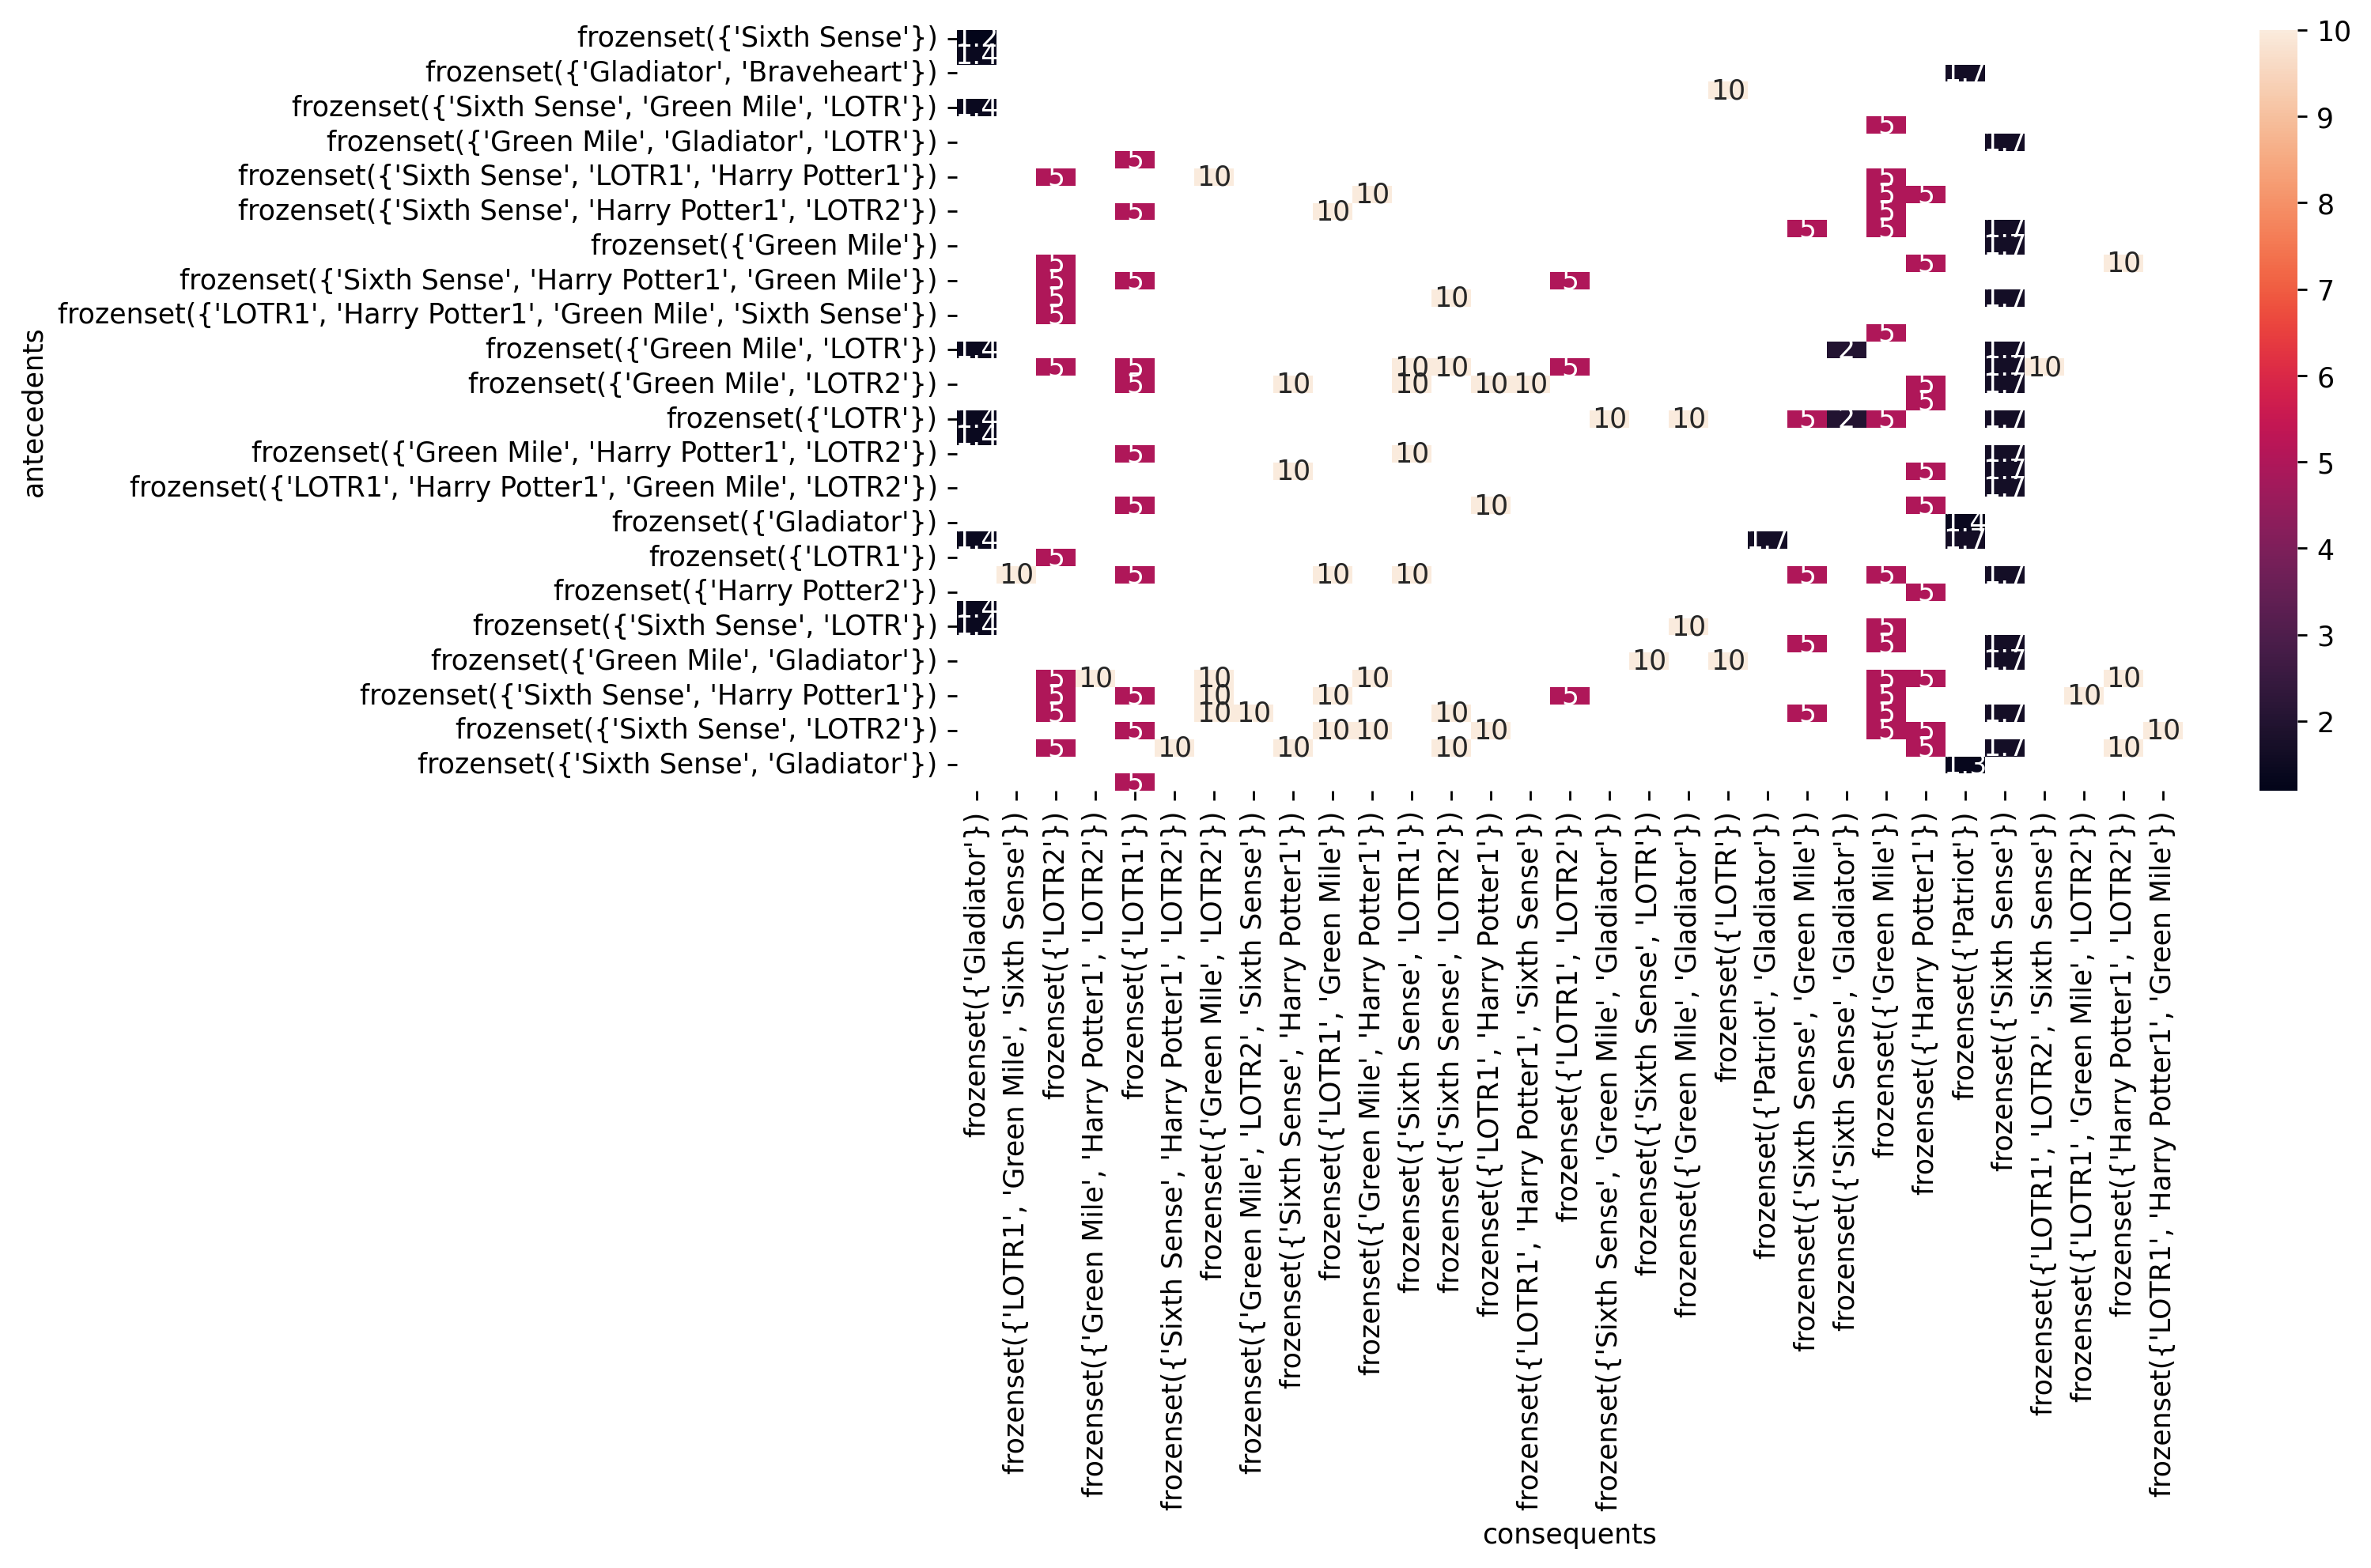

In [20]:
sns.heatmap(matrix, annot=True)

For support 10% and confidence 90%

In [21]:
#We can use the same score params as above
model = association_rules(score, metric='confidence', min_threshold=0.9)
model.sort_values('confidence', ascending=False)

antecedents                         consequents  \
0                         (LOTR)                       (Sixth Sense)   
79    (LOTR1, Green Mile, LOTR2)                       (Sixth Sense)   
92           (Green Mile, LOTR2)        (Sixth Sense, Harry Potter1)   
91        (Harry Potter1, LOTR2)           (Sixth Sense, Green Mile)   
90   (Green Mile, Harry Potter1)                (Sixth Sense, LOTR2)   
..                           ...                                 ...   
37             (Gladiator, LOTR)                        (Green Mile)   
36            (Green Mile, LOTR)                         (Gladiator)   
35       (Green Mile, Gladiator)                              (LOTR)   
34                  (Braveheart)                (Patriot, Gladiator)   
124         (Sixth Sense, LOTR2)  (LOTR1, Harry Potter1, Green Mile)   

     antecedent support  consequent support  support  confidence       lift  \
0                   0.1                 0.6      0.1         1.0   1.666667   
79                  0.1                 0.6      0.1         1.0   1.666667   
92                  0.1                 0.1      0.1         1.0  10.000000   
91                  0.1                 0.2      0.1         1.0   5.000000   
90                  0.1                 0.1      0.1         1.0  10.000000   
..                  ...                 ...      ...         ...        ...   
37                  0.1                 0.2      0.1         1.0   5.000000   
36                  0.1                 0.7      0.1         1.0   1.428571   
35                  0.1                 0.1      0.1         1.0  10.000000   
34                  0.1                 0.6      0.1         1.0   1.666667   
124                 0.1                 0.1      0.1         1.0  10.000000   

     leverage  conviction  zhangs_metric  
0        0.04         inf       0.444444  
79       0.04         inf       0.444444  
92       0.09         inf       1.000000  
91       0.08         inf       0.888889  
90       0.09         inf       1.000000  
..        ...         ...            ...  
37       0.08         inf       0.888889  
36       0.03         inf       0.333333  
35       0.09         inf       1.000000  
34       0.04         inf       0.444444  
124      0.09         inf       1.000000  

[125 rows x 10 columns]

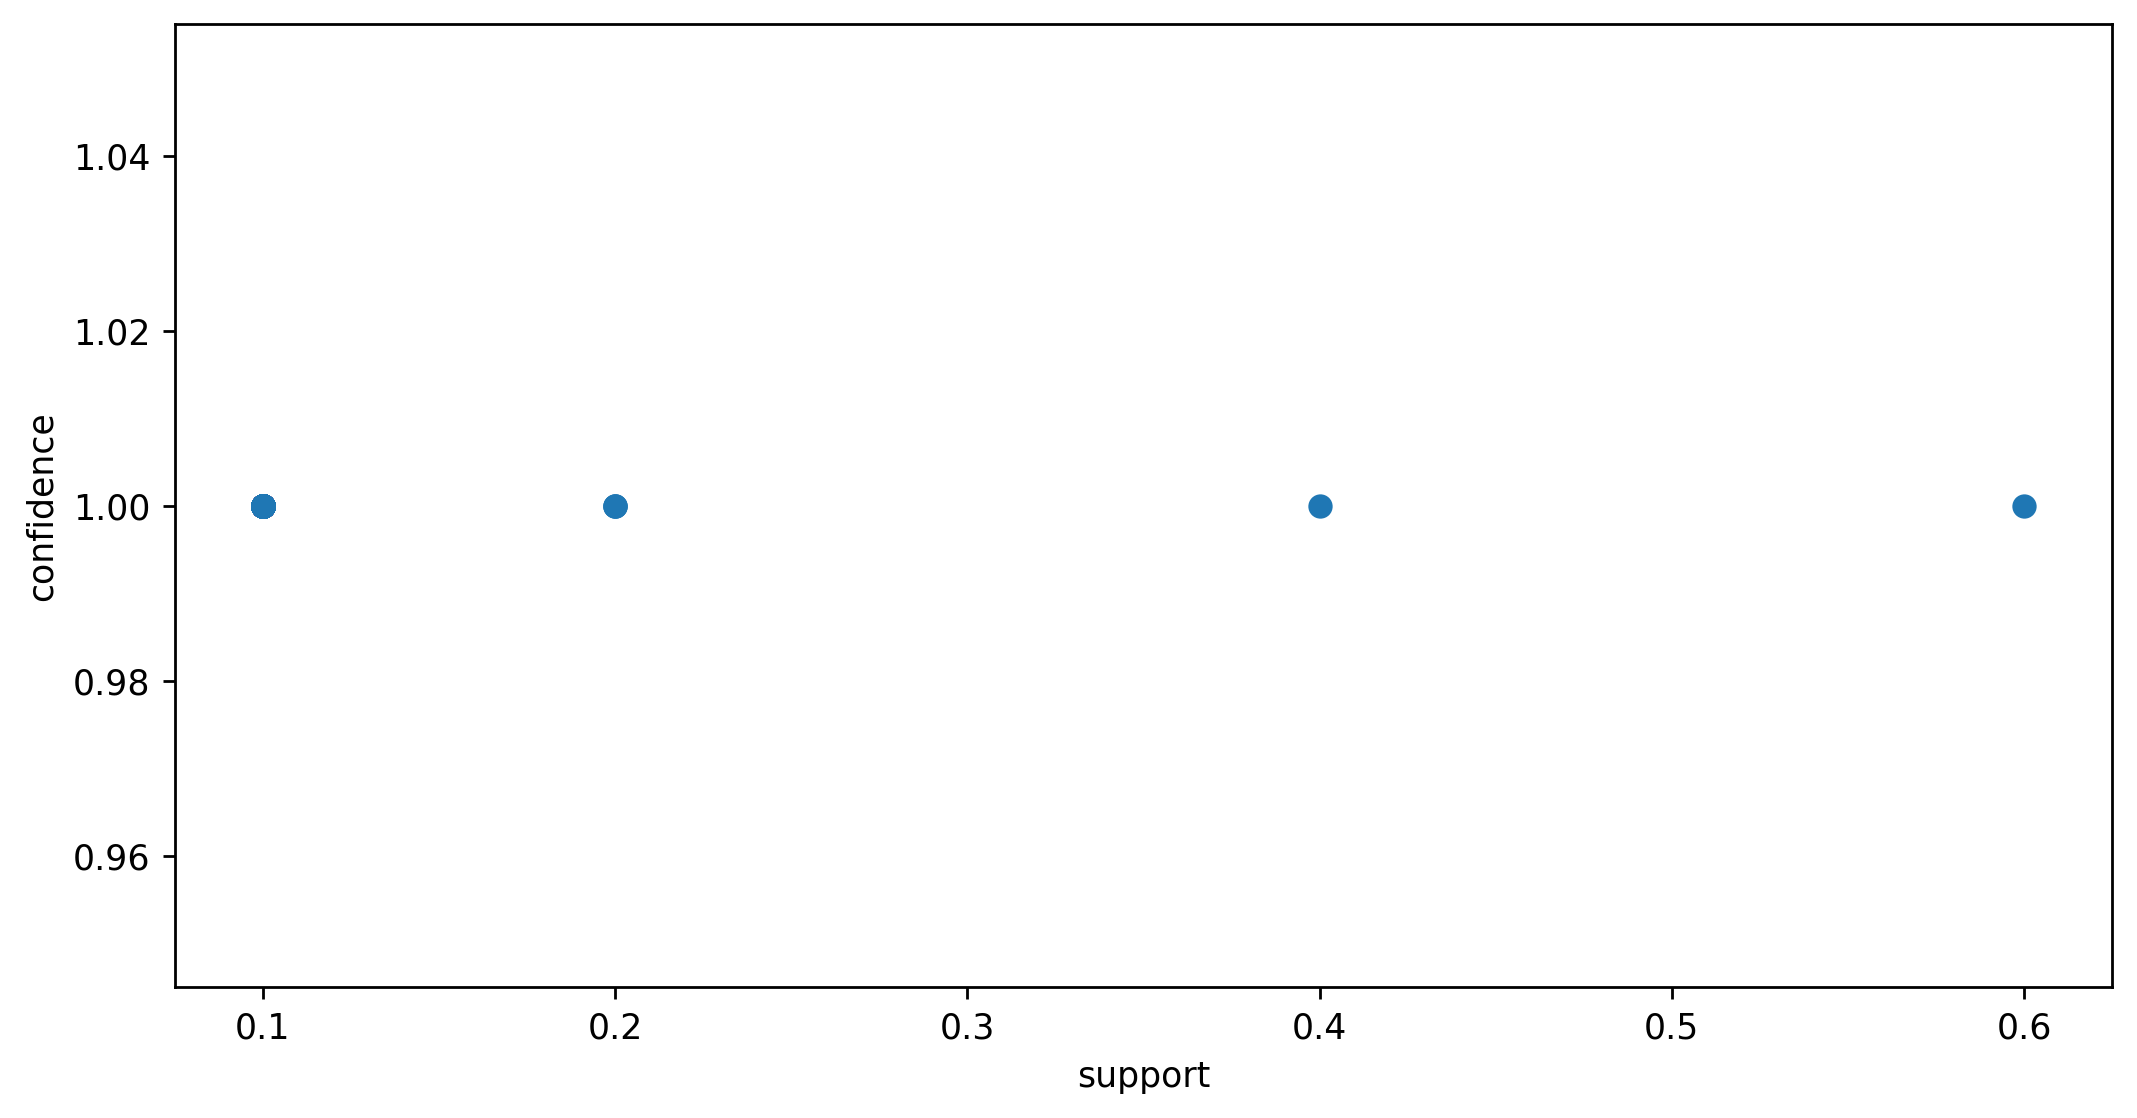

In [22]:
plt.scatter(model['support'], model['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [23]:
matrix = model.pivot('antecedents','consequents','lift')
matrix

consequents                                      (Sixth Sense)  \
antecedents                                                      
(LOTR)                                                1.666667   
(Sixth Sense, Green Mile, LOTR)                            NaN   
(Sixth Sense, Gladiator, LOTR)                             NaN   
(Green Mile, Gladiator, LOTR)                         1.666667   
(Sixth Sense, LOTR1, Harry Potter1)                        NaN   
(Sixth Sense, LOTR1, LOTR2)                                NaN   
(Sixth Sense, Harry Potter1, LOTR2)                        NaN   
(LOTR1, Harry Potter1, LOTR2)                         1.666667   
(Sixth Sense, LOTR1, Green Mile)                           NaN   
(Sixth Sense, Green Mile, Gladiator)                       NaN   
(Sixth Sense, Harry Potter1, Green Mile)                   NaN   
(Sixth Sense, Green Mile, LOTR2)                           NaN   
(LOTR1, Green Mile, LOTR2)                            1.666667   
(Green Mile, Harry Potter1, LOTR2)                    1.666667   
(LOTR1, Harry Potter1, Green Mile, LOTR2)             1.666667   
(LOTR1, Harry Potter1, Green Mile, Sixth Sense)            NaN   
(Braveheart)                                               NaN   
(Patriot)                                                  NaN   
(LOTR1, Harry Potter1, LOTR2, Sixth Sense)                 NaN   
(LOTR1, Harry Potter1, Green Mile)                    1.666667   
(Gladiator, Braveheart)                                    NaN   
(Patriot, Braveheart)                                      NaN   
(Green Mile)                                          1.666667   
(Green Mile, LOTR)                                    1.666667   
(LOTR1)                                                    NaN   
(LOTR2)                                                    NaN   
(Harry Potter2)                                            NaN   
(Sixth Sense, Patriot)                                     NaN   
(Sixth Sense, LOTR)                                        NaN   
(Gladiator, LOTR)                                     1.666667   
(LOTR1, Sixth Sense, Green Mile, LOTR2)                    NaN   
(Green Mile, Gladiator)                               1.666667   
(Sixth Sense, Harry Potter1)                               NaN   
(LOTR1, Harry Potter1)                                1.666667   
(Sixth Sense, LOTR2)                                       NaN   
(LOTR1, Green Mile)                                   1.666667   
(Harry Potter1, LOTR2)                                1.666667   
(Green Mile, Harry Potter1)                           1.666667   
(Green Mile, LOTR2)                                   1.666667   
(Sixth Sense, LOTR1)                                       NaN   
(Green Mile, Harry Potter1, LOTR2, Sixth Sense)            NaN   

consequents                                      (LOTR1, Green Mile, Sixth Sense)  \
antecedents                                                                         
(LOTR)                                                                        NaN   
(Sixth Sense, Green Mile, LOTR)                                               NaN   
(Sixth Sense, Gladiator, LOTR)                                                NaN   
(Green Mile, Gladiator, LOTR)                                                 NaN   
(Sixth Sense, LOTR1, Harry Potter1)                                           NaN   
(Sixth Sense, LOTR1, LOTR2)                                                   NaN   
(Sixth Sense, Harry Potter1, LOTR2)                                           NaN   
(LOTR1, Harry Potter1, LOTR2)                                                 NaN   
(Sixth Sense, LOTR1, Green Mile)                                              NaN   
(Sixth Sense, Green Mile, Gladiator)                                          NaN   
(Sixth Sense, Harry Potter1, Green Mile)                                      NaN   
(Sixth Sense, Green Mile, LOTR2)                        

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

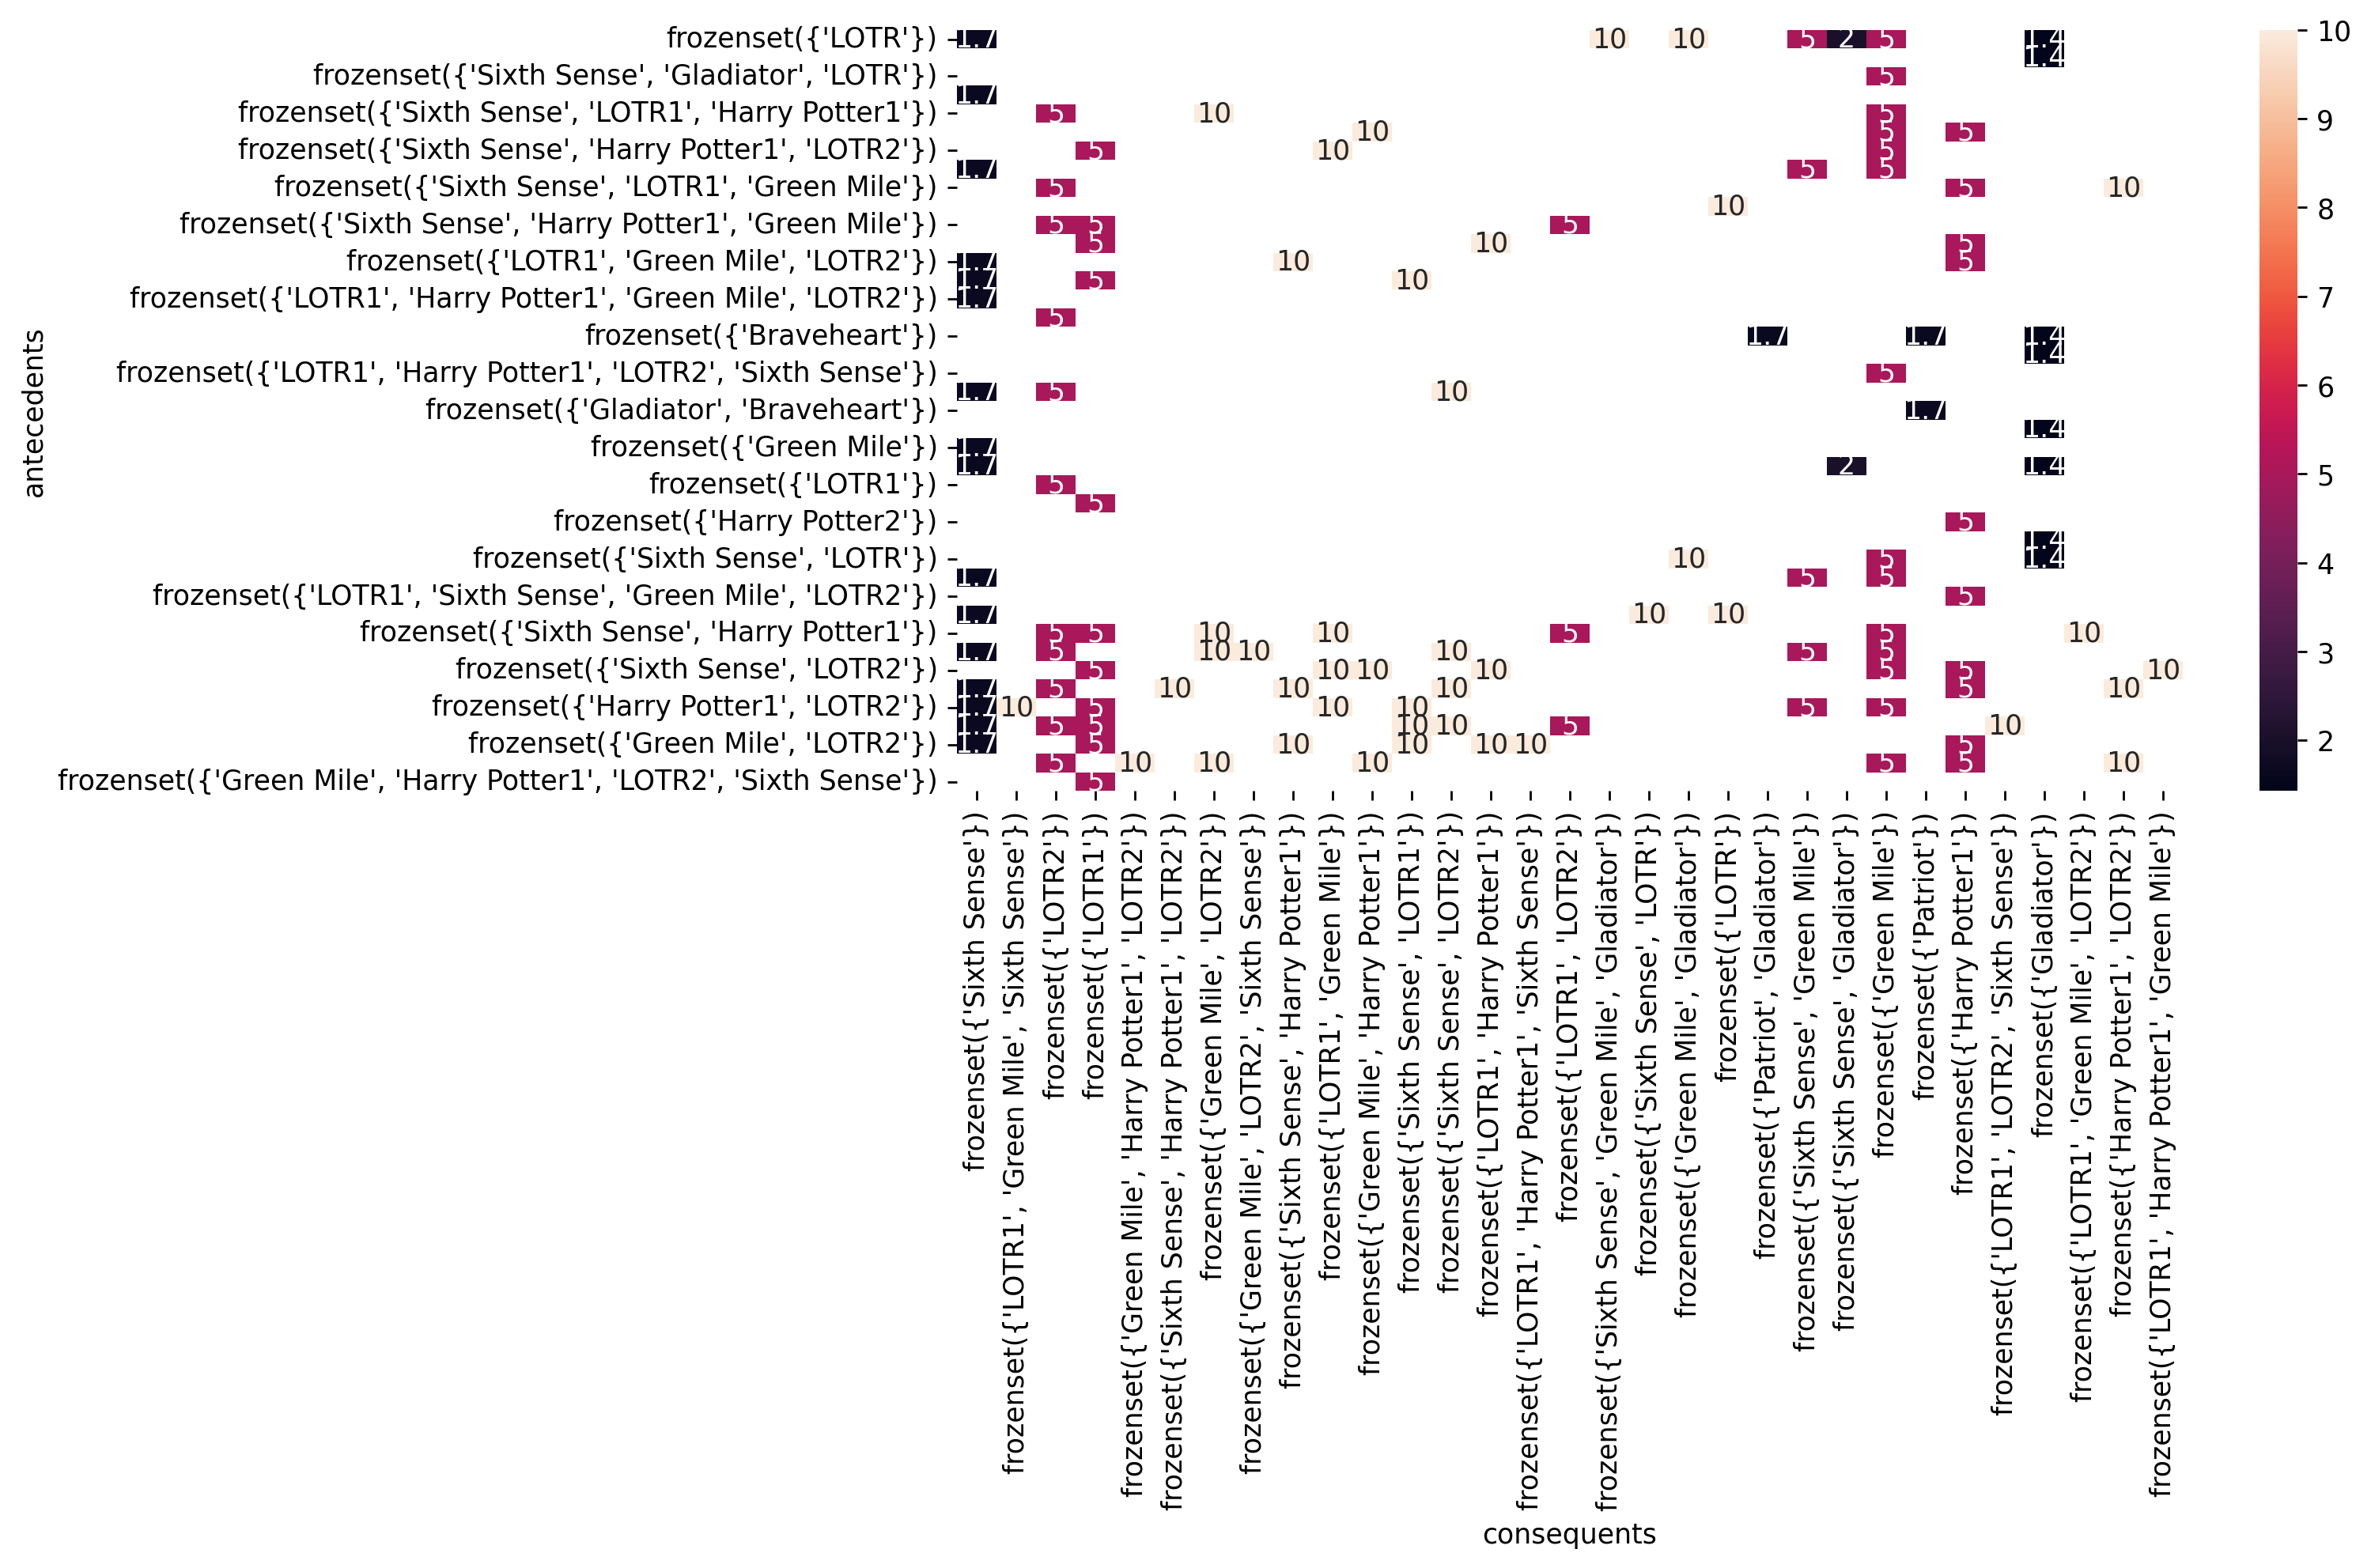

In [24]:
sns.heatmap(matrix, annot=True)

For support of 10% and confidence of 70%

In [25]:
#Again we can use same score params above
model = association_rules(score, metric='confidence', min_threshold=0.7)
model.sort_values('confidence', ascending=False)

antecedents                  consequents  \
64  (Sixth Sense, Harry Potter1, LOTR2)                      (LOTR1)   
65        (LOTR1, Harry Potter1, LOTR2)                (Sixth Sense)   
95               (Harry Potter1, LOTR2)    (Sixth Sense, Green Mile)   
94          (Green Mile, Harry Potter1)         (Sixth Sense, LOTR2)   
93                 (Sixth Sense, LOTR2)  (Green Mile, Harry Potter1)   
..                                  ...                          ...   
4                             (Patriot)                  (Gladiator)   
5                           (Gladiator)                    (Patriot)   
0                         (Sixth Sense)                  (Gladiator)   
13             (Sixth Sense, Gladiator)                    (Patriot)   
1                           (Gladiator)                (Sixth Sense)   

    antecedent support  consequent support  support  confidence       lift  \
64                 0.1                 0.2      0.1    1.000000   5.000000   
65                 0.1                 0.6      0.1    1.000000   1.666667   
95                 0.1                 0.2      0.1    1.000000   5.000000   
94                 0.1                 0.1      0.1    1.000000  10.000000   
93                 0.1                 0.1      0.1    1.000000  10.000000   
..                 ...                 ...      ...         ...        ...   
4                  0.6                 0.7      0.6    1.000000   1.428571   
5                  0.7                 0.6      0.6    0.857143   1.428571   
0                  0.6                 0.7      0.5    0.833333   1.190476   
13                 0.5                 0.6      0.4    0.800000   1.333333   
1                  0.7                 0.6      0.5    0.714286   1.190476   

    leverage  conviction  zhangs_metric  
64      0.08         inf       0.888889  
65      0.04         inf       0.444444  
95      0.08         inf       0.888889  
94      0.09         inf       1.000000  
93      0.09         inf       1.000000  
..       ...         ...            ...  
4       0.18         inf       0.750000  
5       0.18         2.8       1.000000  
0       0.08         1.8       0.400000  
13      0.10         2.0       0.500000  
1       0.08         1.4       0.533333  

[129 rows x 10 columns]

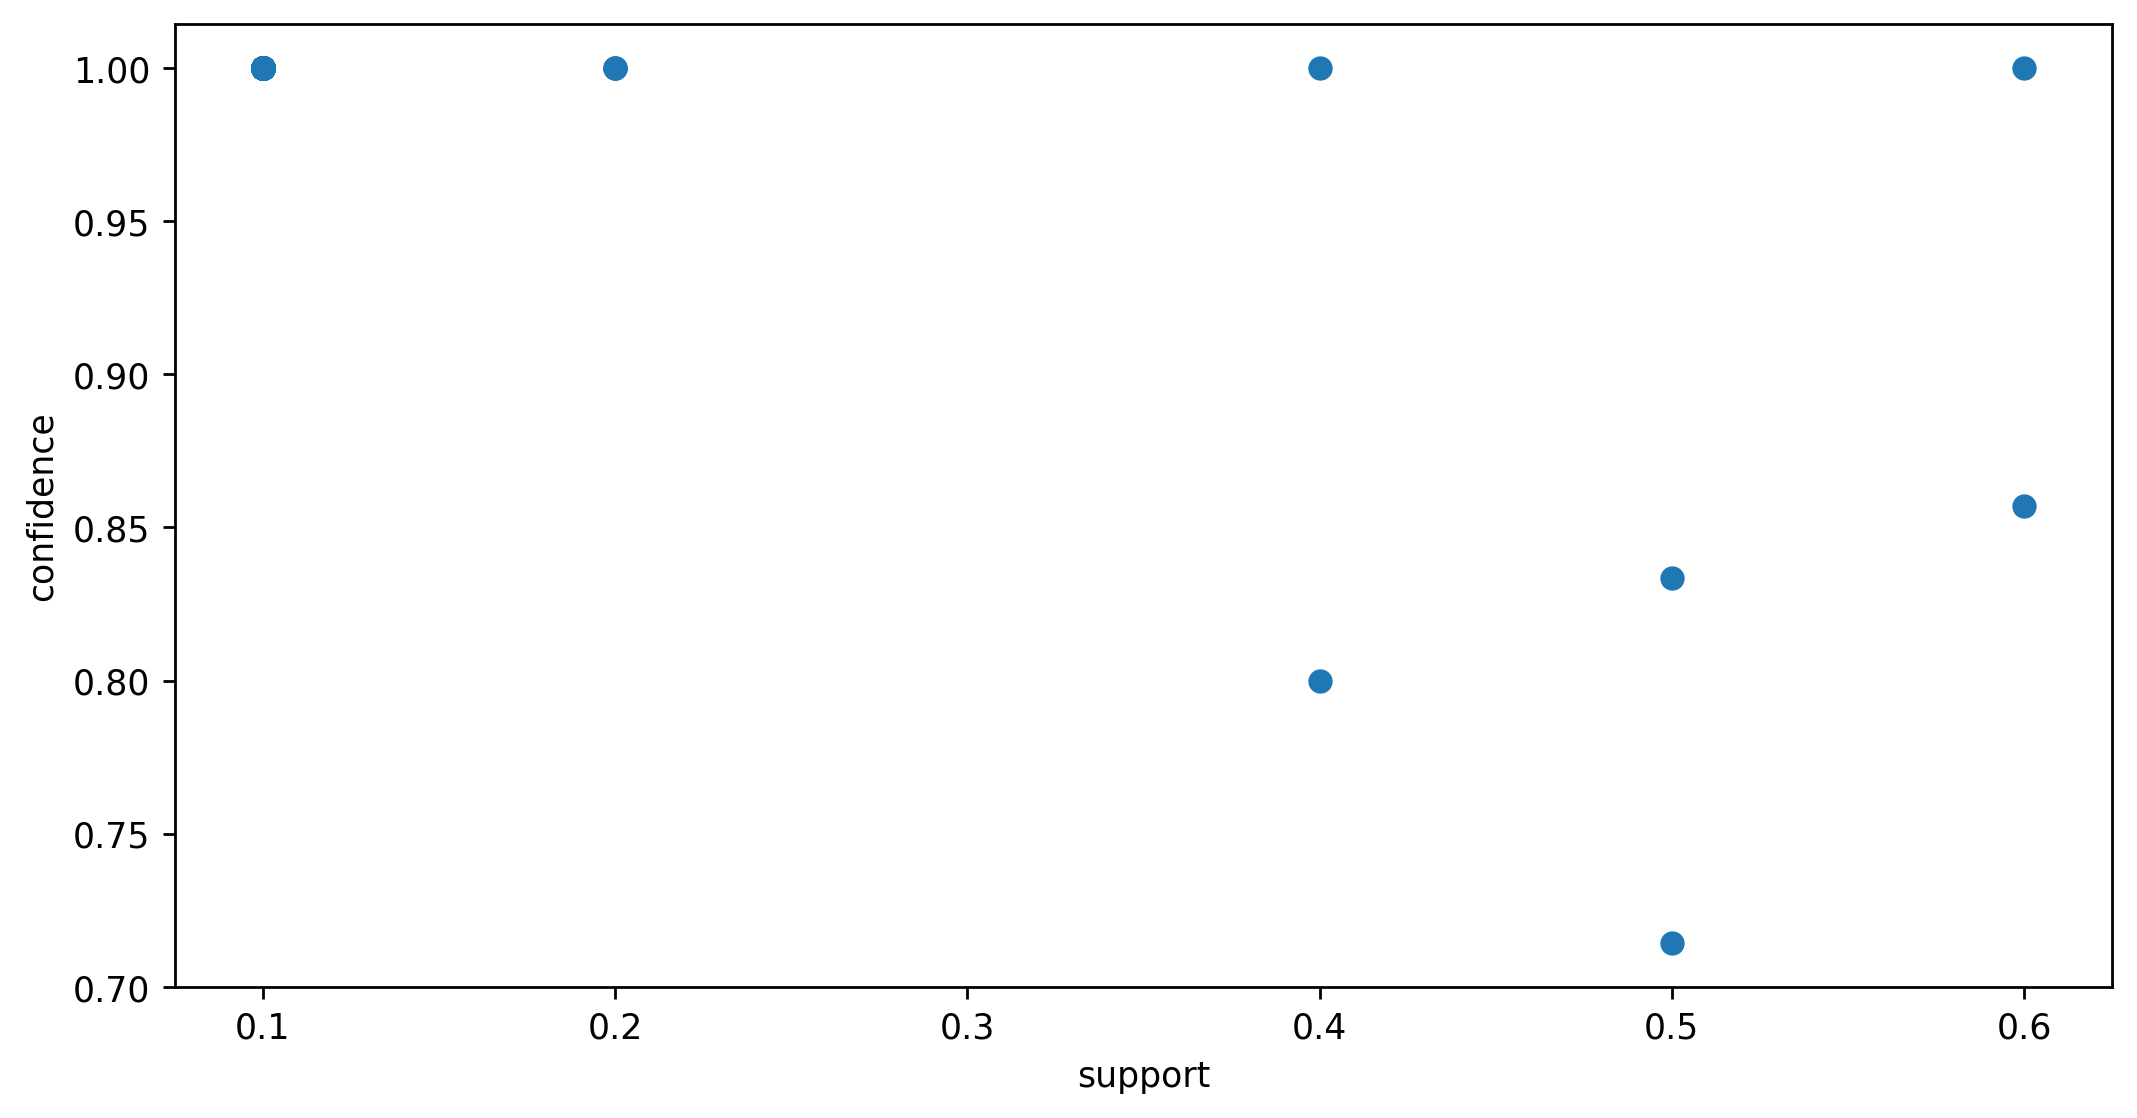

In [26]:
plt.scatter(model['support'], model['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [27]:
matrix = model.pivot('antecedents','consequents','lift')
matrix

consequents                                      (Gladiator)  \
antecedents                                                    
(Sixth Sense)                                       1.190476   
(Patriot, Braveheart)                               1.428571   
(Gladiator, Braveheart)                                  NaN   
(Sixth Sense, Green Mile, Gladiator)                     NaN   
(Sixth Sense, Green Mile, LOTR)                     1.428571   
(Sixth Sense, Gladiator, LOTR)                           NaN   
(Green Mile, Gladiator, LOTR)                            NaN   
(LOTR2)                                                  NaN   
(Sixth Sense, LOTR1, Harry Potter1)                      NaN   
(Sixth Sense, LOTR1, LOTR2)                              NaN   
(Sixth Sense, Harry Potter1, LOTR2)                      NaN   
(LOTR1, Harry Potter1, LOTR2)                            NaN   
(Green Mile)                                             NaN   
(Sixth Sense, LOTR1, Green Mile)                         NaN   
(Sixth Sense, Harry Potter1, Green Mile)                 NaN   
(LOTR1, Harry Potter1, Green Mile)                       NaN   
(LOTR1, Harry Potter1, Green Mile, Sixth Sense)          NaN   
(LOTR1, Harry Potter1, LOTR2, Sixth Sense)               NaN   
(Green Mile, LOTR)                                  1.428571   
(Green Mile, Harry Potter1)                              NaN   
(Green Mile, LOTR2)                                      NaN   
(LOTR1, Sixth Sense, Green Mile, LOTR2)                  NaN   
(Gladiator)                                              NaN   
(LOTR)                                              1.428571   
(Green Mile, Harry Potter1, LOTR2)                       NaN   
(LOTR1, Green Mile, LOTR2)                               NaN   
(LOTR1, Harry Potter1, Green Mile, LOTR2)                NaN   
(Sixth Sense, Green Mile, LOTR2)                         NaN   
(Patriot)                                           1.428571   
(Braveheart)                                        1.428571   
(LOTR1)                                                  NaN   
(Harry Potter1, LOTR2)                                   NaN   
(Harry Potter2)                                          NaN   
(Sixth Sense, Patriot)                              1.428571   
(Sixth Sense, LOTR)                                 1.428571   
(Gladiator, LOTR)                                        NaN   
(Green Mile, Gladiator)                                  NaN   
(Sixth Sense, LOTR1)                                     NaN   
(Sixth Sense, Harry Potter1)                             NaN   
(LOTR1, Harry Potter1)                                   NaN   
(Sixth Sense, LOTR2)                                     NaN   
(LOTR1, Green Mile)                                      NaN   
(Sixth Sense, Gladiator)                                 NaN   
(Green Mile, Harry Potter1, LOTR2, Sixth Sense)          NaN   

consequents                                      (LOTR1, Green Mile, Sixth Sense)  \
antecedents                                                                         
(Sixth Sense)                                                                 NaN   
(Patriot, Braveheart)                                                         NaN   
(Gladiator, Braveheart)                                                       NaN   
(Sixth Sense, Green Mile, Gladiator)                                          NaN   
(Sixth Sense, Green Mile, LOTR)                                               NaN   
(Sixth Sense, Gladiator, LOTR)                                                NaN   
(Green Mile, Gladiator, LOTR)                                                 NaN   
(LOTR2)                                                                       NaN   
(Sixth Sense, LOTR1, Harry Potter1)                                           NaN   
(Sixth Sense, LOTR1, LOTR2)                                                   NaN   
(Sixth Sense, Harry Potter1, LOTR2)

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

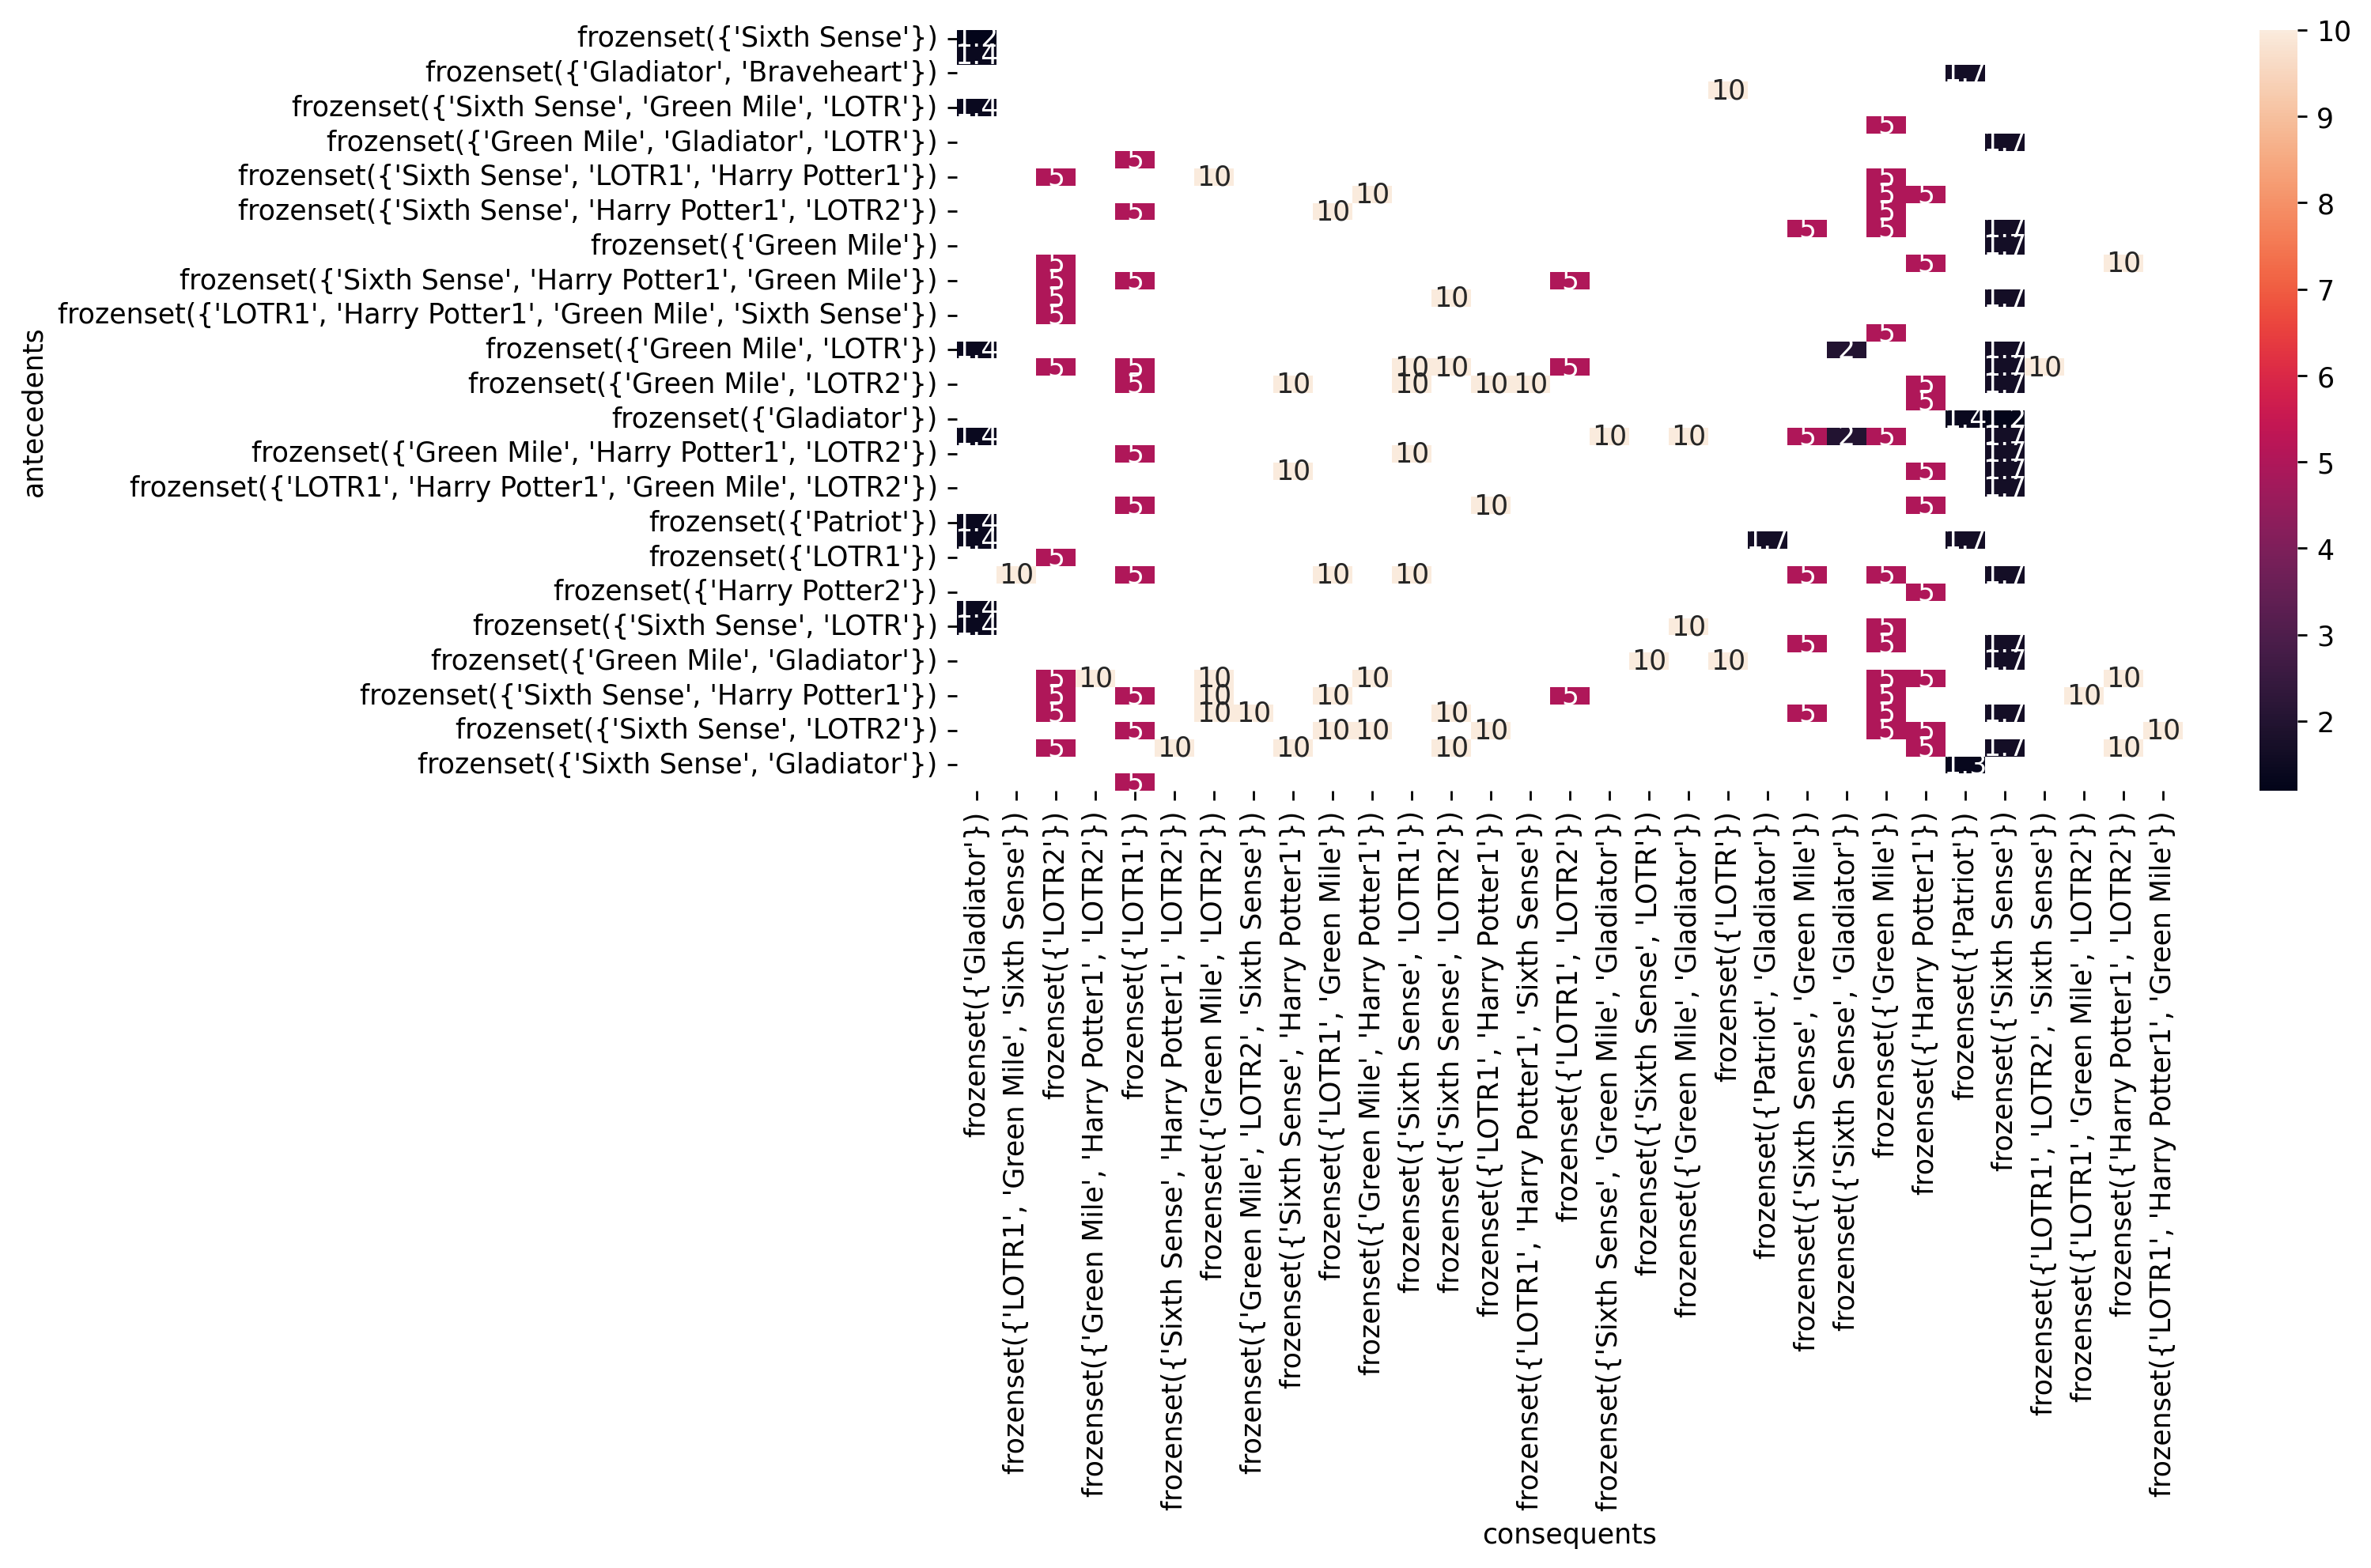

In [28]:
sns.heatmap(matrix, annot=True)

For support of 20% and confidence of 70%

In [29]:
score = apriori(data, min_support=0.2, use_colnames=True)
score

support                           itemsets
0       0.6                      (Sixth Sense)
1       0.7                        (Gladiator)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
4       0.6                          (Patriot)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
7       0.5           (Sixth Sense, Gladiator)
8       0.4             (Sixth Sense, Patriot)
9       0.2          (Sixth Sense, Green Mile)
10      0.6               (Patriot, Gladiator)
11      0.2                     (LOTR1, LOTR2)
12      0.4  (Sixth Sense, Gladiator, Patriot)

In [30]:
model = association_rules(score, metric='confidence', min_threshold=0.7)
model

antecedents    consequents  antecedent support  \
0             (Sixth Sense)    (Gladiator)                 0.6   
1               (Gladiator)  (Sixth Sense)                 0.7   
2              (Green Mile)  (Sixth Sense)                 0.2   
3                 (Patriot)    (Gladiator)                 0.6   
4               (Gladiator)      (Patriot)                 0.7   
5                   (LOTR1)        (LOTR2)                 0.2   
6                   (LOTR2)        (LOTR1)                 0.2   
7  (Sixth Sense, Gladiator)      (Patriot)                 0.5   
8    (Sixth Sense, Patriot)    (Gladiator)                 0.4   

   consequent support  support  confidence      lift  leverage  conviction  \
0                 0.7      0.5    0.833333  1.190476      0.08         1.8   
1                 0.6      0.5    0.714286  1.190476      0.08         1.4   
2                 0.6      0.2    1.000000  1.666667      0.08         inf   
3                 0.7      0.6    1.000000  1.428571      0.18         inf   
4                 0.6      0.6    0.857143  1.428571      0.18         2.8   
5                 0.2      0.2    1.000000  5.000000      0.16         inf   
6                 0.2      0.2    1.000000  5.000000      0.16         inf   
7                 0.6      0.4    0.800000  1.333333      0.10         2.0   
8                 0.7      0.4    1.000000  1.428571      0.12         inf   

   zhangs_metric  
0       0.400000  
1       0.533333  
2       0.500000  
3       0.750000  
4       1.000000  
5       1.000000  
6       1.000000  
7       0.500000  
8       0.500000

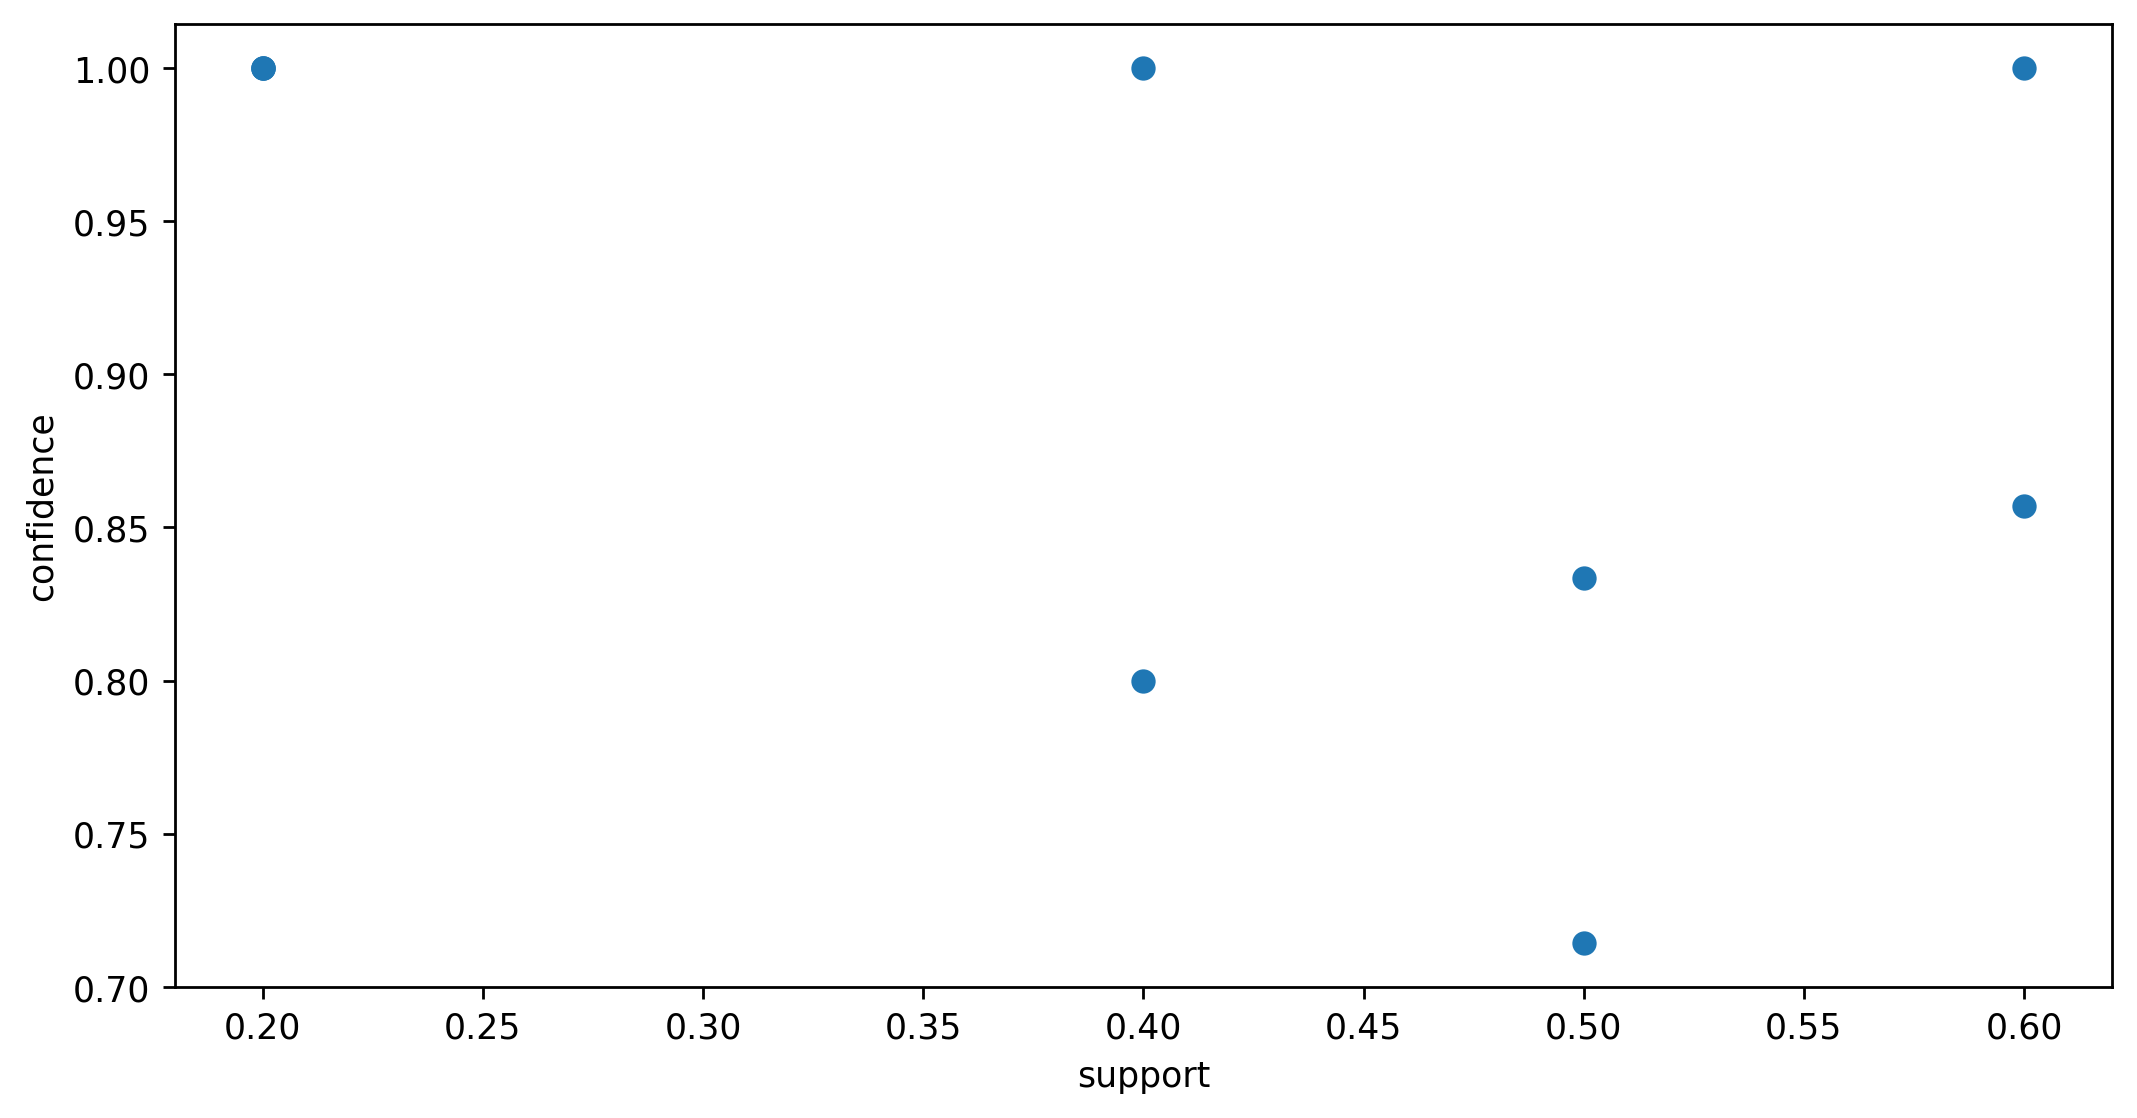

In [31]:
plt.scatter(model['support'], model['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [32]:
matrix = model.pivot('antecedents','consequents','lift')
matrix

consequents               (Gladiator)  (Sixth Sense)  (Patriot)  (LOTR2)  \
antecedents                                                                
(Sixth Sense)                1.190476            NaN        NaN      NaN   
(Gladiator)                       NaN       1.190476   1.428571      NaN   
(Green Mile)                      NaN       1.666667        NaN      NaN   
(Patriot)                    1.428571            NaN        NaN      NaN   
(LOTR1)                           NaN            NaN        NaN      5.0   
(LOTR2)                           NaN            NaN        NaN      NaN   
(Sixth Sense, Gladiator)          NaN            NaN   1.333333      NaN   
(Sixth Sense, Patriot)       1.428571            NaN        NaN      NaN   

consequents               (LOTR1)  
antecedents                        
(Sixth Sense)                 NaN  
(Gladiator)                   NaN  
(Green Mile)                  NaN  
(Patriot)                     NaN  
(LOTR1)                       NaN  
(LOTR2)                       5.0  
(Sixth Sense, Gladiator)      NaN  
(Sixth Sense, Patriot)        NaN

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

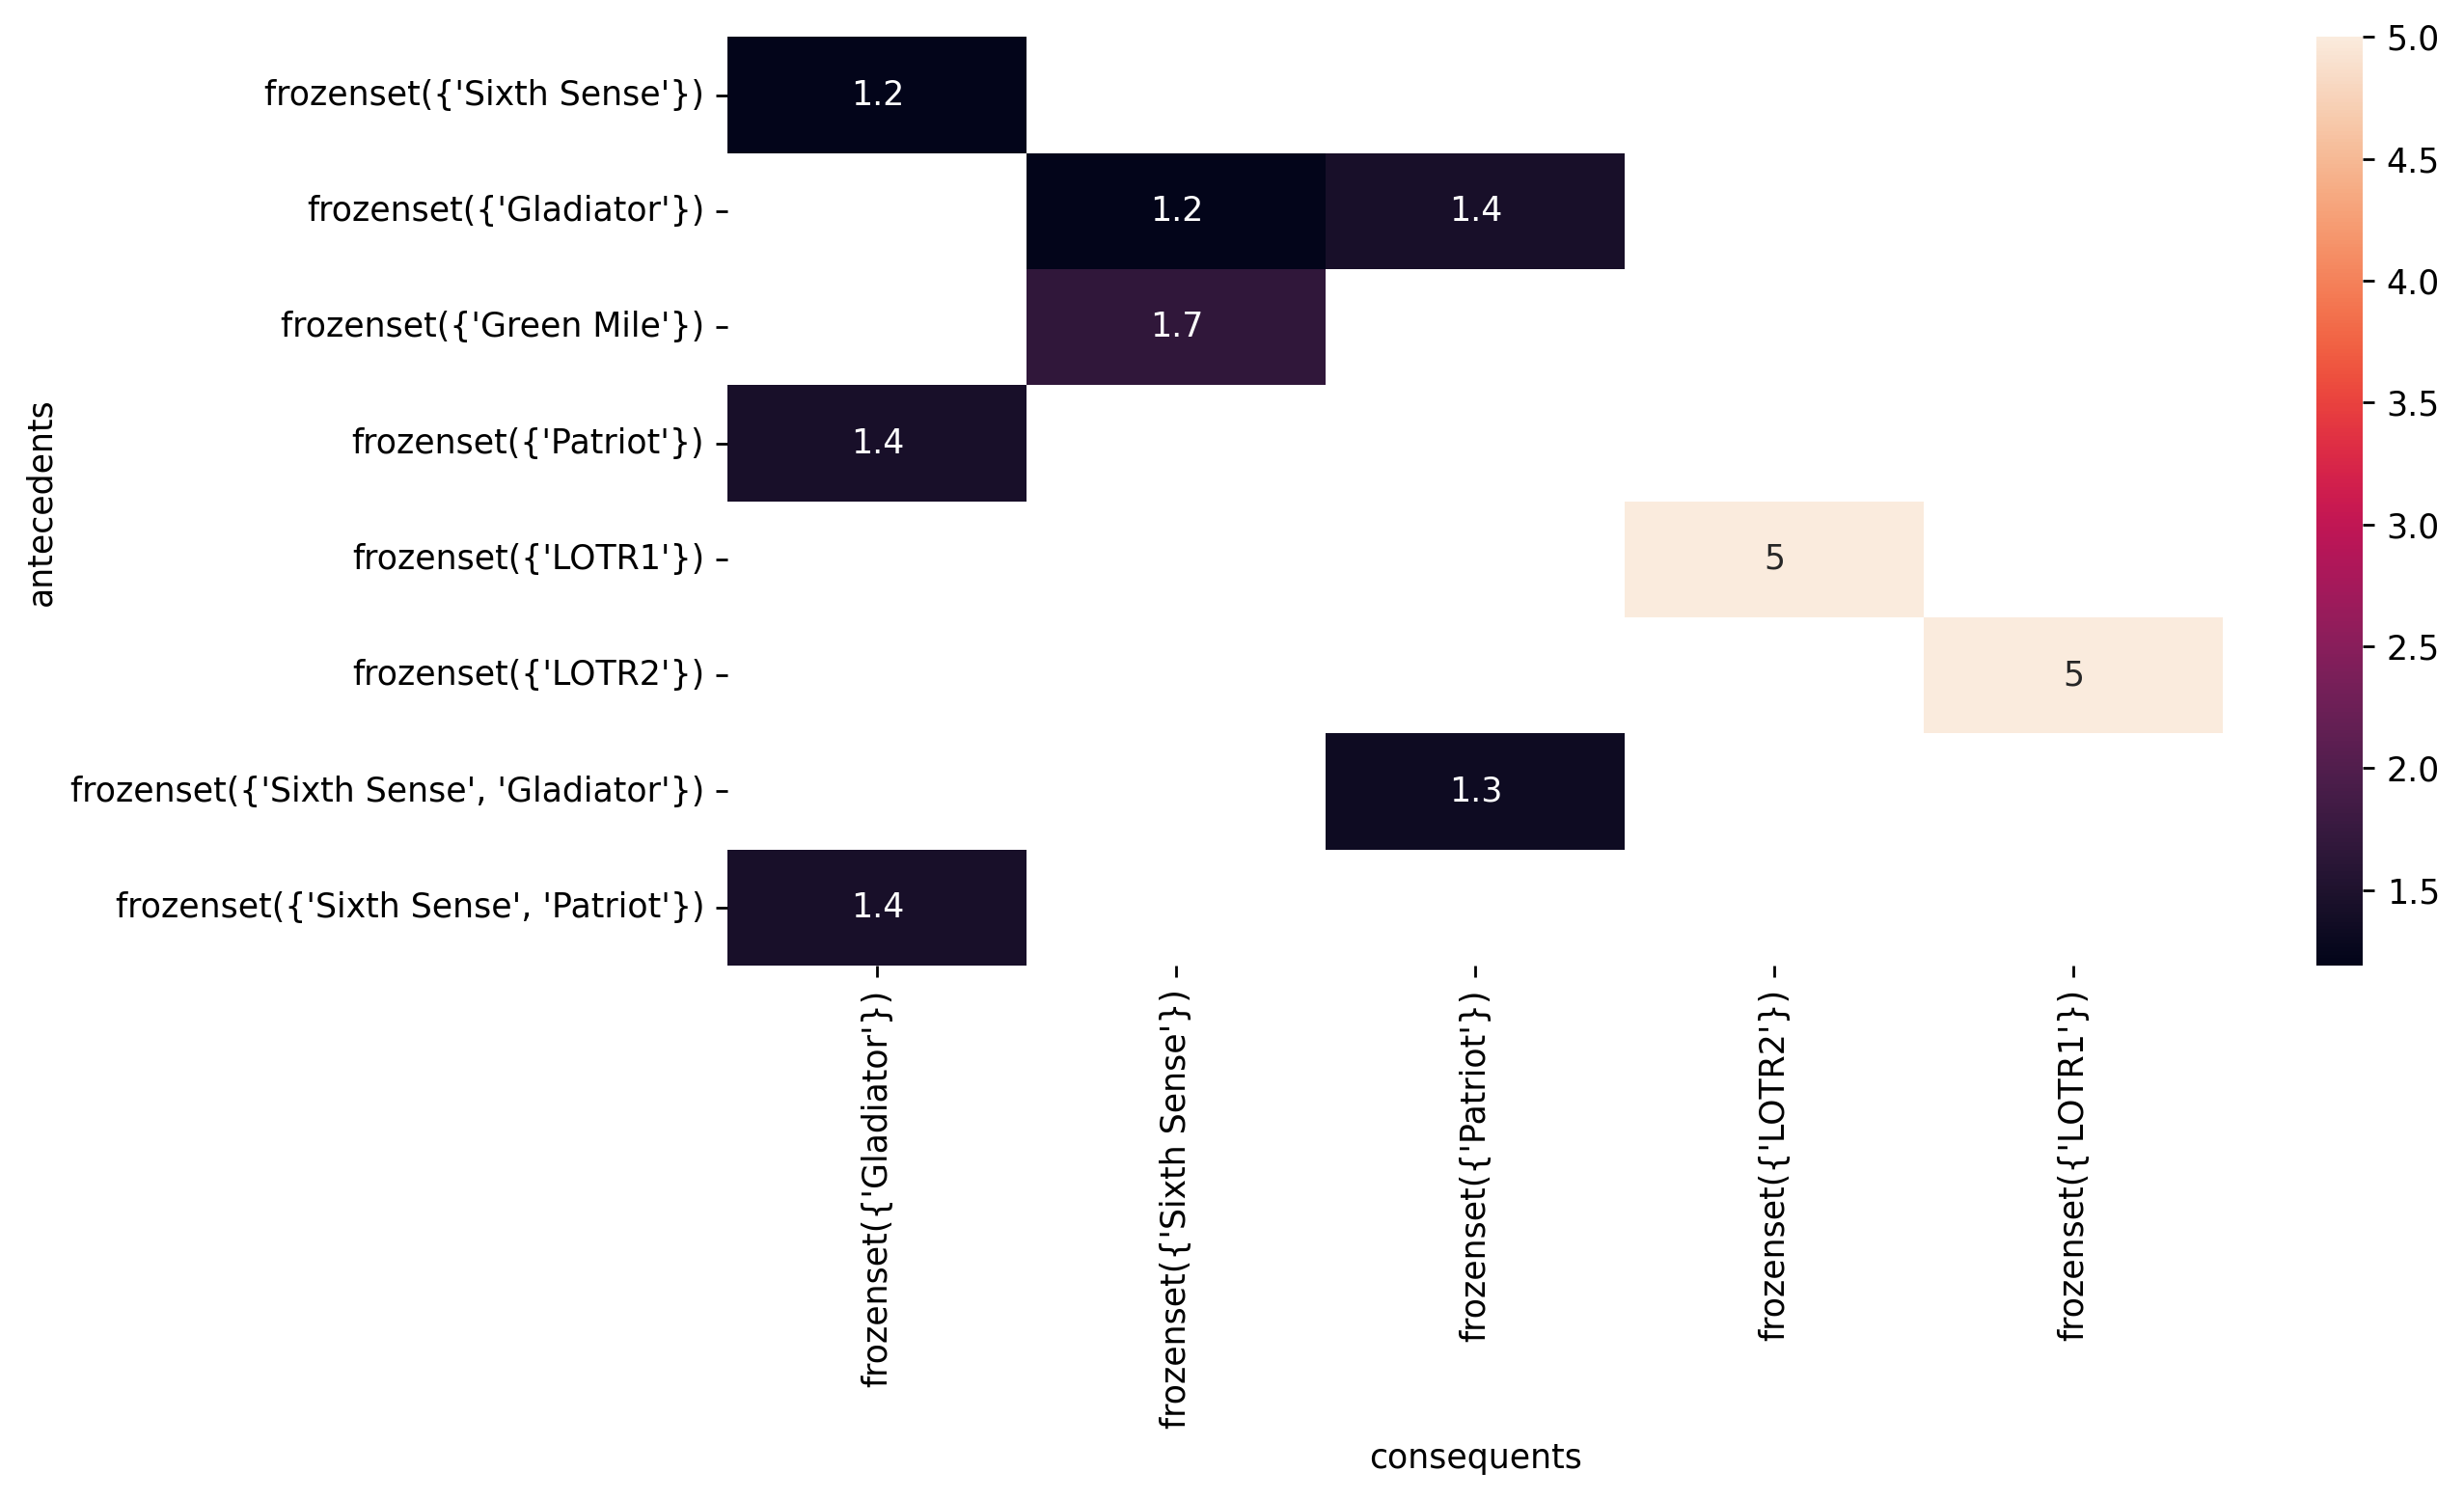

In [33]:
sns.heatmap(matrix, annot=True)

Now trying building association model using the lift ratio

For support of 20% and lift of 80%

In [34]:
score = apriori(data, min_support=0.2, use_colnames=True)
score

support                           itemsets
0       0.6                      (Sixth Sense)
1       0.7                        (Gladiator)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
4       0.6                          (Patriot)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
7       0.5           (Sixth Sense, Gladiator)
8       0.4             (Sixth Sense, Patriot)
9       0.2          (Sixth Sense, Green Mile)
10      0.6               (Patriot, Gladiator)
11      0.2                     (LOTR1, LOTR2)
12      0.4  (Sixth Sense, Gladiator, Patriot)

In [35]:
model = association_rules(score, metric='lift', min_threshold=0.8)
model.sort_values('lift', ascending=False)

antecedents               consequents  antecedent support  \
8                    (LOTR1)                   (LOTR2)                 0.2   
9                    (LOTR2)                   (LOTR1)                 0.2   
4              (Sixth Sense)              (Green Mile)                 0.6   
5               (Green Mile)             (Sixth Sense)                 0.2   
7                (Gladiator)                 (Patriot)                 0.7   
6                  (Patriot)               (Gladiator)                 0.6   
11    (Sixth Sense, Patriot)               (Gladiator)                 0.4   
14               (Gladiator)    (Sixth Sense, Patriot)                 0.7   
10  (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
15                 (Patriot)  (Sixth Sense, Gladiator)                 0.6   
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2              (Sixth Sense)                 (Patriot)                 0.6   
3                  (Patriot)             (Sixth Sense)                 0.6   
12      (Patriot, Gladiator)             (Sixth Sense)                 0.6   
13             (Sixth Sense)      (Patriot, Gladiator)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  \
8                  0.2      0.2    1.000000  5.000000      0.16         inf   
9                  0.2      0.2    1.000000  5.000000      0.16         inf   
4                  0.2      0.2    0.333333  1.666667      0.08         1.2   
5                  0.6      0.2    1.000000  1.666667      0.08         inf   
7                  0.6      0.6    0.857143  1.428571      0.18         2.8   
6                  0.7      0.6    1.000000  1.428571      0.18         inf   
11                 0.7      0.4    1.000000  1.428571      0.12         inf   
14                 0.4      0.4    0.571429  1.428571      0.12         1.4   
10                 0.6      0.4    0.800000  1.333333      0.10         2.0   
15                 0.5      0.4    0.666667  1.333333      0.10         1.5   
0                  0.7      0.5    0.833333  1.190476      0.08         1.8   
1                  0.6      0.5    0.714286  1.190476      0.08         1.4   
2                  0.6      0.4    0.666667  1.111111      0.04         1.2   
3                  0.6      0.4    0.666667  1.111111      0.04         1.2   
12                 0.6      0.4    0.666667  1.111111      0.04         1.2   
13                 0.6      0.4    0.666667  1.111111      0.04         1.2   

    zhangs_metric  
8        1.000000  
9        1.000000  
4        1.000000  
5        0.500000  
7        1.000000  
6        0.750000  
11       0.500000  
14       1.000000  
10       0.500000  
15       0.625000  
0        0.400000  
1        0.533333  
2        0.250000  
3        0.250000  
12       0.250000  
13       0.250000

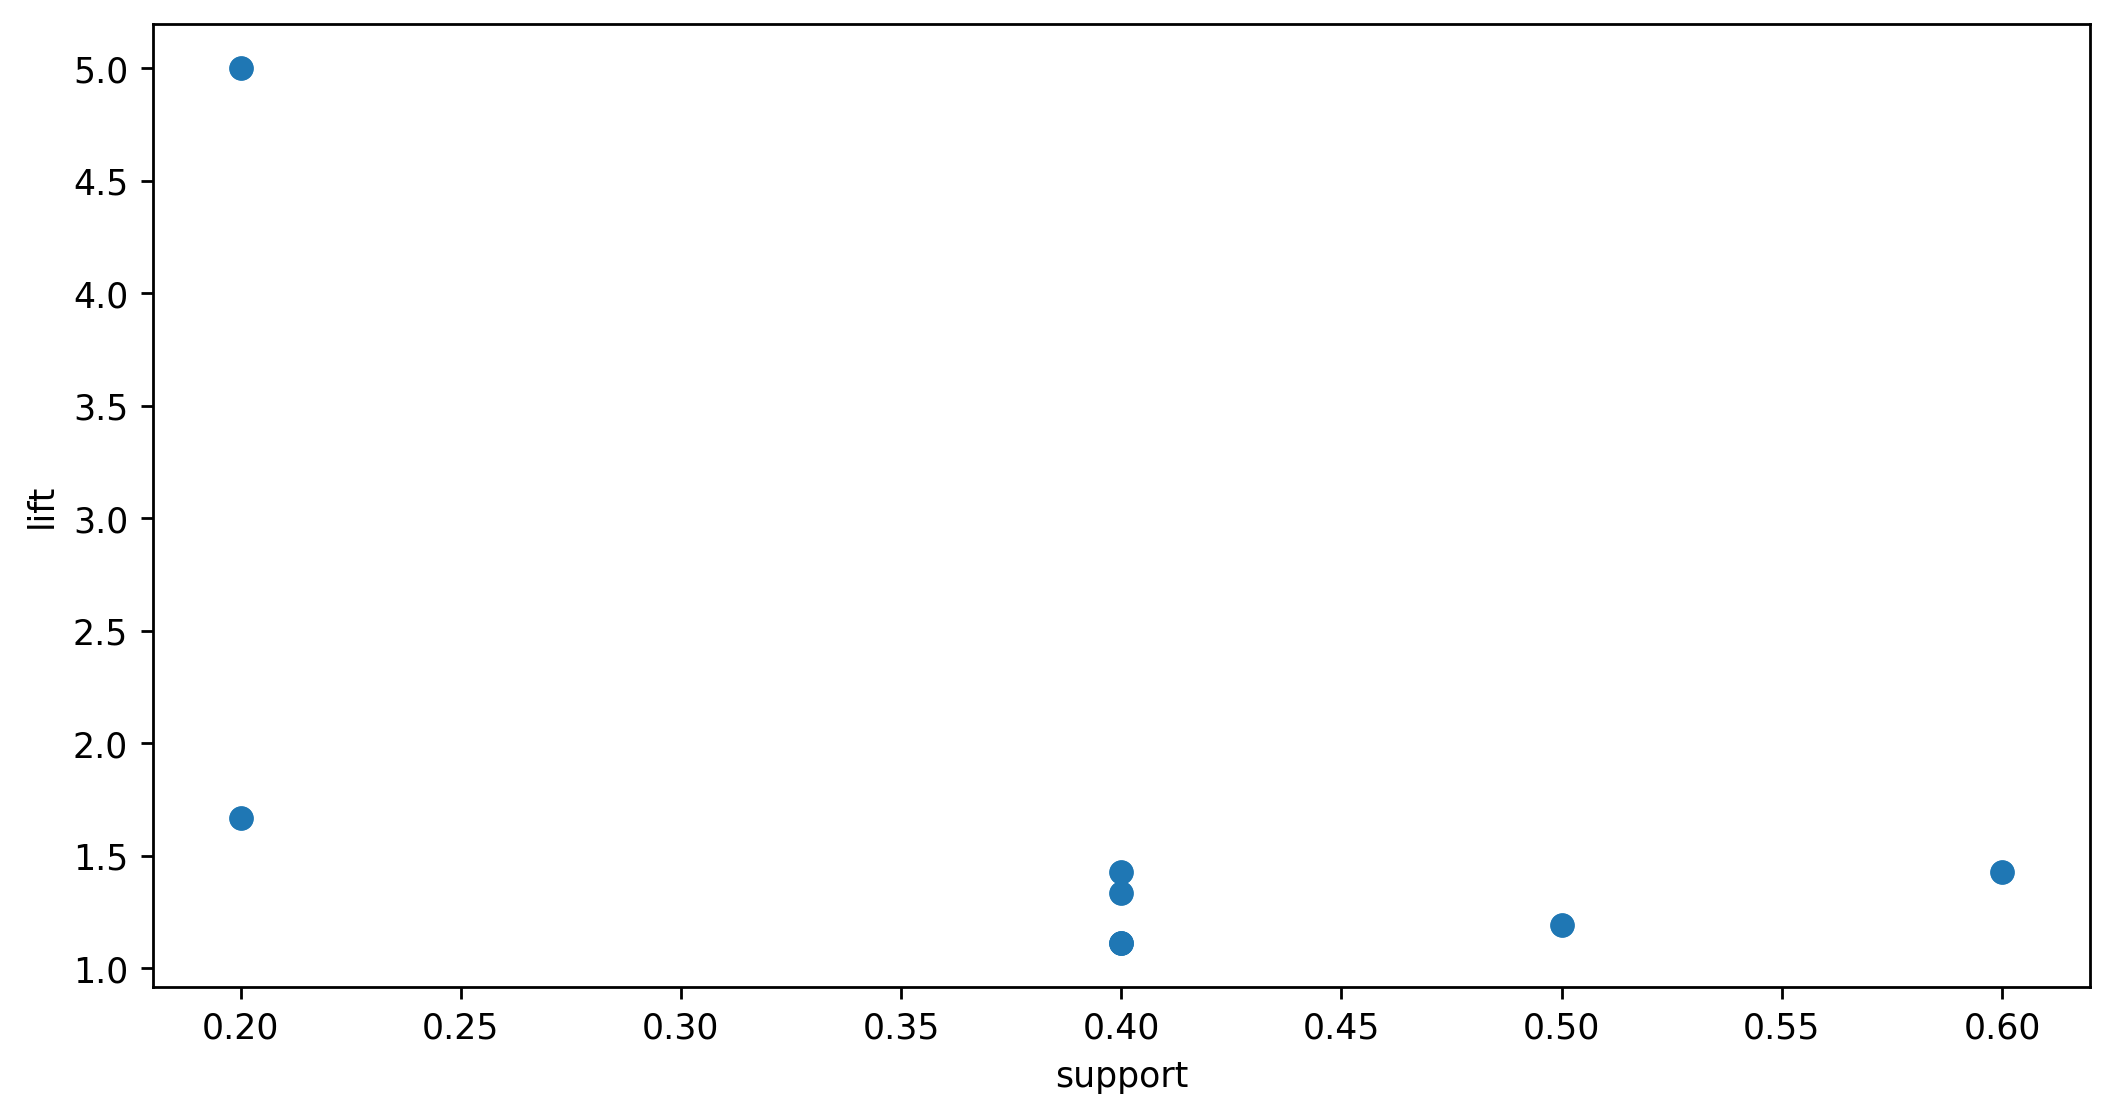

In [36]:
plt.scatter(model['support'], model['lift'])
plt.xlabel('support')
plt.ylabel('lift')
plt.show()

In [37]:
matrix = model.pivot('antecedents','consequents','lift')
matrix

consequents               (Gladiator)  (Sixth Sense)  (Patriot)  (Green Mile)  \
antecedents                                                                     
(Sixth Sense)                1.190476            NaN   1.111111      1.666667   
(Gladiator)                       NaN       1.190476   1.428571           NaN   
(Patriot)                    1.428571       1.111111        NaN           NaN   
(Green Mile)                      NaN       1.666667        NaN           NaN   
(LOTR1)                           NaN            NaN        NaN           NaN   
(LOTR2)                           NaN            NaN        NaN           NaN   
(Sixth Sense, Gladiator)          NaN            NaN   1.333333           NaN   
(Sixth Sense, Patriot)       1.428571            NaN        NaN           NaN   
(Patriot, Gladiator)              NaN       1.111111        NaN           NaN   

consequents               (LOTR2)  (LOTR1)  (Patriot, Gladiator)  \
antecedents                                                        
(Sixth Sense)                 NaN      NaN              1.111111   
(Gladiator)                   NaN      NaN                   NaN   
(Patriot)                     NaN      NaN                   NaN   
(Green Mile)                  NaN      NaN                   NaN   
(LOTR1)                       5.0      NaN                   NaN   
(LOTR2)                       NaN      5.0                   NaN   
(Sixth Sense, Gladiator)      NaN      NaN                   NaN   
(Sixth Sense, Patriot)        NaN      NaN                   NaN   
(Patriot, Gladiator)          NaN      NaN                   NaN   

consequents               (Sixth Sense, Patriot)  (Sixth Sense, Gladiator)  
antecedents                                                                 
(Sixth Sense)                                NaN                       NaN  
(Gladiator)                             1.428571                       NaN  
(Patriot)                                    NaN                  1.333333  
(Green Mile)                                 NaN                       NaN  
(LOTR1)                                      NaN                       NaN  
(LOTR2)                                      NaN                       NaN  
(Sixth Sense, Gladiator)                     NaN                       NaN  
(Sixth Sense, Patriot)                       NaN                       NaN  
(Patriot, Gladiator)                         NaN                       NaN

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

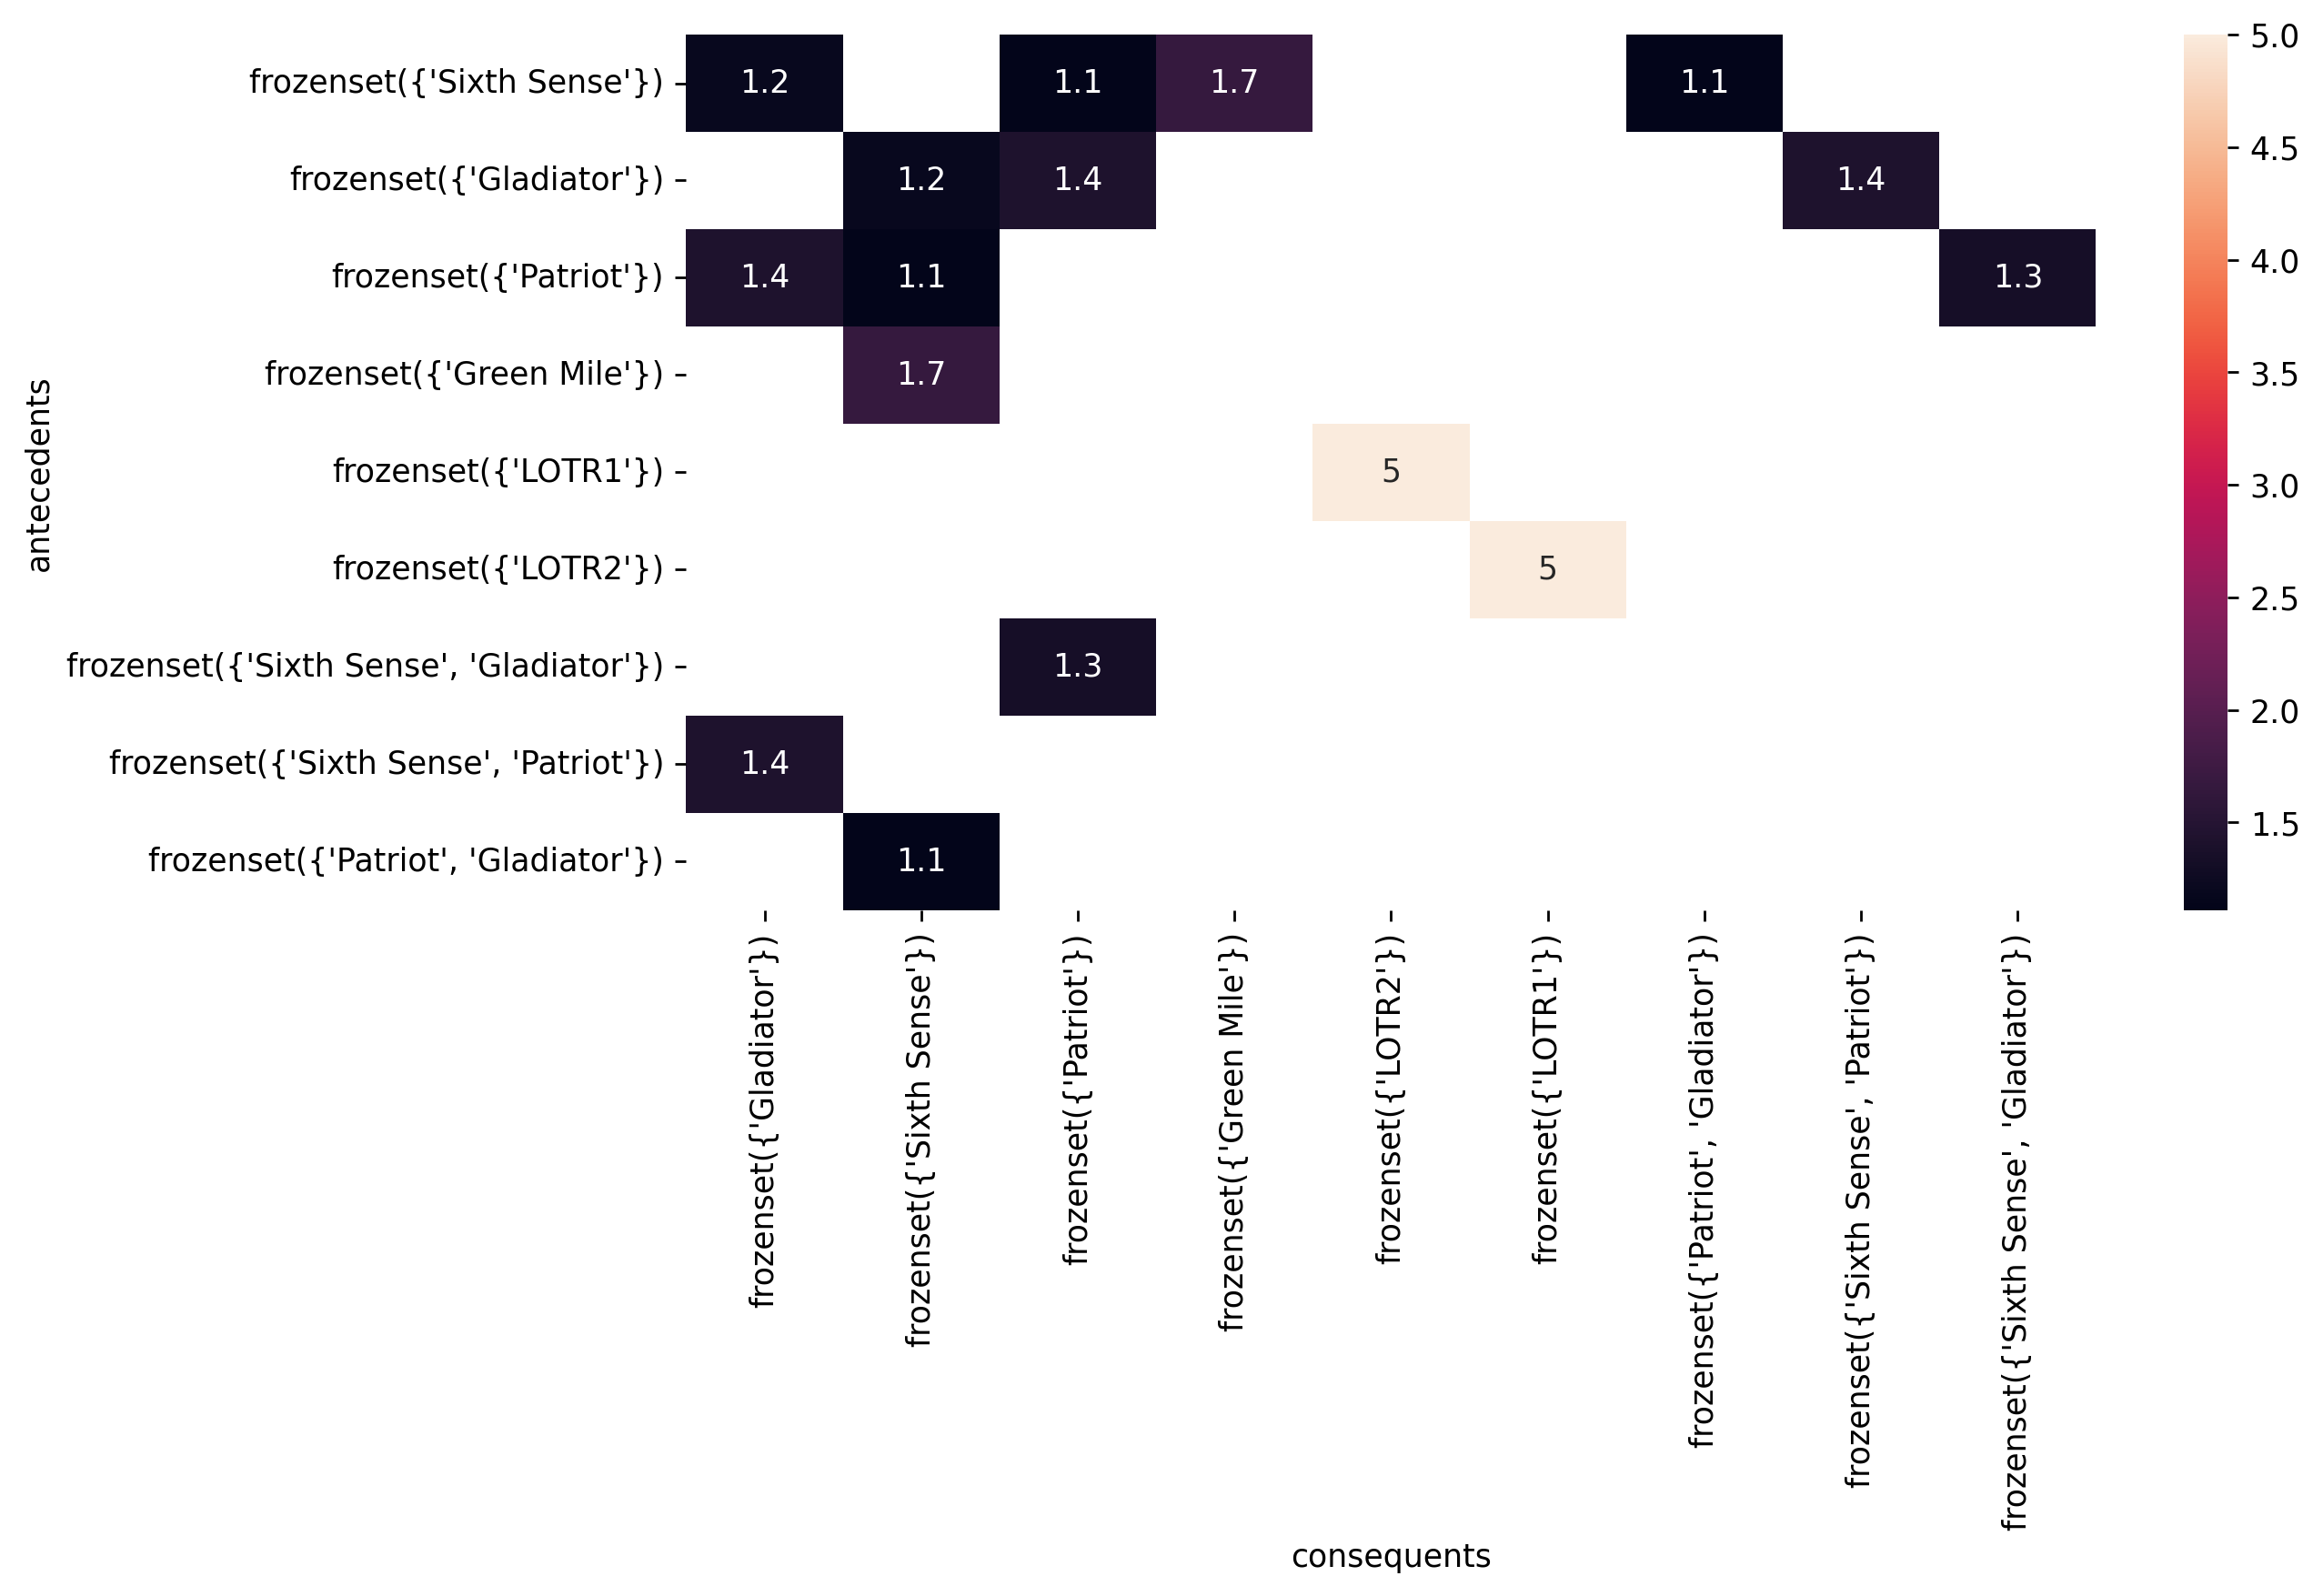

In [38]:
sns.heatmap(matrix, annot=True)

For 10% support and 80% lift

In [39]:
score = apriori(data, min_support=0.1, use_colnames=True)

In [40]:
score

support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Sixth Sense, Gladiator)
11      0.1                               (Sixth Sense, LOTR1)
12      0.1                       (Sixth Sense, Harry Potter1)
13      0.4                             (Sixth Sense, Patriot)
14      0.1                               (Sixth Sense, LOTR2)
15      0.1                                (Sixth Sense, LOTR)
16      0.2                          (Sixth Sense, Green Mile)
17      0.6                               (Patriot, Gladiator)
18      0.1                                  (Gladiator, LOTR)
19      0.1                            (Gladiator, Braveheart)
20      0.1                            (Green Mile, Gladiator)
21      0.1                             (LOTR1, Harry Potter1)
22      0.2                                     (LOTR1, LOTR2)
23      0.1                                (Green Mile, LOTR1)
24      0.1                             (Harry Potter1, LOTR2)
25      0.1                     (Harry Potter1, Harry Potter2)
26      0.1                        (Green Mile, Harry Potter1)
27      0.1                              (Patriot, Braveheart)
28      0.1                                (Green Mile, LOTR2)
29      0.1                                 (Green Mile, LOTR)
30      0.4                  (Sixth Sense, Gladiator, Patriot)
31      0.1                     (Sixth Sense, Gladiator, LOTR)
32      0.1               (Sixth Sense, Green Mile, Gladiator)
33      0.1                (Sixth Sense, LOTR1, Harry Potter1)
34      0.1                        (Sixth Sense, LOTR1, LOTR2)
35      0.1                   (Sixth Sense, LOTR1, Green Mile)
36      0.1                (Sixth Sense, Harry Potter1, LOTR2)
37      0.1           (Sixth Sense, Harry Potter1, Green Mile)
38      0.1                   (Sixth Sense, Green Mile, LOTR2)
39      0.1                    (Sixth Sense, Green Mile, LOTR)
40      0.1                   (Patriot, Gladiator, Braveheart)
41      0.1                      (Green Mile, Gladiator, LOTR)
42      0.1                      (LOTR1, Harry Potter1, LOTR2)
43      0.1                 (Green Mile, LOTR1, Harry Potter1)
44      0.1                         (Green Mile, LOTR1, LOTR2)
45      0.1                 (Green Mile, Harry Potter1, LOTR2)
46      0.1         (Sixth Sense, Green Mile, Gladiator, LOTR)
47      0.1         (Sixth Sense, LOTR1, Harry Potter1, LOTR2)
48      0.1    (Sixth Sense, LOTR1, Harry Potter1, Green Mile)
49      0.1            (Sixth Sense, LOTR1, Green Mile, LOTR2)
50      0.1    (Sixth Sense, Harry Potter1, Green Mile, LOTR2)
51      0.1          (Green Mile, LOTR1, Harry Potter1, LOTR2)
52      0.1  (LOTR1, Harry Potter1, Green Mile, LOTR2, Sixt...

In [41]:
model = association_rules(score, metric= 'lift', min_threshold=0.8)

In [42]:
model

antecedents                                      consequents  \
0      (Sixth Sense)                                      (Gladiator)   
1        (Gladiator)                                    (Sixth Sense)   
2      (Sixth Sense)                                          (LOTR1)   
3            (LOTR1)                                    (Sixth Sense)   
4      (Sixth Sense)                                  (Harry Potter1)   
..               ...                                              ...   
241          (LOTR1)  (Green Mile, Harry Potter1, LOTR2, Sixth Sense)   
242  (Harry Potter1)          (LOTR1, Sixth Sense, Green Mile, LOTR2)   
243     (Green Mile)       (LOTR1, Harry Potter1, LOTR2, Sixth Sense)   
244          (LOTR2)  (LOTR1, Harry Potter1, Green Mile, Sixth Sense)   
245    (Sixth Sense)        (LOTR1, Harry Potter1, Green Mile, LOTR2)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.7      0.5    0.833333  1.190476   
1                   0.7                 0.6      0.5    0.714286  1.190476   
2                   0.6                 0.2      0.1    0.166667  0.833333   
3                   0.2                 0.6      0.1    0.500000  0.833333   
4                   0.6                 0.2      0.1    0.166667  0.833333   
..                  ...                 ...      ...         ...       ...   
241                 0.2                 0.1      0.1    0.500000  5.000000   
242                 0.2                 0.1      0.1    0.500000  5.000000   
243                 0.2                 0.1      0.1    0.500000  5.000000   
244                 0.2                 0.1      0.1    0.500000  5.000000   
245                 0.6                 0.1      0.1    0.166667  1.666667   

     leverage  conviction  zhangs_metric  
0        0.08        1.80       0.400000  
1        0.08        1.40       0.533333  
2       -0.02        0.96      -0.333333  
3       -0.02        0.80      -0.200000  
4       -0.02        0.96      -0.333333  
..        ...         ...            ...  
241      0.08        1.80       1.000000  
242      0.08        1.80       1.000000  
243      0.08        1.80       1.000000  
244      0.08        1.80       1.000000  
245      0.04        1.08       1.000000  

[246 rows x 10 columns]

In [43]:
model.sort_values('lift', ascending=False)

antecedents                  consequents  \
183               (Green Mile, LOTR2)         (Sixth Sense, LOTR1)   
209            (LOTR1, Harry Potter1)          (Green Mile, LOTR2)   
169       (Green Mile, Harry Potter1)         (Sixth Sense, LOTR1)   
226       (LOTR1, LOTR2, Sixth Sense)  (Green Mile, Harry Potter1)   
225  (LOTR1, Green Mile, Sixth Sense)       (Harry Potter1, LOTR2)   
..                                ...                          ...   
8                       (Sixth Sense)                      (LOTR2)   
5                     (Harry Potter1)                (Sixth Sense)   
4                       (Sixth Sense)              (Harry Potter1)   
3                             (LOTR1)                (Sixth Sense)   
2                       (Sixth Sense)                      (LOTR1)   

     antecedent support  consequent support  support  confidence       lift  \
183                 0.1                 0.1      0.1    1.000000  10.000000   
209                 0.1                 0.1      0.1    1.000000  10.000000   
169                 0.1                 0.1      0.1    1.000000  10.000000   
226                 0.1                 0.1      0.1    1.000000  10.000000   
225                 0.1                 0.1      0.1    1.000000  10.000000   
..                  ...                 ...      ...         ...        ...   
8                   0.6                 0.2      0.1    0.166667   0.833333   
5                   0.2                 0.6      0.1    0.500000   0.833333   
4                   0.6                 0.2      0.1    0.166667   0.833333   
3                   0.2                 0.6      0.1    0.500000   0.833333   
2                   0.6                 0.2      0.1    0.166667   0.833333   

     leverage  conviction  zhangs_metric  
183      0.09         inf       1.000000  
209      0.09         inf       1.000000  
169      0.09         inf       1.000000  
226      0.09         inf       1.000000  
225      0.09         inf       1.000000  
..        ...         ...            ...  
8       -0.02        0.96      -0.333333  
5       -0.02        0.80      -0.200000  
4       -0.02        0.96      -0.333333  
3       -0.02        0.80      -0.200000  
2       -0.02        0.96      -0.333333  

[246 rows x 10 columns]

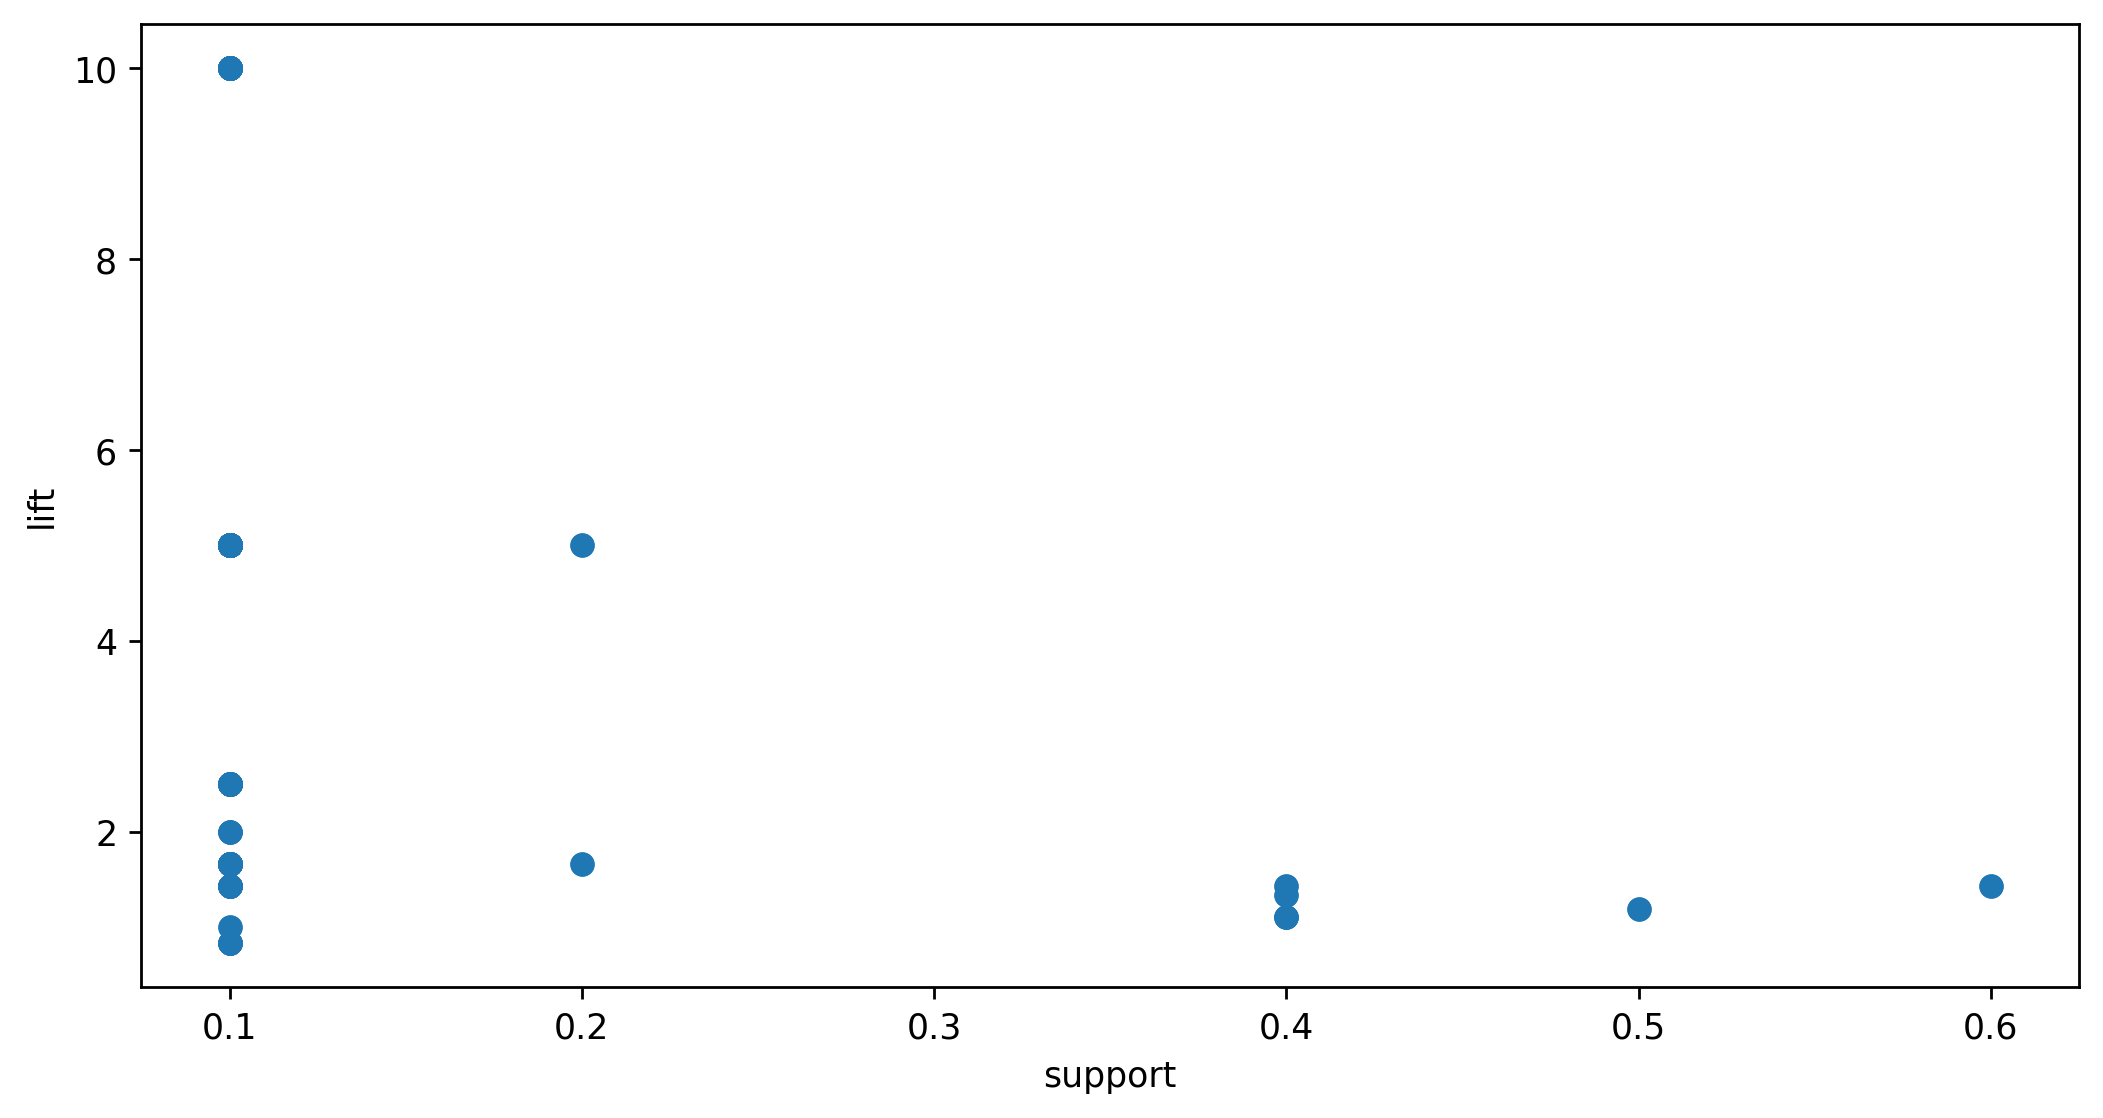

In [44]:
plt.scatter(model['support'], model['lift'])
plt.xlabel('support')
plt.ylabel('lift')
plt.show()

In [45]:
matrix = model.pivot('antecedents','consequents','lift')
matrix

consequents                                      (Gladiator)  \
antecedents                                                    
(Sixth Sense)                                       1.190476   
(Green Mile, Harry Potter1)                              NaN   
(Green Mile, LOTR2)                                      NaN   
(Harry Potter1)                                          NaN   
(Green Mile, LOTR)                                  1.428571   
(Patriot, Braveheart)                               1.428571   
(Gladiator, Braveheart)                                  NaN   
(Sixth Sense, Green Mile, Gladiator)                     NaN   
(Sixth Sense, Green Mile, LOTR)                     1.428571   
(Sixth Sense, Gladiator, LOTR)                           NaN   
(Green Mile, Gladiator, LOTR)                            NaN   
(Sixth Sense, LOTR1, Harry Potter1)                      NaN   
(Sixth Sense, LOTR1, LOTR2)                              NaN   
(Sixth Sense, LOTR1, Green Mile)                         NaN   
(Sixth Sense, Harry Potter1, Green Mile)                 NaN   
(LOTR1, Harry Potter1, Green Mile)                       NaN   
(LOTR2)                                                  NaN   
(Sixth Sense, Green Mile, LOTR2)                         NaN   
(LOTR1, Green Mile)                                      NaN   
(LOTR1, Green Mile, LOTR2)                               NaN   
(LOTR1, Harry Potter1, Green Mile, Sixth Sense)          NaN   
(LOTR1, Sixth Sense, Green Mile, LOTR2)                  NaN   
(Harry Potter1, LOTR2)                                   NaN   
(LOTR1, LOTR2)                                           NaN   
(Sixth Sense, LOTR2)                                     NaN   
(Gladiator)                                              NaN   
(Sixth Sense, Harry Potter1)                             NaN   
(Green Mile, Harry Potter1, LOTR2)                       NaN   
(LOTR1)                                                  NaN   
(LOTR1, Harry Potter1, Green Mile, LOTR2)                NaN   
(Patriot)                                           1.428571   
(LOTR)                                              1.428571   
(Green Mile)                                             NaN   
(Braveheart)                                        1.428571   
(LOTR1, Harry Potter1, LOTR2)                            NaN   
(Sixth Sense, Harry Potter1, LOTR2)                      NaN   
(Harry Potter2)                                          NaN   
(Sixth Sense, Gladiator)                                 NaN   
(Sixth Sense, Patriot)                              1.428571   
(Patriot, Gladiator)                                     NaN   
(Sixth Sense, LOTR)                                 1.428571   
(Gladiator, LOTR)                                        NaN   
(Green Mile, Gladiator)                                  NaN   
(Sixth Sense, LOTR1)                                     NaN   
(LOTR1, Harry Potter1)                                   NaN   
(LOTR1, Harry Potter1, LOTR2, Sixth Sense)               NaN   
(Sixth Sense, Green Mile)                                NaN   
(Green Mile, Harry Potter1, LOTR2, Sixth Sense)          NaN   

consequents                                      (Green Mile, Harry Potter1)  \
antecedents                                                                    
(Sixth Sense)                                                       1.666667   
(Green Mile, Harry Potter1)                                              NaN   
(Green Mile, LOTR2)                                                      NaN   
(Harry Potter1)                                                          NaN   
(Green Mile, LOTR)                                                       NaN   
(Patriot, Braveheart)                                                    NaN   
(Gladiator, Braveheart)                                                  NaN   
(Sixth Sense, Green Mile, Gladiator)                                     NaN   

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

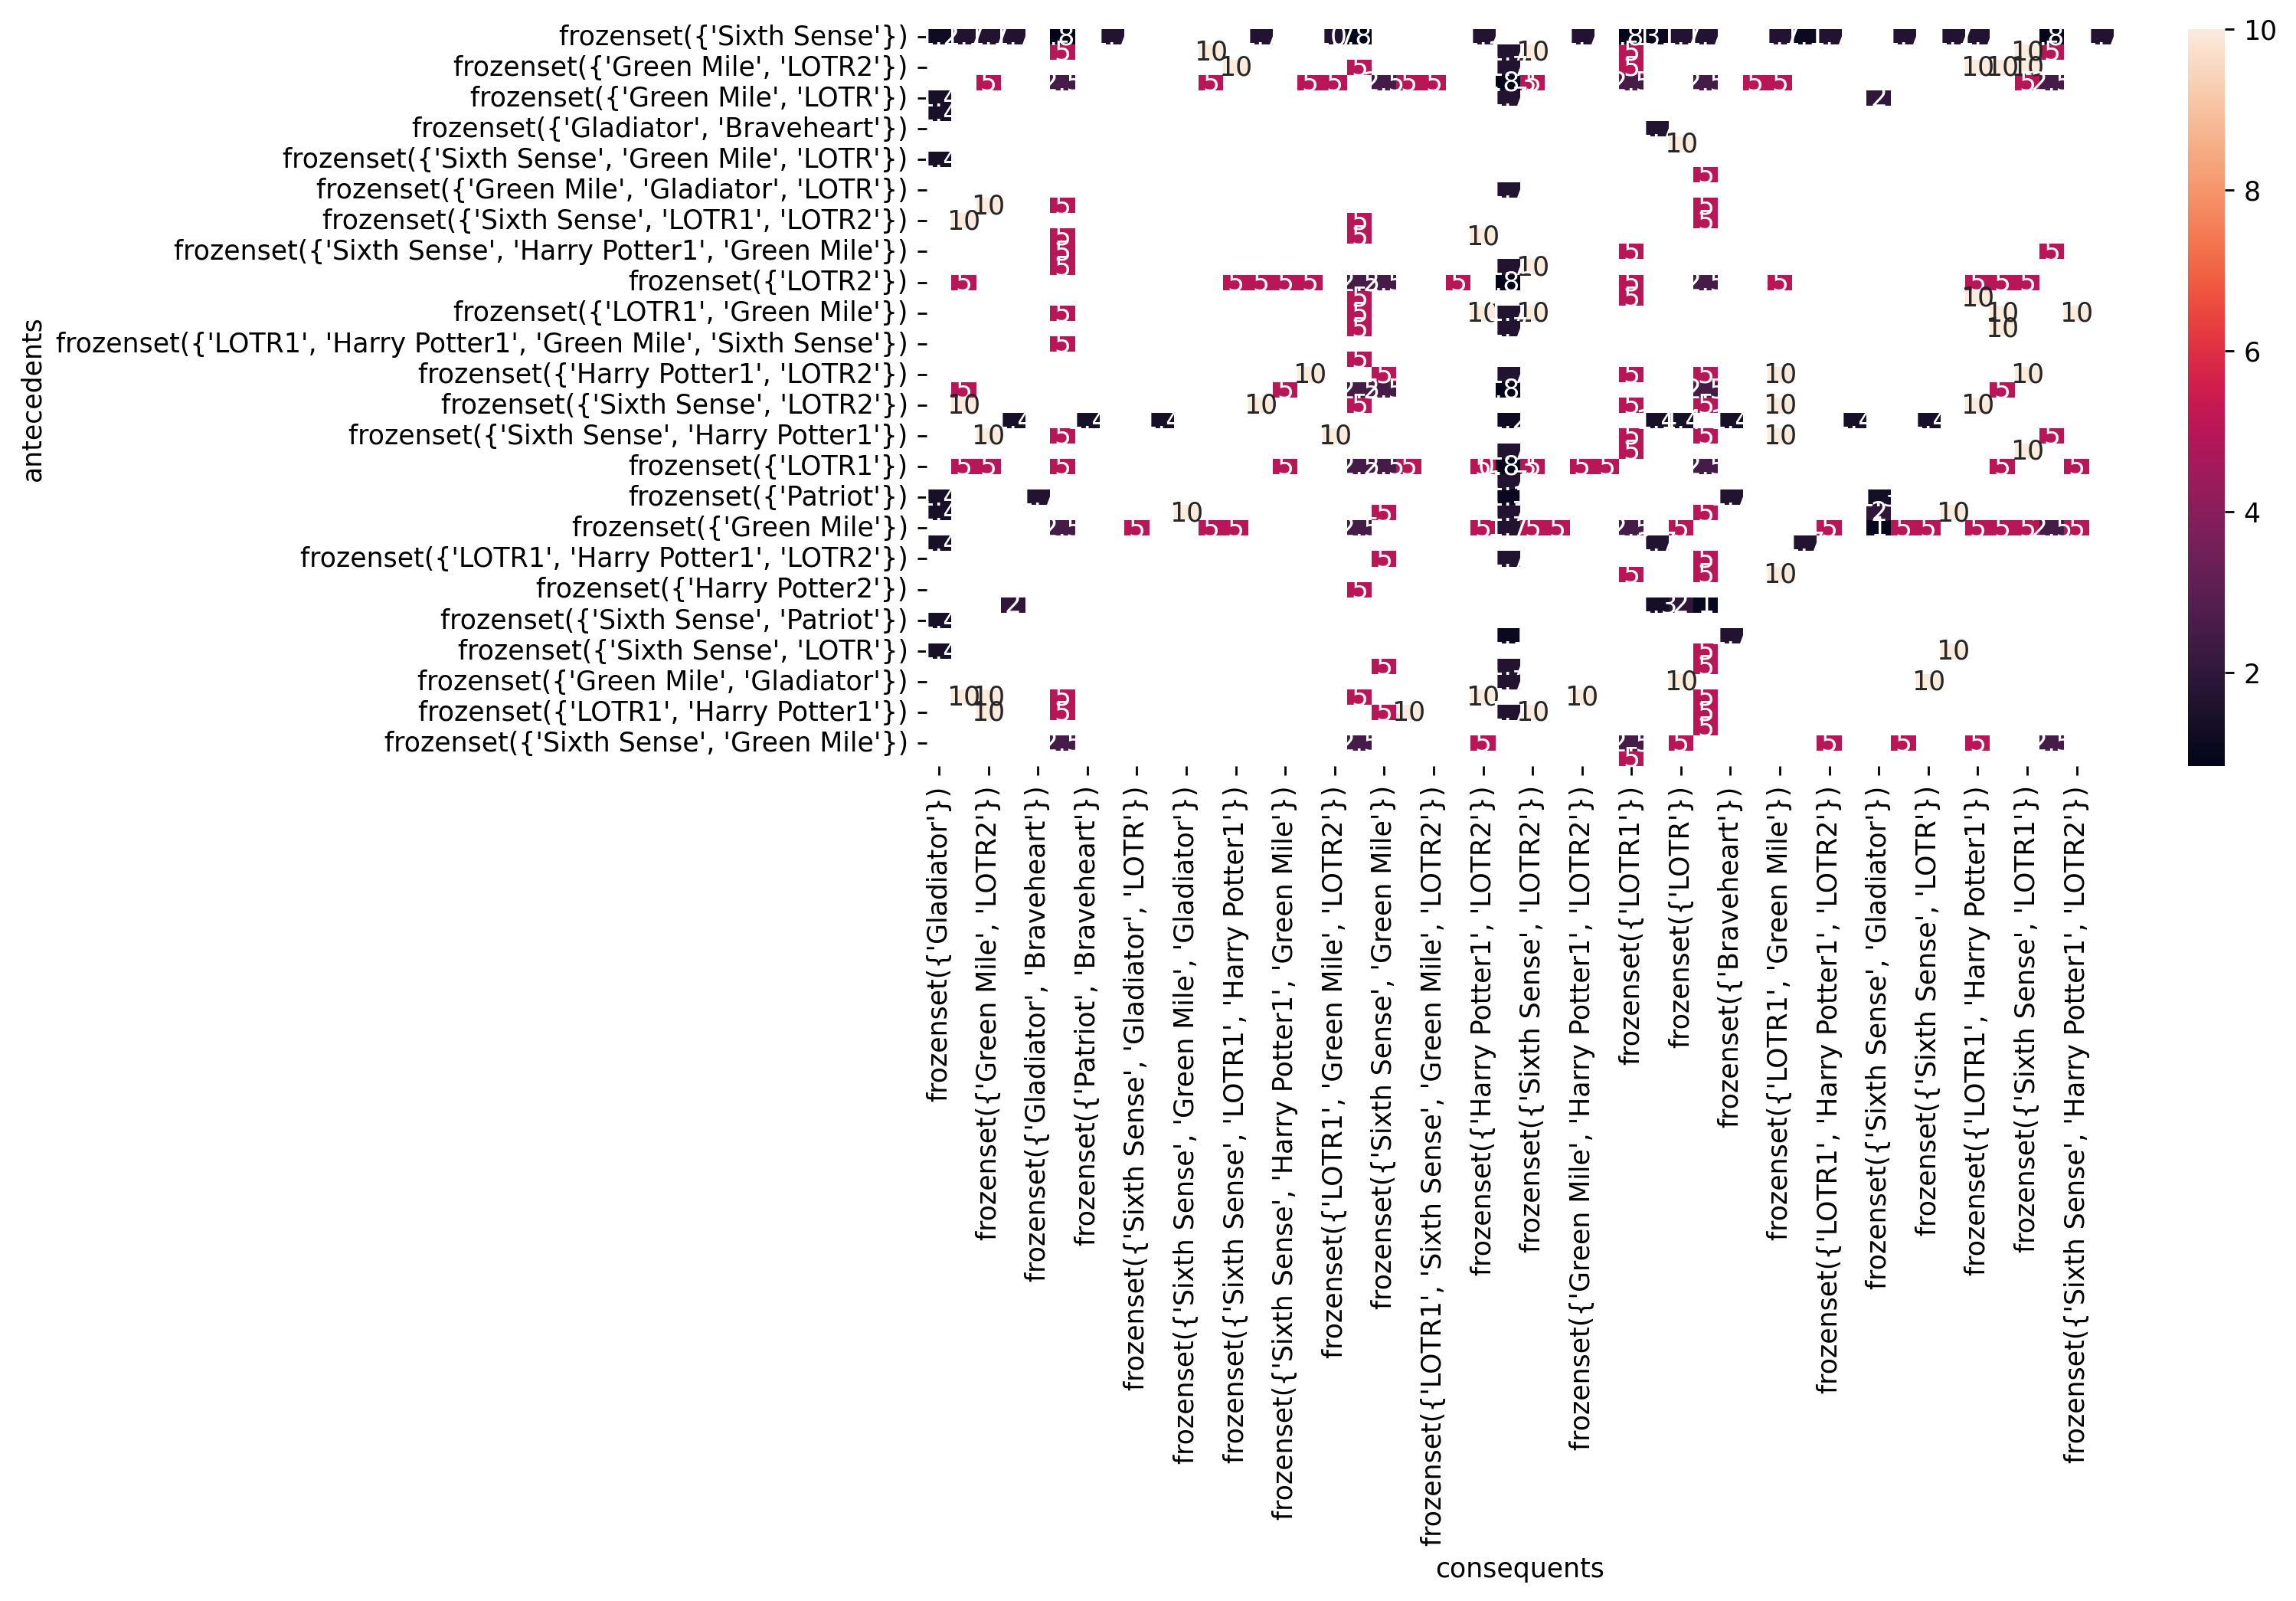

In [46]:
sns.heatmap(matrix, annot=True)

For support of 20% support and 90% lift

In [47]:
score = apriori(data, min_support=0.2, use_colnames=True)
score

support                           itemsets
0       0.6                      (Sixth Sense)
1       0.7                        (Gladiator)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
4       0.6                          (Patriot)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
7       0.5           (Sixth Sense, Gladiator)
8       0.4             (Sixth Sense, Patriot)
9       0.2          (Sixth Sense, Green Mile)
10      0.6               (Patriot, Gladiator)
11      0.2                     (LOTR1, LOTR2)
12      0.4  (Sixth Sense, Gladiator, Patriot)

In [48]:
model = association_rules(score, metric='lift', min_threshold=0.9).sort_values('lift', ascending=False)
model.sort_values('lift', ascending= False)

antecedents               consequents  antecedent support  \
8                    (LOTR1)                   (LOTR2)                 0.2   
9                    (LOTR2)                   (LOTR1)                 0.2   
4              (Sixth Sense)              (Green Mile)                 0.6   
5               (Green Mile)             (Sixth Sense)                 0.2   
7                (Gladiator)                 (Patriot)                 0.7   
6                  (Patriot)               (Gladiator)                 0.6   
11    (Sixth Sense, Patriot)               (Gladiator)                 0.4   
14               (Gladiator)    (Sixth Sense, Patriot)                 0.7   
10  (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
15                 (Patriot)  (Sixth Sense, Gladiator)                 0.6   
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2              (Sixth Sense)                 (Patriot)                 0.6   
3                  (Patriot)             (Sixth Sense)                 0.6   
12      (Patriot, Gladiator)             (Sixth Sense)                 0.6   
13             (Sixth Sense)      (Patriot, Gladiator)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  \
8                  0.2      0.2    1.000000  5.000000      0.16         inf   
9                  0.2      0.2    1.000000  5.000000      0.16         inf   
4                  0.2      0.2    0.333333  1.666667      0.08         1.2   
5                  0.6      0.2    1.000000  1.666667      0.08         inf   
7                  0.6      0.6    0.857143  1.428571      0.18         2.8   
6                  0.7      0.6    1.000000  1.428571      0.18         inf   
11                 0.7      0.4    1.000000  1.428571      0.12         inf   
14                 0.4      0.4    0.571429  1.428571      0.12         1.4   
10                 0.6      0.4    0.800000  1.333333      0.10         2.0   
15                 0.5      0.4    0.666667  1.333333      0.10         1.5   
0                  0.7      0.5    0.833333  1.190476      0.08         1.8   
1                  0.6      0.5    0.714286  1.190476      0.08         1.4   
2                  0.6      0.4    0.666667  1.111111      0.04         1.2   
3                  0.6      0.4    0.666667  1.111111      0.04         1.2   
12                 0.6      0.4    0.666667  1.111111      0.04         1.2   
13                 0.6      0.4    0.666667  1.111111      0.04         1.2   

    zhangs_metric  
8        1.000000  
9        1.000000  
4        1.000000  
5        0.500000  
7        1.000000  
6        0.750000  
11       0.500000  
14       1.000000  
10       0.500000  
15       0.625000  
0        0.400000  
1        0.533333  
2        0.250000  
3        0.250000  
12       0.250000  
13       0.250000

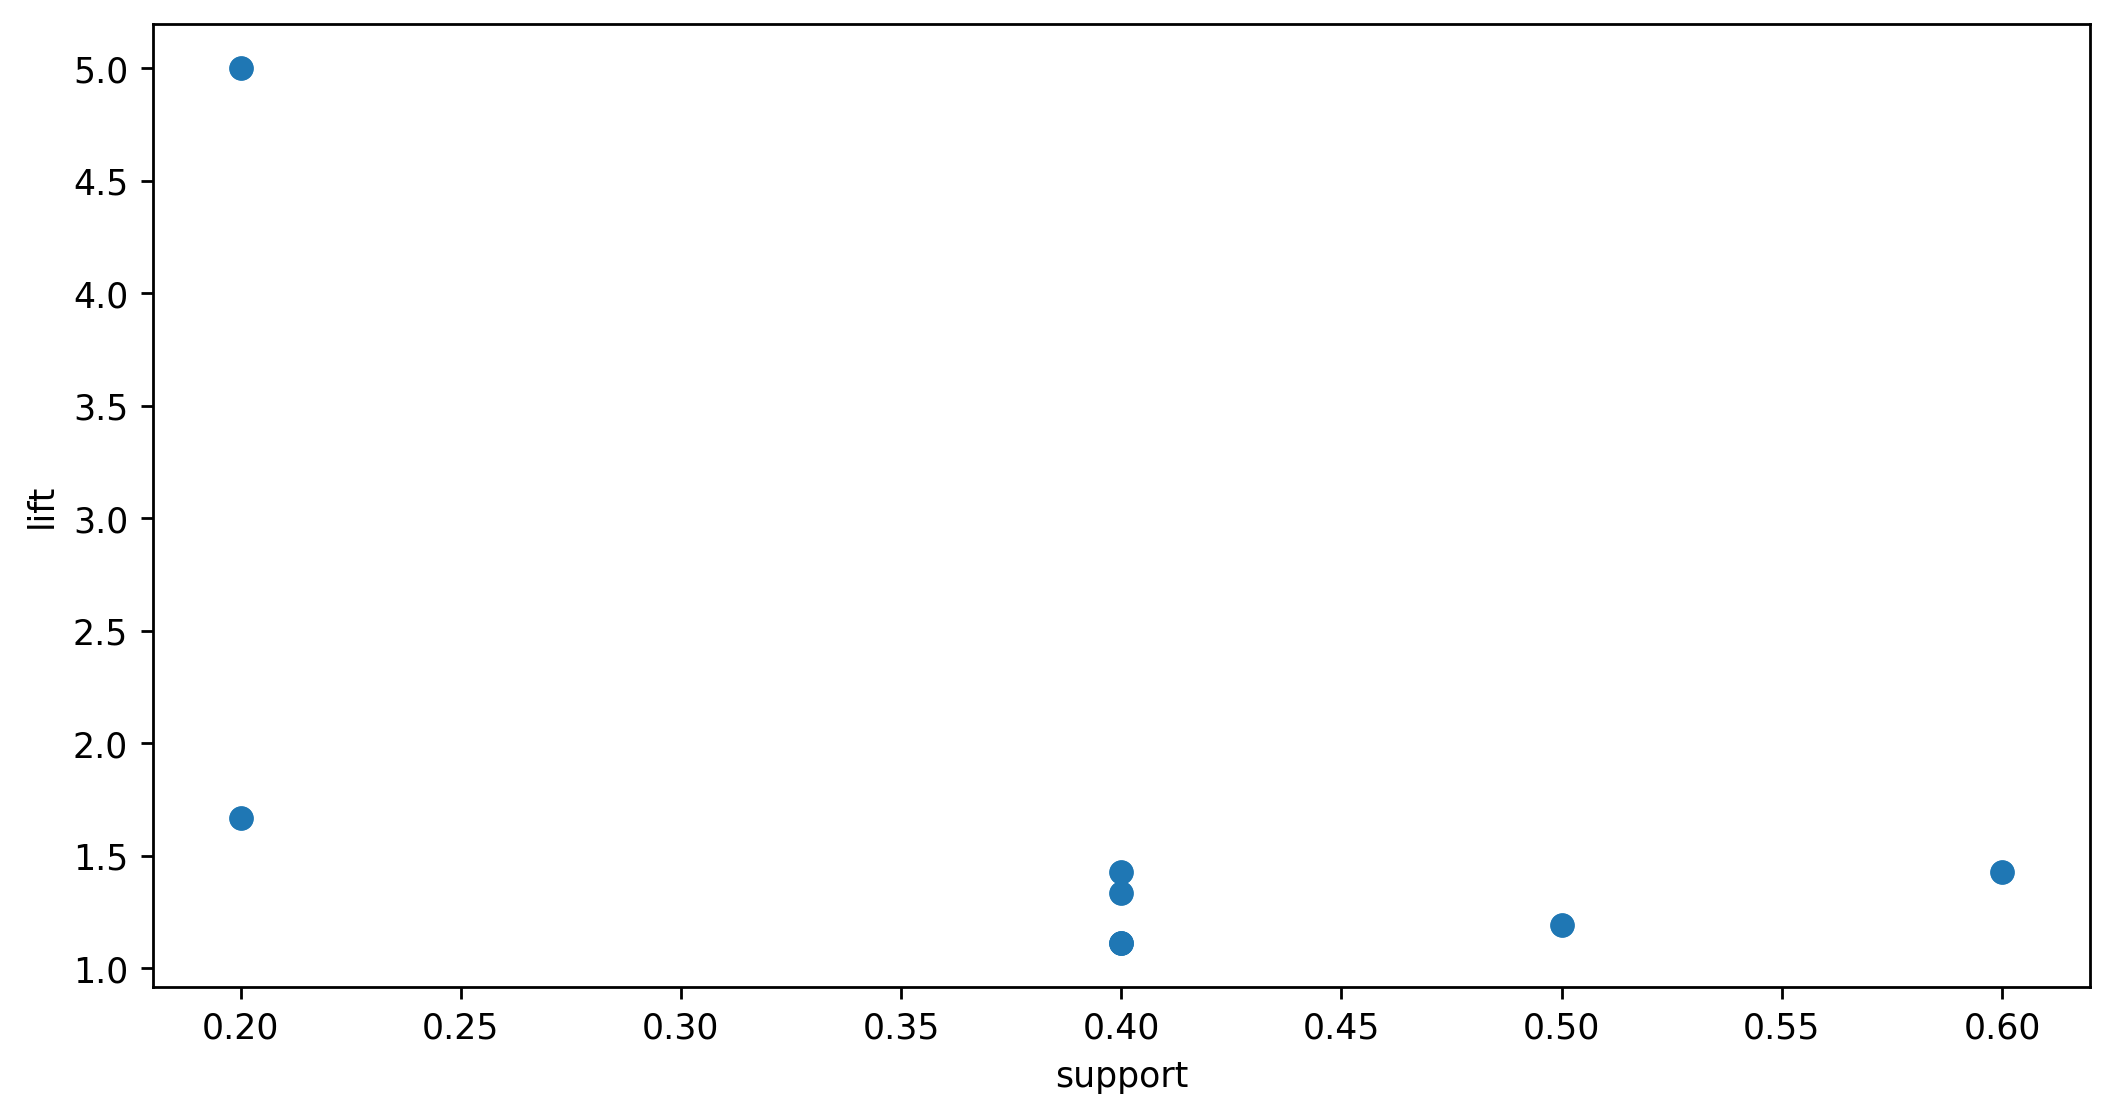

In [49]:
plt.scatter(model['support'], model['lift'])
plt.xlabel('support')
plt.ylabel('lift')
plt.show()

In [50]:
matrix = model.pivot('antecedents','consequents','lift')
matrix

consequents               (LOTR2)  (LOTR1)  (Green Mile)  (Sixth Sense)  \
antecedents                                                               
(LOTR1)                       5.0      NaN           NaN            NaN   
(LOTR2)                       NaN      5.0           NaN            NaN   
(Sixth Sense)                 NaN      NaN      1.666667            NaN   
(Green Mile)                  NaN      NaN           NaN       1.666667   
(Gladiator)                   NaN      NaN           NaN       1.190476   
(Patriot)                     NaN      NaN           NaN       1.111111   
(Sixth Sense, Patriot)        NaN      NaN           NaN            NaN   
(Sixth Sense, Gladiator)      NaN      NaN           NaN            NaN   
(Patriot, Gladiator)          NaN      NaN           NaN       1.111111   

consequents               (Patriot)  (Gladiator)  (Sixth Sense, Patriot)  \
antecedents                                                                
(LOTR1)                         NaN          NaN                     NaN   
(LOTR2)                         NaN          NaN                     NaN   
(Sixth Sense)              1.111111     1.190476                     NaN   
(Green Mile)                    NaN          NaN                     NaN   
(Gladiator)                1.428571          NaN                1.428571   
(Patriot)                       NaN     1.428571                     NaN   
(Sixth Sense, Patriot)          NaN     1.428571                     NaN   
(Sixth Sense, Gladiator)   1.333333          NaN                     NaN   
(Patriot, Gladiator)            NaN          NaN                     NaN   

consequents               (Sixth Sense, Gladiator)  (Patriot, Gladiator)  
antecedents                                                               
(LOTR1)                                        NaN                   NaN  
(LOTR2)                                        NaN                   NaN  
(Sixth Sense)                                  NaN              1.111111  
(Green Mile)                                   NaN                   NaN  
(Gladiator)                                    NaN                   NaN  
(Patriot)                                 1.333333                   NaN  
(Sixth Sense, Patriot)                         NaN                   NaN  
(Sixth Sense, Gladiator)                       NaN                   NaN  
(Patriot, Gladiator)                           NaN                   NaN

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

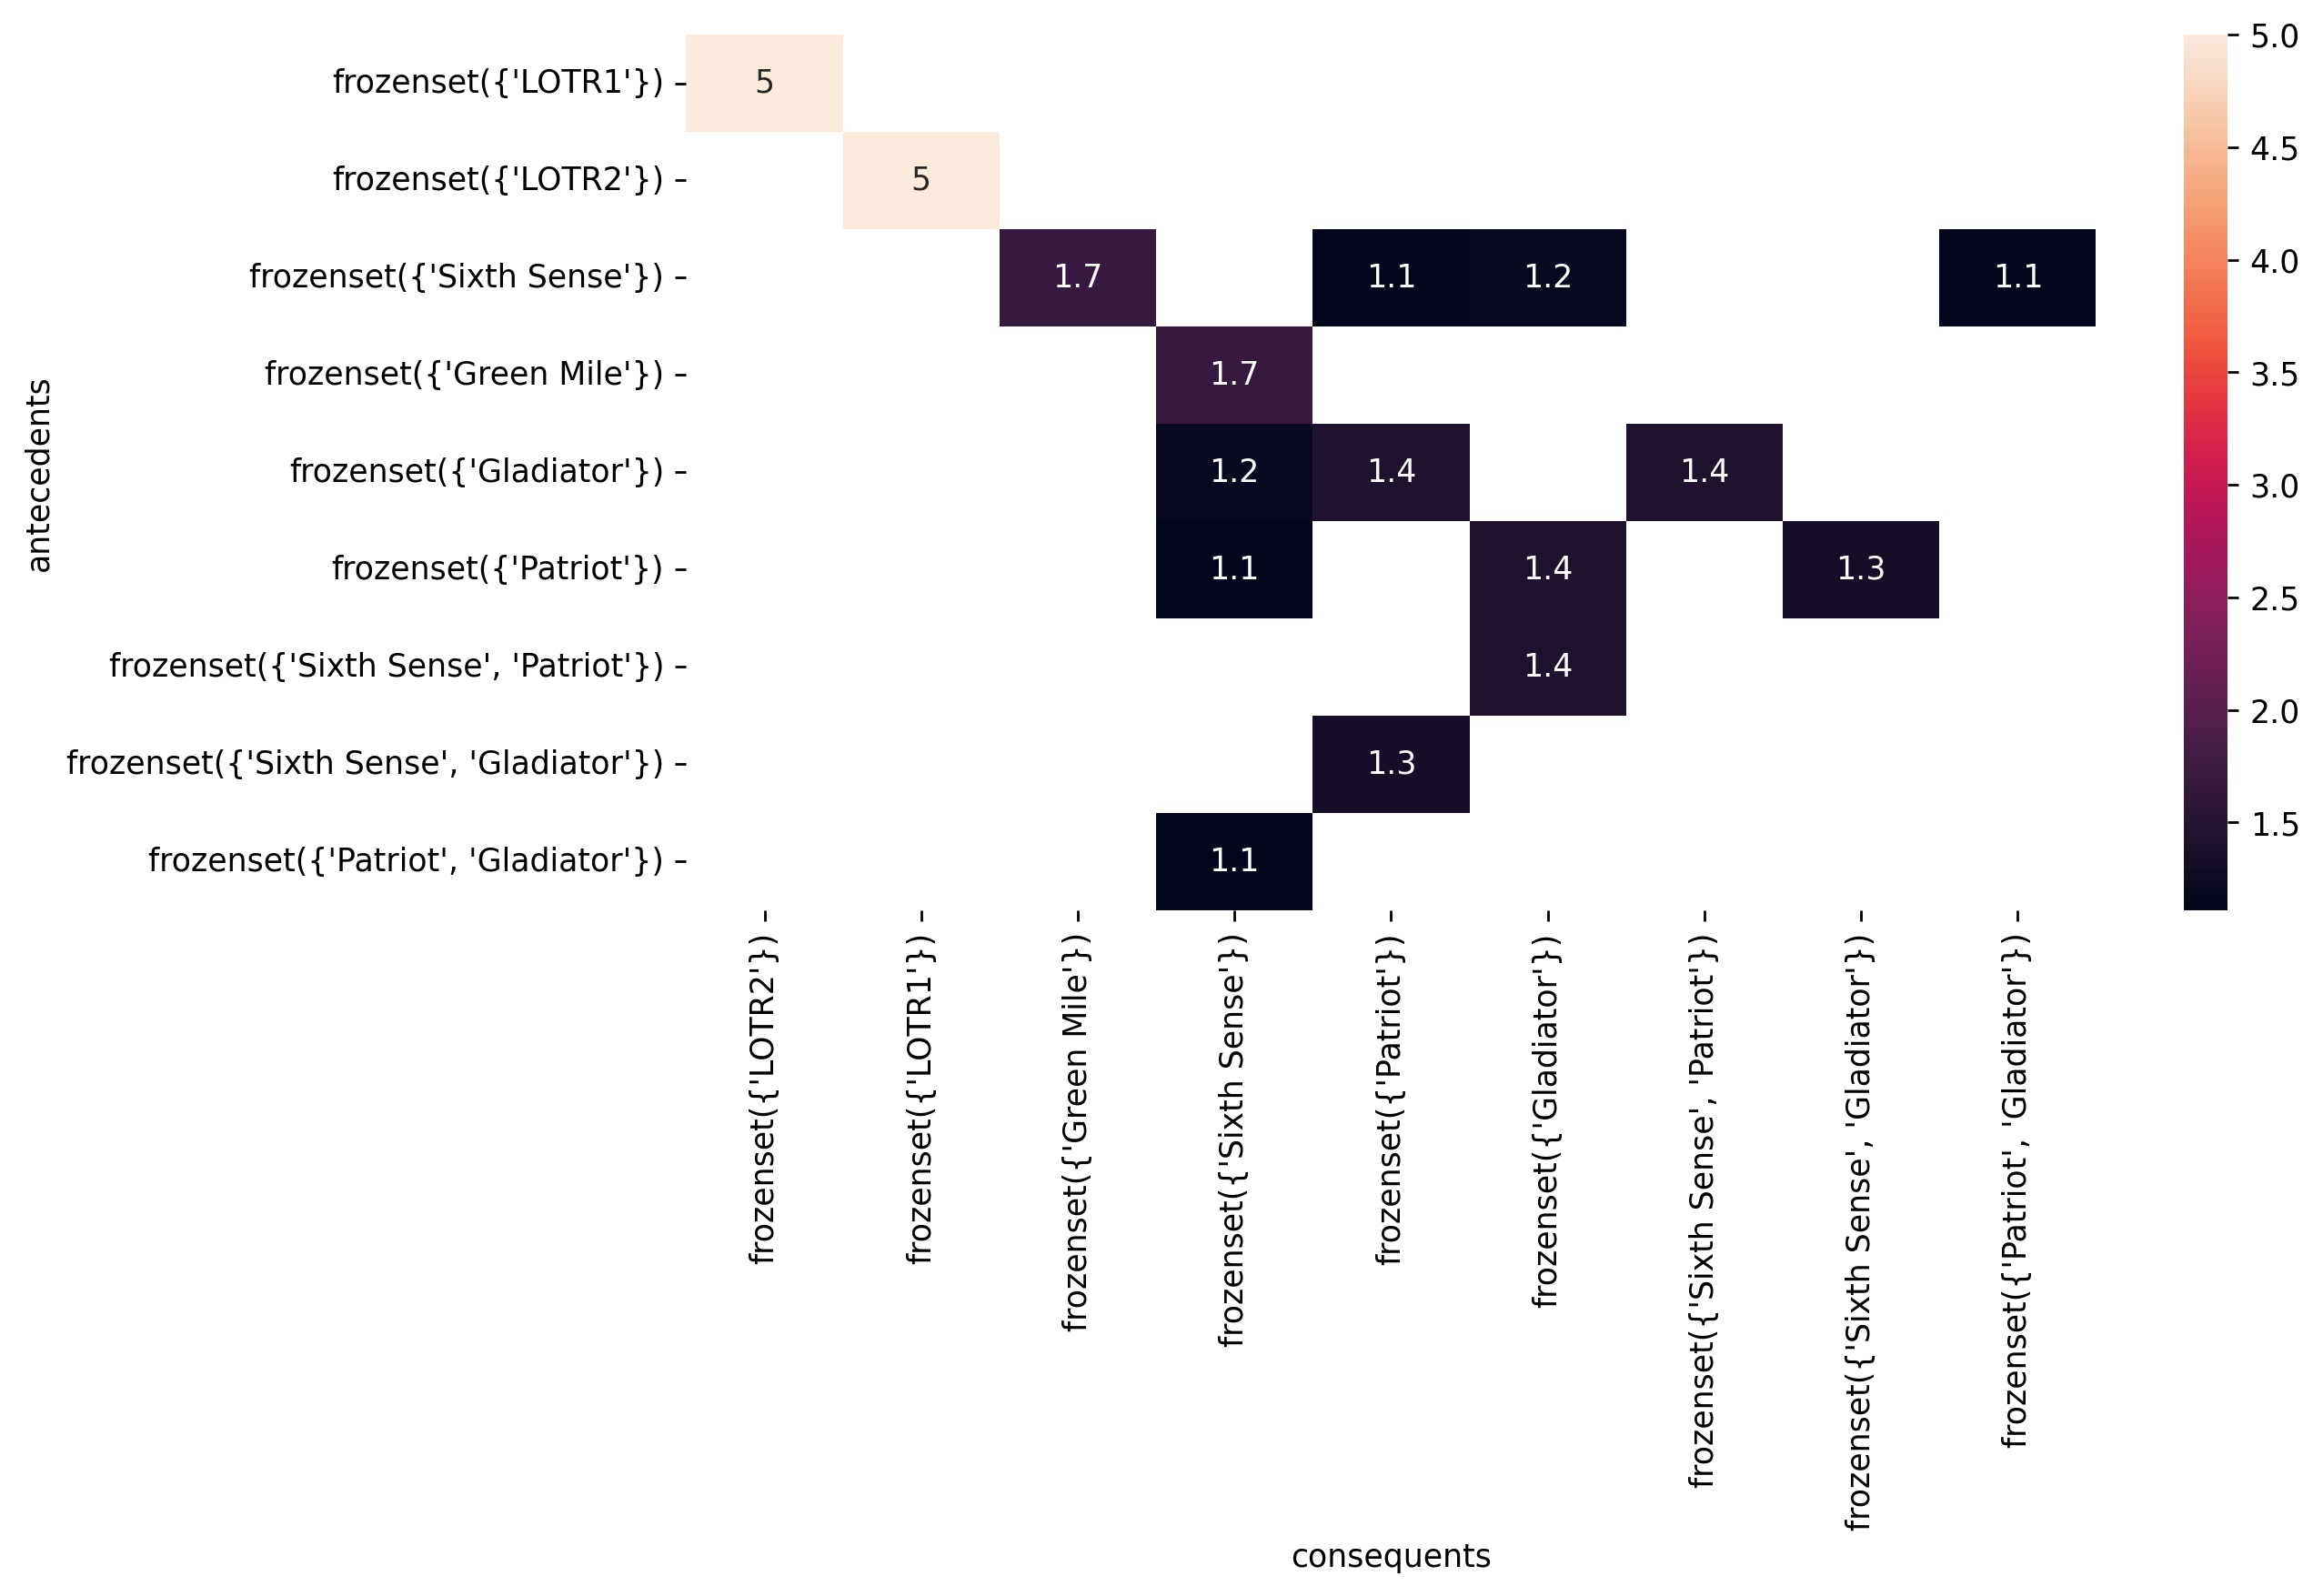

In [51]:
sns.heatmap(matrix, annot=True)

For support of 20% and lift of 70%

In [52]:
# We have the itemsets for the same support values stored above in score variable so we use them

In [53]:
model = association_rules(score, metric='lift', min_threshold=0.7).sort_values('lift', ascending=False)
model

antecedents               consequents  antecedent support  \
8                    (LOTR1)                   (LOTR2)                 0.2   
9                    (LOTR2)                   (LOTR1)                 0.2   
4              (Sixth Sense)              (Green Mile)                 0.6   
5               (Green Mile)             (Sixth Sense)                 0.2   
7                (Gladiator)                 (Patriot)                 0.7   
6                  (Patriot)               (Gladiator)                 0.6   
11    (Sixth Sense, Patriot)               (Gladiator)                 0.4   
14               (Gladiator)    (Sixth Sense, Patriot)                 0.7   
10  (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
15                 (Patriot)  (Sixth Sense, Gladiator)                 0.6   
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2              (Sixth Sense)                 (Patriot)                 0.6   
3                  (Patriot)             (Sixth Sense)                 0.6   
12      (Patriot, Gladiator)             (Sixth Sense)                 0.6   
13             (Sixth Sense)      (Patriot, Gladiator)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  \
8                  0.2      0.2    1.000000  5.000000      0.16         inf   
9                  0.2      0.2    1.000000  5.000000      0.16         inf   
4                  0.2      0.2    0.333333  1.666667      0.08         1.2   
5                  0.6      0.2    1.000000  1.666667      0.08         inf   
7                  0.6      0.6    0.857143  1.428571      0.18         2.8   
6                  0.7      0.6    1.000000  1.428571      0.18         inf   
11                 0.7      0.4    1.000000  1.428571      0.12         inf   
14                 0.4      0.4    0.571429  1.428571      0.12         1.4   
10                 0.6      0.4    0.800000  1.333333      0.10         2.0   
15                 0.5      0.4    0.666667  1.333333      0.10         1.5   
0                  0.7      0.5    0.833333  1.190476      0.08         1.8   
1                  0.6      0.5    0.714286  1.190476      0.08         1.4   
2                  0.6      0.4    0.666667  1.111111      0.04         1.2   
3                  0.6      0.4    0.666667  1.111111      0.04         1.2   
12                 0.6      0.4    0.666667  1.111111      0.04         1.2   
13                 0.6      0.4    0.666667  1.111111      0.04         1.2   

    zhangs_metric  
8        1.000000  
9        1.000000  
4        1.000000  
5        0.500000  
7        1.000000  
6        0.750000  
11       0.500000  
14       1.000000  
10       0.500000  
15       0.625000  
0        0.400000  
1        0.533333  
2        0.250000  
3        0.250000  
12       0.250000  
13       0.250000

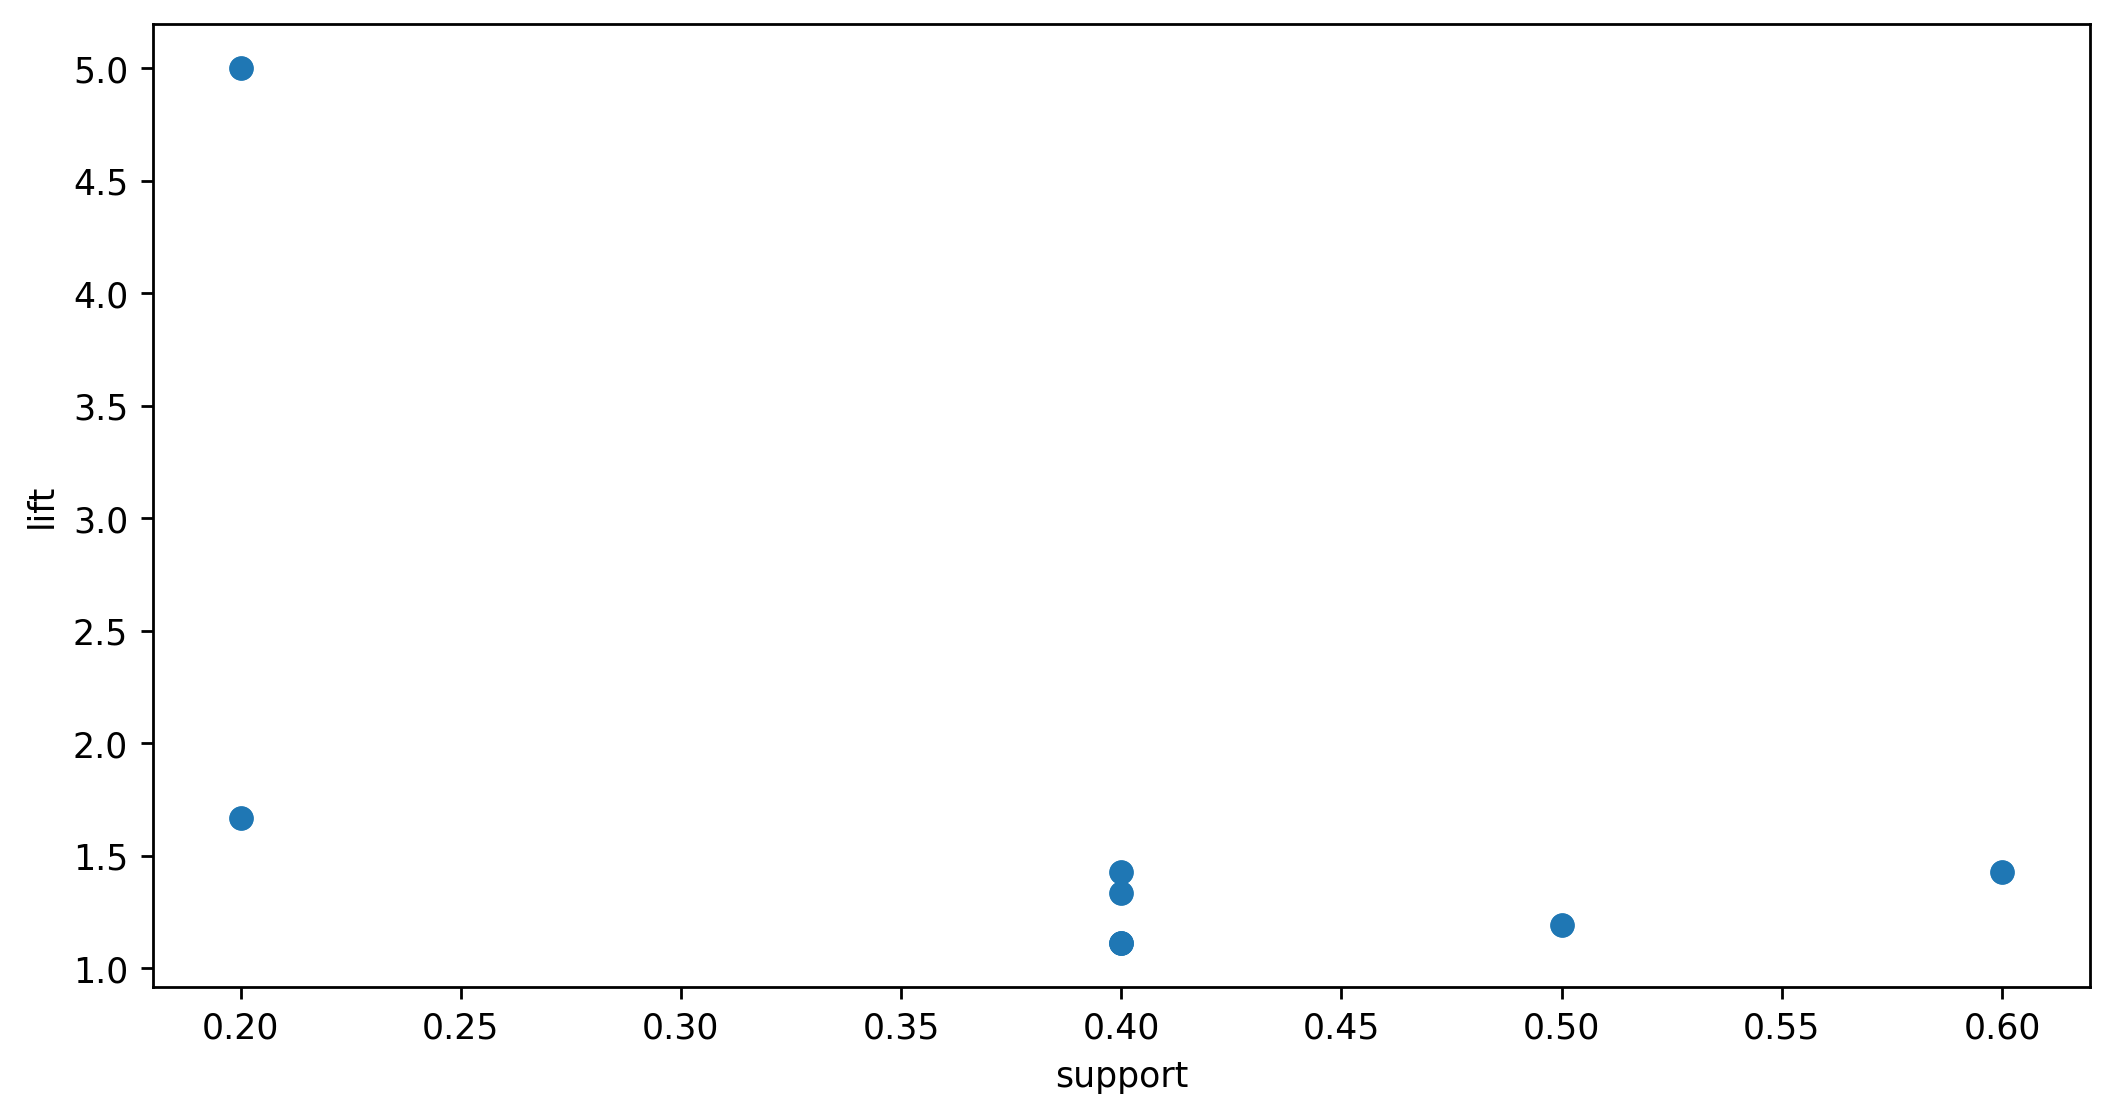

In [54]:
plt.scatter(model['support'], model['lift'])
plt.xlabel('support')
plt.ylabel('lift')
plt.show()

In [55]:
matrix = model.pivot('antecedents','consequents','lift')
matrix

consequents               (LOTR2)  (LOTR1)  (Green Mile)  (Sixth Sense)  \
antecedents                                                               
(LOTR1)                       5.0      NaN           NaN            NaN   
(LOTR2)                       NaN      5.0           NaN            NaN   
(Sixth Sense)                 NaN      NaN      1.666667            NaN   
(Green Mile)                  NaN      NaN           NaN       1.666667   
(Gladiator)                   NaN      NaN           NaN       1.190476   
(Patriot)                     NaN      NaN           NaN       1.111111   
(Sixth Sense, Patriot)        NaN      NaN           NaN            NaN   
(Sixth Sense, Gladiator)      NaN      NaN           NaN            NaN   
(Patriot, Gladiator)          NaN      NaN           NaN       1.111111   

consequents               (Patriot)  (Gladiator)  (Sixth Sense, Patriot)  \
antecedents                                                                
(LOTR1)                         NaN          NaN                     NaN   
(LOTR2)                         NaN          NaN                     NaN   
(Sixth Sense)              1.111111     1.190476                     NaN   
(Green Mile)                    NaN          NaN                     NaN   
(Gladiator)                1.428571          NaN                1.428571   
(Patriot)                       NaN     1.428571                     NaN   
(Sixth Sense, Patriot)          NaN     1.428571                     NaN   
(Sixth Sense, Gladiator)   1.333333          NaN                     NaN   
(Patriot, Gladiator)            NaN          NaN                     NaN   

consequents               (Sixth Sense, Gladiator)  (Patriot, Gladiator)  
antecedents                                                               
(LOTR1)                                        NaN                   NaN  
(LOTR2)                                        NaN                   NaN  
(Sixth Sense)                                  NaN              1.111111  
(Green Mile)                                   NaN                   NaN  
(Gladiator)                                    NaN                   NaN  
(Patriot)                                 1.333333                   NaN  
(Sixth Sense, Patriot)                         NaN                   NaN  
(Sixth Sense, Gladiator)                       NaN                   NaN  
(Patriot, Gladiator)                           NaN                   NaN

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

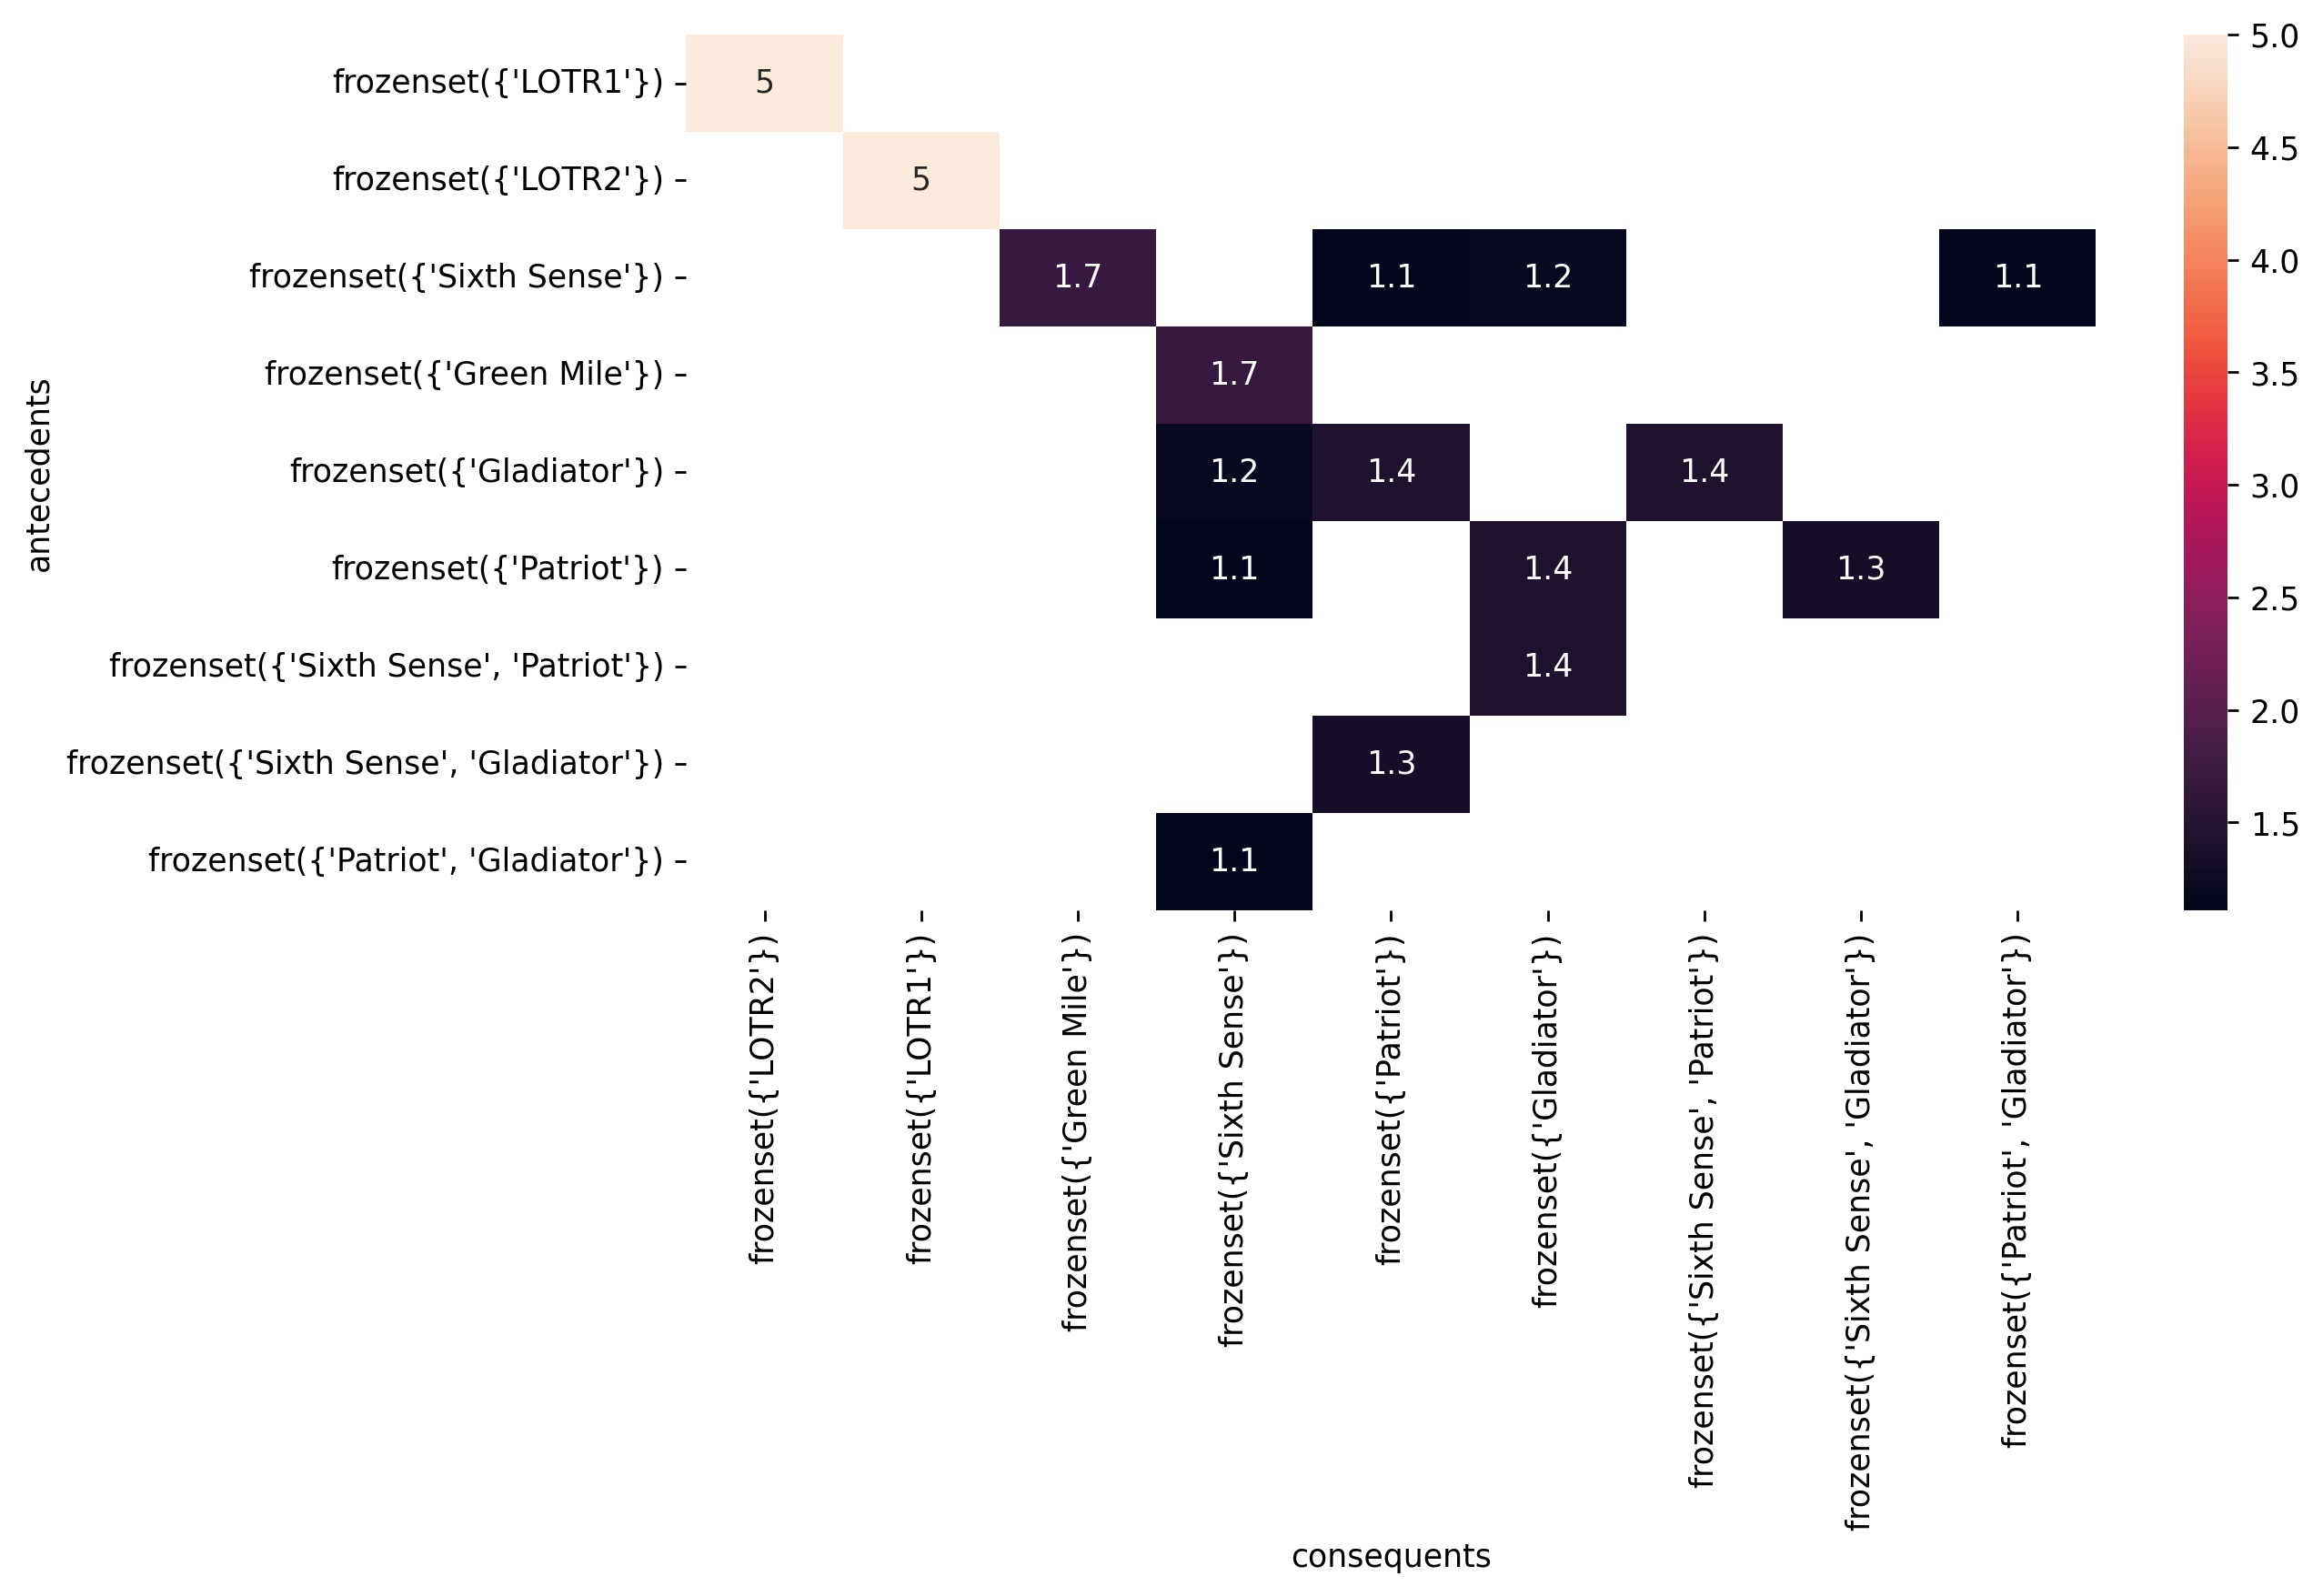

In [56]:
sns.heatmap(matrix, annot=True)

For support of 10% and lift of 70%

In [57]:
score = apriori(data, min_support=0.1, use_colnames=True)
score

support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Sixth Sense, Gladiator)
11      0.1                               (Sixth Sense, LOTR1)
12      0.1                       (Sixth Sense, Harry Potter1)
13      0.4                             (Sixth Sense, Patriot)
14      0.1                               (Sixth Sense, LOTR2)
15      0.1                                (Sixth Sense, LOTR)
16      0.2                          (Sixth Sense, Green Mile)
17      0.6                               (Patriot, Gladiator)
18      0.1                                  (Gladiator, LOTR)
19      0.1                            (Gladiator, Braveheart)
20      0.1                            (Green Mile, Gladiator)
21      0.1                             (LOTR1, Harry Potter1)
22      0.2                                     (LOTR1, LOTR2)
23      0.1                                (Green Mile, LOTR1)
24      0.1                             (Harry Potter1, LOTR2)
25      0.1                     (Harry Potter1, Harry Potter2)
26      0.1                        (Green Mile, Harry Potter1)
27      0.1                              (Patriot, Braveheart)
28      0.1                                (Green Mile, LOTR2)
29      0.1                                 (Green Mile, LOTR)
30      0.4                  (Sixth Sense, Gladiator, Patriot)
31      0.1                     (Sixth Sense, Gladiator, LOTR)
32      0.1               (Sixth Sense, Green Mile, Gladiator)
33      0.1                (Sixth Sense, LOTR1, Harry Potter1)
34      0.1                        (Sixth Sense, LOTR1, LOTR2)
35      0.1                   (Sixth Sense, LOTR1, Green Mile)
36      0.1                (Sixth Sense, Harry Potter1, LOTR2)
37      0.1           (Sixth Sense, Harry Potter1, Green Mile)
38      0.1                   (Sixth Sense, Green Mile, LOTR2)
39      0.1                    (Sixth Sense, Green Mile, LOTR)
40      0.1                   (Patriot, Gladiator, Braveheart)
41      0.1                      (Green Mile, Gladiator, LOTR)
42      0.1                      (LOTR1, Harry Potter1, LOTR2)
43      0.1                 (Green Mile, LOTR1, Harry Potter1)
44      0.1                         (Green Mile, LOTR1, LOTR2)
45      0.1                 (Green Mile, Harry Potter1, LOTR2)
46      0.1         (Sixth Sense, Green Mile, Gladiator, LOTR)
47      0.1         (Sixth Sense, LOTR1, Harry Potter1, LOTR2)
48      0.1    (Sixth Sense, LOTR1, Harry Potter1, Green Mile)
49      0.1            (Sixth Sense, LOTR1, Green Mile, LOTR2)
50      0.1    (Sixth Sense, Harry Potter1, Green Mile, LOTR2)
51      0.1          (Green Mile, LOTR1, Harry Potter1, LOTR2)
52      0.1  (LOTR1, Harry Potter1, Green Mile, LOTR2, Sixt...

In [58]:
model = association_rules(score, metric='lift', min_threshold=0.7).sort_values('lift', ascending=False)
model

antecedents                   consequents  \
185                  (LOTR1, Green Mile)          (Sixth Sense, LOTR2)   
182                 (Sixth Sense, LOTR1)           (Green Mile, LOTR2)   
228           (LOTR1, Green Mile, LOTR2)  (Sixth Sense, Harry Potter1)   
227  (LOTR1, Harry Potter1, Sixth Sense)           (Green Mile, LOTR2)   
157               (LOTR1, Harry Potter1)          (Sixth Sense, LOTR2)   
..                                   ...                           ...   
2                          (Sixth Sense)                       (LOTR1)   
57                           (Gladiator)     (Sixth Sense, Green Mile)   
21                           (Gladiator)                  (Green Mile)   
52             (Sixth Sense, Green Mile)                   (Gladiator)   
20                          (Green Mile)                   (Gladiator)   

     antecedent support  consequent support  support  confidence       lift  \
185                 0.1                 0.1      0.1    1.000000  10.000000   
182                 0.1                 0.1      0.1    1.000000  10.000000   
228                 0.1                 0.1      0.1    1.000000  10.000000   
227                 0.1                 0.1      0.1    1.000000  10.000000   
157                 0.1                 0.1      0.1    1.000000  10.000000   
..                  ...                 ...      ...         ...        ...   
2                   0.6                 0.2      0.1    0.166667   0.833333   
57                  0.7                 0.2      0.1    0.142857   0.714286   
21                  0.7                 0.2      0.1    0.142857   0.714286   
52                  0.2                 0.7      0.1    0.500000   0.714286   
20                  0.2                 0.7      0.1    0.500000   0.714286   

     leverage  conviction  zhangs_metric  
185      0.09         inf       1.000000  
182      0.09         inf       1.000000  
228      0.09         inf       1.000000  
227      0.09         inf       1.000000  
157      0.09         inf       1.000000  
..        ...         ...            ...  
2       -0.02    0.960000      -0.333333  
57      -0.04    0.933333      -0.571429  
21      -0.04    0.933333      -0.571429  
52      -0.04    0.600000      -0.333333  
20      -0.04    0.600000      -0.333333  

[250 rows x 10 columns]

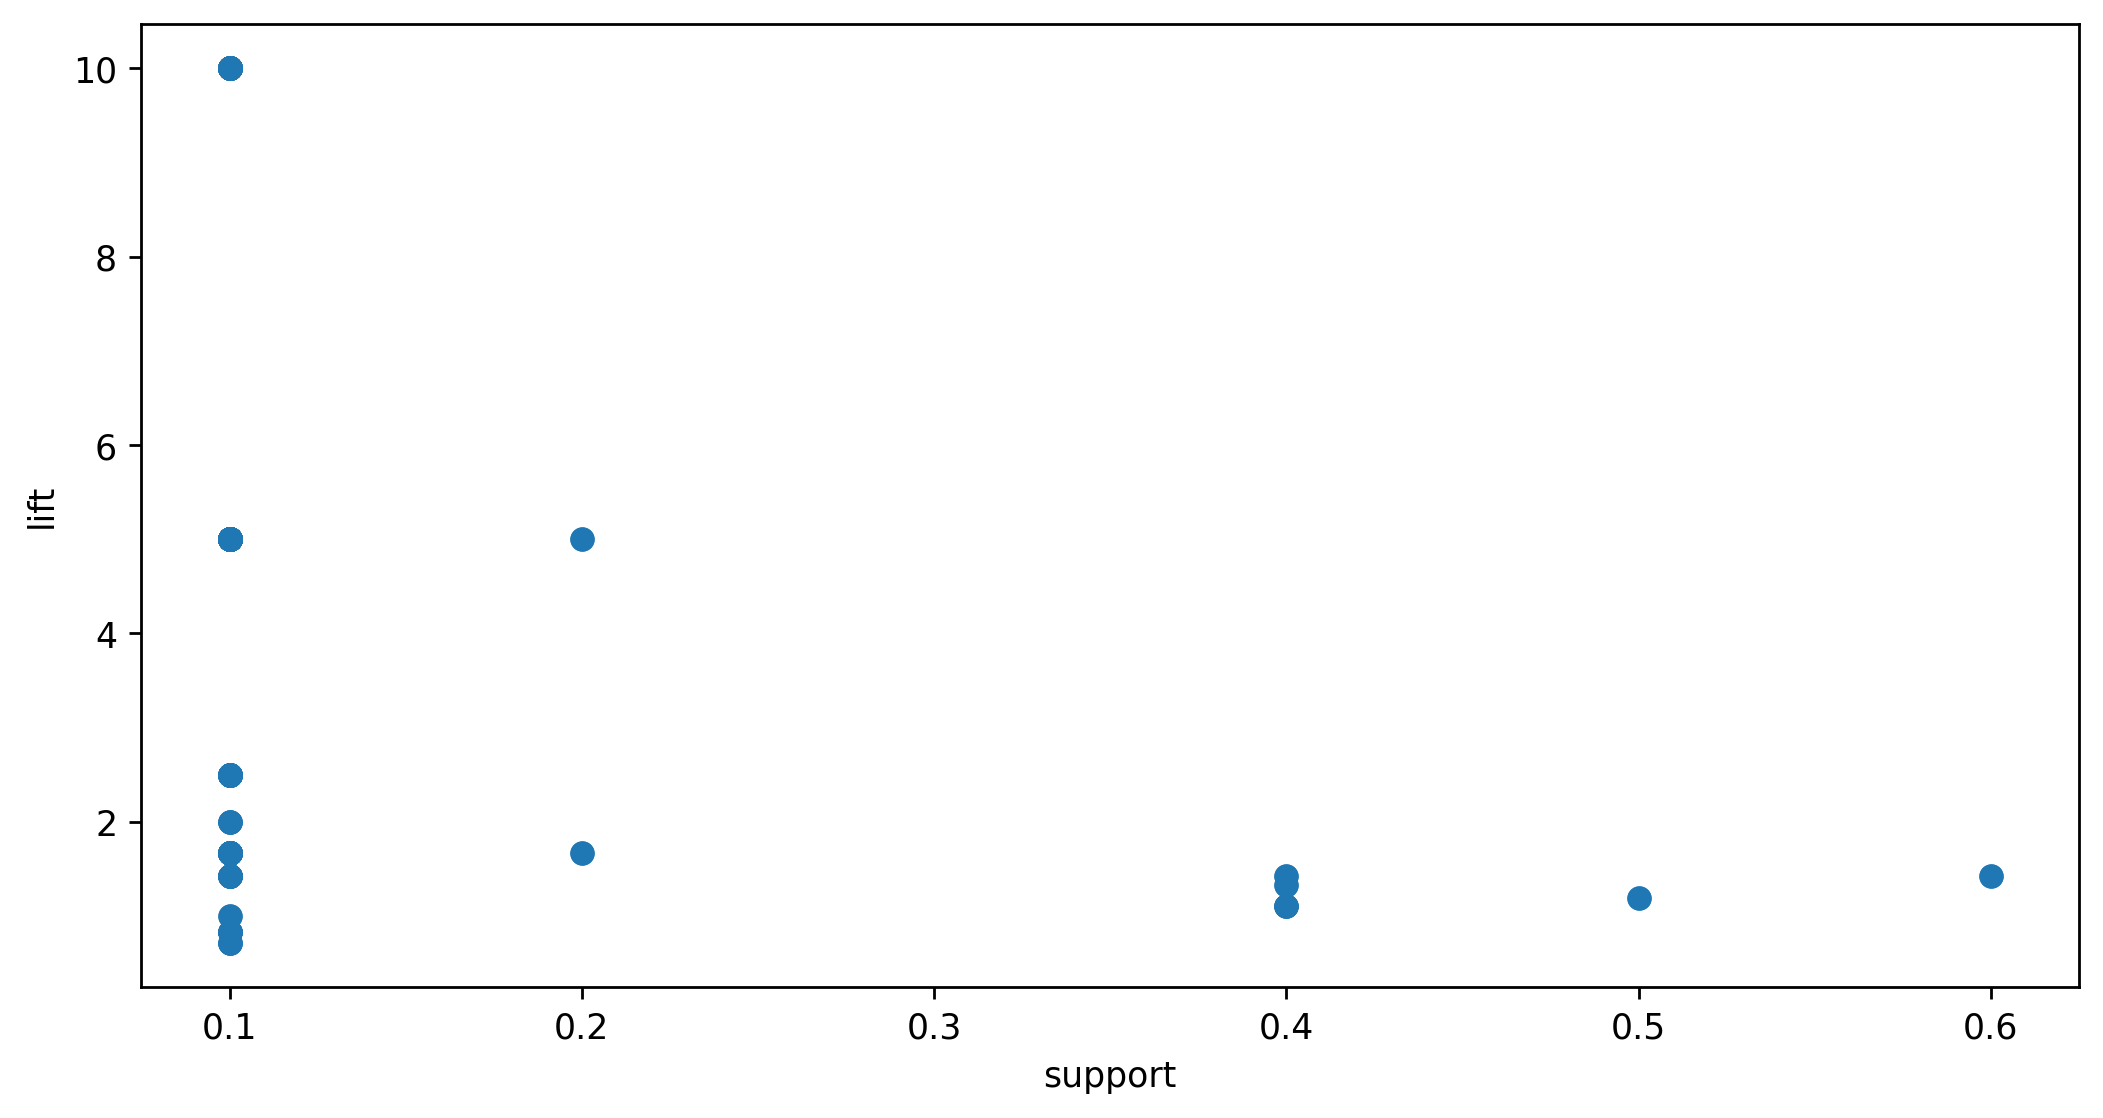

In [59]:
plt.scatter(model['support'], model['lift'])
plt.xlabel('support')
plt.ylabel('lift')
plt.show()

In [60]:
matrix = model.pivot('antecedents','consequents','lift')
matrix

consequents                                       (LOTR2)   (LOTR1)  \
antecedents                                                           
(LOTR1, Green Mile)                              5.000000       NaN   
(Sixth Sense, Green Mile)                        2.500000  2.500000   
(Sixth Sense, Harry Potter1, Green Mile)         5.000000  5.000000   
(LOTR1, LOTR2)                                        NaN       NaN   
(LOTR1, Harry Potter1, LOTR2)                         NaN       NaN   
(LOTR1, Harry Potter1, Green Mile, Sixth Sense)  5.000000       NaN   
(LOTR1, Harry Potter1, LOTR2, Sixth Sense)            NaN       NaN   
(LOTR)                                                NaN       NaN   
(LOTR1, Sixth Sense, Green Mile, LOTR2)               NaN       NaN   
(Green Mile, Harry Potter1, LOTR2, Sixth Sense)       NaN  5.000000   
(Harry Potter2)                                       NaN       NaN   
(Green Mile, LOTR)                                    NaN       NaN   
(Sixth Sense)                                    0.833333  0.833333   
(Sixth Sense, Gladiator)                              NaN       NaN   
(LOTR1, Harry Potter1, Green Mile, LOTR2)             NaN       NaN   
(Braveheart)                                          NaN       NaN   
(Patriot)                                             NaN       NaN   
(Gladiator)                                           NaN       NaN   
(Patriot, Gladiator)                                  NaN       NaN   
(Gladiator, Braveheart)                               NaN       NaN   
(Sixth Sense, Patriot)                                NaN       NaN   
(Harry Potter1)                                  2.500000  2.500000   
(Patriot, Braveheart)                                 NaN       NaN   
(Gladiator, LOTR)                                     NaN       NaN   
(LOTR2)                                               NaN  5.000000   
(Sixth Sense, LOTR1)                             5.000000       NaN   
(LOTR1, Harry Potter1)                           5.000000       NaN   
(LOTR1, Harry Potter1, Sixth Sense)              5.000000       NaN   
(Green Mile, Gladiator, LOTR)                         NaN       NaN   
(Sixth Sense, LOTR2)                                  NaN  5.000000   
(LOTR1, Harry Potter1, Green Mile)               5.000000       NaN   
(Green Mile, Gladiator)                               NaN       NaN   
(Sixth Sense, LOTR)                                   NaN       NaN   
(Harry Potter1, LOTR2)                                NaN  5.000000   
(Green Mile)                                     2.500000  2.500000   
(Green Mile, LOTR2)                                   NaN  5.000000   
(Sixth Sense, Harry Potter1)                     5.000000  5.000000   
(Green Mile, Harry Potter1)                      5.000000  5.000000   
(Green Mile, Harry Potter1, LOTR2)                    NaN  5.000000   
(Green Mile, LOTR2, Sixth Sense)                      NaN  5.000000   
(Sixth Sense, Harry Potter1, LOTR2)                   NaN  5.000000   
(Sixth Sense, Gladiator, LOTR)                        NaN       NaN   
(LOTR1)                                          5.000000       NaN   
(LOTR1, LOTR2, Sixth Sense)                           NaN       NaN   
(LOTR1, Green Mile, Sixth Sense)                 5.000000       NaN   
(LOTR1, Green Mile, LOTR2)                            NaN       NaN   
(Sixth Sense, Green Mile, Gladiator)                  NaN       NaN   
(Sixth Sense, Green Mile, LOTR)                       NaN       NaN   

consequents                                      (Sixth Sense, Patriot)  \
antecedents                                                               
(LOTR1, Green Mile)                                                 NaN   
(Sixth Sense, Green Mile)                                           NaN   
(Sixth Sense, Harry Potter1, Green Mile)                            NaN   
(LOTR1, LOTR2)                                                      NaN   

<AxesSubplot:xlabel='consequents', ylabel='antecedents'>

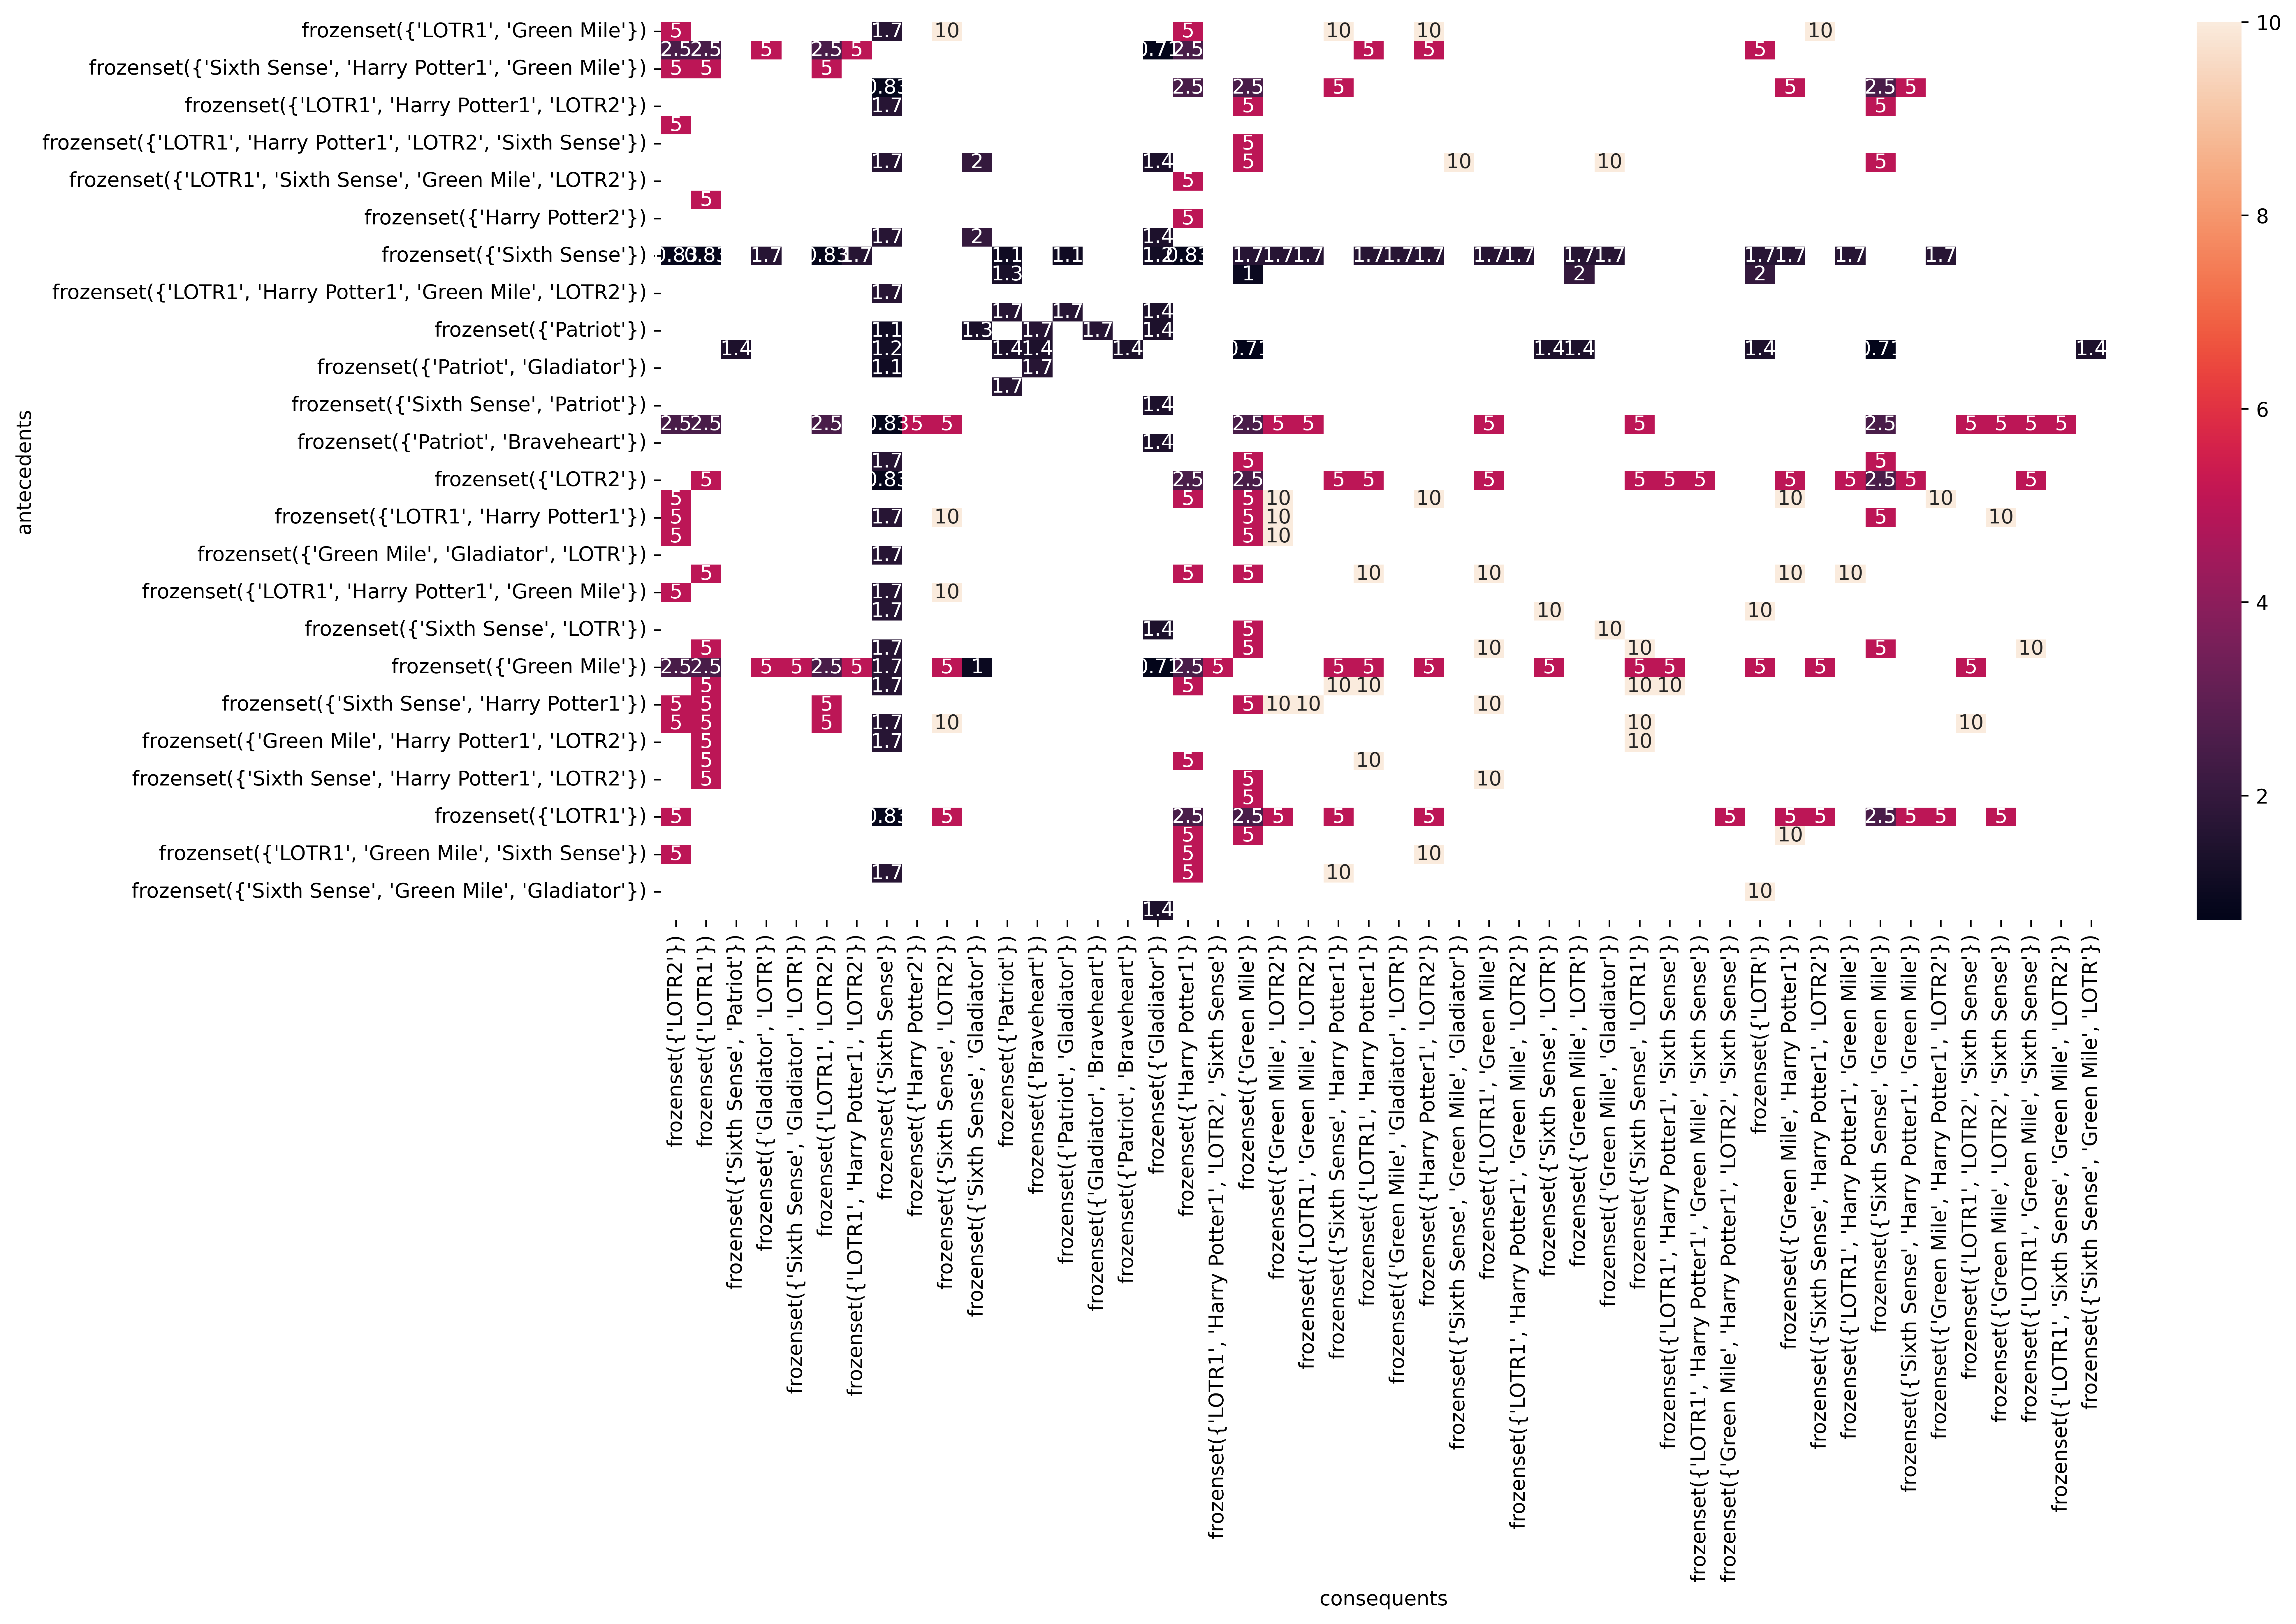

In [61]:
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 500
sns.heatmap(matrix, annot=True)